# import 및 drive 연결

In [1]:
# Google Drive와 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install catboost

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 모델
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 한글 호환 문제
from matplotlib import font_manager as fm
from matplotlib import rc

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 불러오기

In [4]:
research = pd.read_csv('/content/drive/MyDrive/3조(Rodi알려조)/9. 데이터셋/MBTI설문조사_ver1.csv')

In [5]:
research.rename(columns={'여행 동기 [1순위]':'여행동기1순위', '여행 동기 [2순위]':'여행동기2순위', '여행 동기 [3순위]':'여행동기3순위'}, inplace=True)

In [6]:
research.head()

,타임스탬프,성별,연령,거주지,MBTI,여행 선호도 [자연vs도시],여행 선호도 [숙박vs당일],여행 선호도 [익숙한지역(가본곳)vs새로운지역(안가본곳)],여행 선호도 [편하지만비싼숙소vs불편하지만저렴한숙소],여행 선호도 [휴양/휴식vs체험/활동],...,여행동기1순위,여행동기2순위,여행동기3순위,좋았던 국내 여행지 1순위 시도,좋았던 국내 여행지 1순위 세부,좋았던 국내 여행지 2순위 시도,좋았던 국내 여행지 2순위 세부,좋았던 국내 여행지 3순위 시도,좋았던 국내 여행지 3순위 시도.1,이메일 주소
0,2024. 2. 7 오후 4:44:43,여자,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",새로운 경험 추구,여행 동반자와의 친밀감 및 유대감 증진,부산광역시,부산광역시,서울특별시,서울특별시,경상북도,경주시,NaN
1,2024. 2. 7 오후 4:45:59,여자,30대,충청남도,INFP,전자 중간선호,전자 조금선호,후자 매우선호,전자 중간선호,전자 조금선호,...,여행 동반자와의 친밀감 및 유대감 증진,진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,새로운 경험 추구,강원도,강릉시,전라남도,여수시,경상남도,통영시,NaN
2,2024. 2. 7 오후 4:48:04,여자,20대,경기도,INTJ,전자 중간선호,전자 중간선호,후자 중간선호,전자 조금선호,후자 중간선호,...,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식","일상적인 환경 및 역할에서의 탈출, 지루함 탈피",새로운 경험 추구,강원도,강릉시,제주특별자치도,서귀포시,부산광역시,부산광역시,NaN
3,2024. 2. 7 오후 4:48:08,여자,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",새로운 경험 추구,여행 동반자와의 친밀감 및 유대감 증진,부산광역시,부산광역시,서울특별시,서울특별시,경상북도,경주시,NaN
4,2024. 2. 7 오후 4:49:06,남자,20대,경기도,ENTP,전자 중간선호,전자 중간선호,후자 중간선호,전자 중간선호,전자 중간선호,...,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피","쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",새로운 경험 추구,제주특별자치도,서귀포시,강원도,양양군,NaN,NaN,NaN


# 데이터 전처리

## 여행스타일 점수화

In [7]:
def merge_travelstyle(df, pick1, pick2, style_col):
    df[pick1] = 0
    df[pick2] = 0
    df.loc[df[style_col]=='전자 매우선호', pick1] = 3
    df.loc[df[style_col]=='전자 중간선호', pick1] = 2
    df.loc[df[style_col]=='전자 조금선호', pick1] = 1
    df.loc[df[style_col]=='후자 조금선호', pick2] = 1
    df.loc[df[style_col]=='후자 중간선호', pick2] = 2
    df.loc[df[style_col]=='후자 매우선호', pick2] = 3
    return df

# 여행스타일 수정
research = merge_travelstyle(research, '자연', '도시', '여행 선호도 [자연vs도시]')
research = merge_travelstyle(research, '숙박', '당일', '여행 선호도 [숙박vs당일]')
research = merge_travelstyle(research, '새로운지역', '익숙한지역', '여행 선호도 [익숙한지역(가본곳)vs새로운지역(안가본곳)]')
research = merge_travelstyle(research, '편하지만비싼숙소', '불편하지만저렴한숙소', '여행 선호도 [편하지만비싼숙소vs불편하지만저렴한숙소]')
research = merge_travelstyle(research, '휴식', '체험활동', '여행 선호도 [휴양/휴식vs체험/활동]')
research = merge_travelstyle(research, '알려지지않은여행지', '알려진여행지', '여행 선호도 [잘알려지지않은vs알려진]')
research = merge_travelstyle(research, '계획', '즉흥', '여행 선호도 [계획에 따른 vs 상황에 따른]')
research = merge_travelstyle(research, '사진중요하지않음', '사진중요', '여행 선호도 [사진촬영 중요하지않음vs사진촬영 중요]')

research.columns

Index(['타임스탬프', '성별', '연령', '거주지', 'MBTI', '여행 선호도 [자연vs도시]',
       '여행 선호도 [숙박vs당일]', '여행 선호도 [익숙한지역(가본곳)vs새로운지역(안가본곳)]',
       '여행 선호도 [편하지만비싼숙소vs불편하지만저렴한숙소]', '여행 선호도 [휴양/휴식vs체험/활동]',
       '여행 선호도 [잘알려지지않은vs알려진]', '여행 선호도 [계획에 따른 vs 상황에 따른]',
       '여행 선호도 [사진촬영 중요하지않음vs사진촬영 중요]', '여행동기1순위', '여행동기2순위', '여행동기3순위',
       '좋았던 국내 여행지 1순위 시도', '좋았던  국내  여행지 1순위 세부', '좋았던 국내 여행지 2순위 시도',
       '좋았던 국내  여행지 2순위 세부', '좋았던 국내 여행지 3순위 시도', '좋았던 국내 여행지 3순위 시도.1',
       '이메일 주소', '자연', '도시', '숙박', '당일', '새로운지역', '익숙한지역', '편하지만비싼숙소',
       '불편하지만저렴한숙소', '휴식', '체험활동', '알려지지않은여행지', '알려진여행지', '계획', '즉흥',
       '사진중요하지않음', '사진중요'],
      dtype='object')

## 성별, 동기 라벨 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
research['성별'] = le.fit_transform(research['성별'])
research['여행동기1순위'] = le.fit_transform(research['여행동기1순위'])
research['여행동기2순위'] = le.fit_transform(research['여행동기2순위'])
research['여행동기3순위'] = le.fit_transform(research['여행동기3순위'])
research.head()

,타임스탬프,성별,연령,거주지,MBTI,여행 선호도 [자연vs도시],여행 선호도 [숙박vs당일],여행 선호도 [익숙한지역(가본곳)vs새로운지역(안가본곳)],여행 선호도 [편하지만비싼숙소vs불편하지만저렴한숙소],여행 선호도 [휴양/휴식vs체험/활동],...,편하지만비싼숙소,불편하지만저렴한숙소,휴식,체험활동,알려지지않은여행지,알려진여행지,계획,즉흥,사진중요하지않음,사진중요
0,2024. 2. 7 오후 4:44:43,1,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,2,0,0,2,0,1,1,0,0,3
1,2024. 2. 7 오후 4:45:59,1,30대,충청남도,INFP,전자 중간선호,전자 조금선호,후자 매우선호,전자 중간선호,전자 조금선호,...,2,0,1,0,3,0,2,0,2,0
2,2024. 2. 7 오후 4:48:04,1,20대,경기도,INTJ,전자 중간선호,전자 중간선호,후자 중간선호,전자 조금선호,후자 중간선호,...,1,0,0,2,0,1,0,2,0,2
3,2024. 2. 7 오후 4:48:08,1,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,2,0,0,2,0,1,1,0,0,3
4,2024. 2. 7 오후 4:49:06,0,20대,경기도,ENTP,전자 중간선호,전자 중간선호,후자 중간선호,전자 중간선호,전자 중간선호,...,2,0,2,0,0,2,0,2,0,1


## MBTI 요소별 column 추가

In [9]:
research['EI'] = research['MBTI'].str[0]
research['SN'] = research['MBTI'].str[1]
research['FT'] = research['MBTI'].str[2]
research['JP'] = research['MBTI'].str[3]

research.head()

,타임스탬프,성별,연령,거주지,MBTI,여행 선호도 [자연vs도시],여행 선호도 [숙박vs당일],여행 선호도 [익숙한지역(가본곳)vs새로운지역(안가본곳)],여행 선호도 [편하지만비싼숙소vs불편하지만저렴한숙소],여행 선호도 [휴양/휴식vs체험/활동],...,알려지지않은여행지,알려진여행지,계획,즉흥,사진중요하지않음,사진중요,EI,SN,FT,JP
0,2024. 2. 7 오후 4:44:43,1,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,0,1,1,0,0,3,E,N,F,P
1,2024. 2. 7 오후 4:45:59,1,30대,충청남도,INFP,전자 중간선호,전자 조금선호,후자 매우선호,전자 중간선호,전자 조금선호,...,3,0,2,0,2,0,I,N,F,P
2,2024. 2. 7 오후 4:48:04,1,20대,경기도,INTJ,전자 중간선호,전자 중간선호,후자 중간선호,전자 조금선호,후자 중간선호,...,0,1,0,2,0,2,I,N,T,J
3,2024. 2. 7 오후 4:48:08,1,20대,울산광역시,ENFP,후자 조금선호,전자 조금선호,후자 조금선호,전자 중간선호,후자 중간선호,...,0,1,1,0,0,3,E,N,F,P
4,2024. 2. 7 오후 4:49:06,0,20대,경기도,ENTP,전자 중간선호,전자 중간선호,후자 중간선호,전자 중간선호,전자 중간선호,...,0,2,0,2,0,1,E,N,T,P


## 여행객 성별O/X, 동기O/X로 분리

In [10]:
# 성별 X, 동기 X
mbti = research[['MBTI', '자연', '도시', '숙박', '당일', '새로운지역', '익숙한지역', '편하지만비싼숙소', '불편하지만저렴한숙소',
                 '휴식', '체험활동', '알려진여행지', '알려지지않은여행지', '계획', '즉흥', '사진중요하지않음', '사진중요',
                 'EI', 'SN', 'FT', 'JP']]

In [11]:
# 성별 O, 동기 X
mbti_gender = research[['MBTI', '성별', '자연', '도시', '숙박', '당일', '새로운지역', '익숙한지역', '편하지만비싼숙소', '불편하지만저렴한숙소',
                        '휴식', '체험활동', '알려진여행지', '알려지지않은여행지', '계획', '즉흥', '사진중요하지않음', '사진중요',
                        'EI', 'SN', 'FT', 'JP']]
mbti_gender.head()

,MBTI,성별,자연,도시,숙박,당일,새로운지역,익숙한지역,편하지만비싼숙소,불편하지만저렴한숙소,...,알려진여행지,알려지지않은여행지,계획,즉흥,사진중요하지않음,사진중요,EI,SN,FT,JP
0,ENFP,1,0,1,1,0,0,1,2,0,...,1,0,1,0,0,3,E,N,F,P
1,INFP,1,2,0,1,0,0,3,2,0,...,0,3,2,0,2,0,I,N,F,P
2,INTJ,1,2,0,2,0,0,2,1,0,...,1,0,0,2,0,2,I,N,T,J
3,ENFP,1,0,1,1,0,0,1,2,0,...,1,0,1,0,0,3,E,N,F,P
4,ENTP,0,2,0,2,0,0,2,2,0,...,2,0,0,2,0,1,E,N,T,P


In [12]:
# 성별 X, 동기 O
mbti_motivation = research[['MBTI', '여행동기1순위', '여행동기2순위', '여행동기3순위', '자연', '도시', '숙박', '당일', '새로운지역', '익숙한지역', '편하지만비싼숙소', '불편하지만저렴한숙소',
                            '휴식', '체험활동', '알려진여행지', '알려지지않은여행지', '계획', '즉흥', '사진중요하지않음', '사진중요',
                            'EI', 'SN', 'FT', 'JP']]
mbti_motivation.head()

,MBTI,여행동기1순위,여행동기2순위,여행동기3순위,자연,도시,숙박,당일,새로운지역,익숙한지역,...,알려진여행지,알려지지않은여행지,계획,즉흥,사진중요하지않음,사진중요,EI,SN,FT,JP
0,ENFP,4,0,3,0,1,1,0,0,1,...,1,0,1,0,0,3,E,N,F,P
1,INFP,2,6,1,2,0,1,0,0,3,...,0,3,2,0,2,0,I,N,F,P
2,INTJ,1,5,1,2,0,2,0,0,2,...,1,0,0,2,0,2,I,N,T,J
3,ENFP,4,0,3,0,1,1,0,0,1,...,1,0,1,0,0,3,E,N,F,P
4,ENTP,4,1,1,2,0,2,0,0,2,...,2,0,0,2,0,1,E,N,T,P


In [13]:
# 성별 O, 동기 O
mbti_all = research[['MBTI', '성별', '여행동기1순위', '여행동기2순위', '여행동기3순위', '자연', '도시', '숙박', '당일', '새로운지역', '익숙한지역', '편하지만비싼숙소', '불편하지만저렴한숙소',
                     '휴식', '체험활동', '알려진여행지', '알려지지않은여행지', '계획', '즉흥', '사진중요하지않음', '사진중요',
                     'EI', 'SN', 'FT', 'JP']]
mbti_all.head()

,MBTI,성별,여행동기1순위,여행동기2순위,여행동기3순위,자연,도시,숙박,당일,새로운지역,...,알려진여행지,알려지지않은여행지,계획,즉흥,사진중요하지않음,사진중요,EI,SN,FT,JP
0,ENFP,1,4,0,3,0,1,1,0,0,...,1,0,1,0,0,3,E,N,F,P
1,INFP,1,2,6,1,2,0,1,0,0,...,0,3,2,0,2,0,I,N,F,P
2,INTJ,1,1,5,1,2,0,2,0,0,...,1,0,0,2,0,2,I,N,T,J
3,ENFP,1,4,0,3,0,1,1,0,0,...,1,0,1,0,0,3,E,N,F,P
4,ENTP,0,4,1,1,2,0,2,0,0,...,2,0,0,2,0,1,E,N,T,P


# 데이터셋 분리

## MBTI 전체

In [14]:
from sklearn.model_selection import train_test_split

X = mbti.iloc[:, 1:-4]
y = mbti.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## MBTI 요소별(성별 X, 동기 X)

In [15]:
# EI 분리
X_EI = mbti.iloc[:, 1:-4]
y_EI = mbti.iloc[:, -4]
X_train_EI, X_test_EI, y_train_EI, y_test_EI = train_test_split(X_EI, y_EI, test_size=0.2, random_state=0)

# SN 분리
X_SN = mbti.iloc[:, 1:-4]
y_SN = mbti.iloc[:, -3]
X_train_SN, X_test_SN, y_train_SN, y_test_SN = train_test_split(X_SN, y_SN, test_size=0.2, random_state=0)

# FT 분리
X_FT = mbti.iloc[:, 1:-4]
y_FT = mbti.iloc[:, -2]
X_train_FT, X_test_FT, y_train_FT, y_test_FT = train_test_split(X_FT, y_FT, test_size=0.2, random_state=0)

# JP 분리
X_JP = mbti.iloc[:, 1:-4]
y_JP = mbti.iloc[:, -1]
X_train_JP, X_test_JP, y_train_JP, y_test_JP = train_test_split(X_JP, y_JP, test_size=0.2, random_state=0)

## MBTI 요소별(성별 O, 동기 X)

In [16]:
# EI 분리
X_EI_gender = mbti_gender.iloc[:, 1:-4]
y_EI_gender = mbti_gender.iloc[:, -4]
X_train_EI_gender, X_test_EI_gender, y_train_EI_gender, y_test_EI_gender = train_test_split(X_EI_gender, y_EI_gender, test_size=0.2, random_state=0)

# SN 분리
X_SN_gender = mbti_gender.iloc[:, 1:-4]
y_SN_gender = mbti_gender.iloc[:, -3]
X_train_SN_gender, X_test_SN_gender, y_train_SN_gender, y_test_SN_gender = train_test_split(X_SN_gender, y_SN_gender, test_size=0.2, random_state=0)

# FT 분리
X_FT_gender = mbti_gender.iloc[:, 1:-4]
y_FT_gender = mbti_gender.iloc[:, -2]
X_train_FT_gender, X_test_FT_gender, y_train_FT_gender, y_test_FT_gender = train_test_split(X_FT_gender, y_FT_gender, test_size=0.2, random_state=0)

# JP 분리
X_JP_gender = mbti_gender.iloc[:, 1:-4]
y_JP_gender = mbti_gender.iloc[:, -1]
X_train_JP_gender, X_test_JP_gender, y_train_JP_gender, y_test_JP_gender = train_test_split(X_JP_gender, y_JP_gender, test_size=0.2, random_state=0)

## MBTI 요소별(성별 X, 동기 O)

In [17]:
# EI 분리
X_EI_motivation = mbti_motivation.iloc[:, 1:-4]
y_EI_motivation = mbti_motivation.iloc[:, -4]
X_train_EI_motivation, X_test_EI_motivation, y_train_EI_motivation, y_test_EI_motivation = train_test_split(X_EI_motivation, y_EI_motivation, test_size=0.2, random_state=0)

# SN 분리
X_SN_motivation = mbti_motivation.iloc[:, 1:-4]
y_SN_motivation = mbti_motivation.iloc[:, -3]
X_train_SN_motivation, X_test_SN_motivation, y_train_SN_motivation, y_test_SN_motivation = train_test_split(X_SN_motivation, y_SN_motivation, test_size=0.2, random_state=0)

# FT 분리
X_FT_motivation = mbti_motivation.iloc[:, 1:-4]
y_FT_motivation = mbti_motivation.iloc[:, -2]
X_train_FT_motivation, X_test_FT_motivation, y_train_FT_motivation, y_test_FT_motivation = train_test_split(X_FT_motivation, y_FT_motivation, test_size=0.2, random_state=0)

# JP 분리
X_JP_motivation = mbti_motivation.iloc[:, 1:-4]
y_JP_motivation = mbti_motivation.iloc[:, -1]
X_train_JP_motivation, X_test_JP_motivation, y_train_JP_motivation, y_test_JP_motivation = train_test_split(X_JP_motivation, y_JP_motivation, test_size=0.2, random_state=0)

## MBTI 요소별(성별 O, 동기 O)

In [18]:
# EI 분리
X_EI_all = mbti_all.iloc[:, 1:-4]
y_EI_all = mbti_all.iloc[:, -4]
X_train_EI_all, X_test_EI_all, y_train_EI_all, y_test_EI_all = train_test_split(X_EI_all, y_EI_all, test_size=0.2, random_state=0)

# SN 분리
X_SN_all = mbti_all.iloc[:, 1:-4]
y_SN_all = mbti_all.iloc[:, -3]
X_train_SN_all, X_test_SN_all, y_train_SN_all, y_test_SN_all = train_test_split(X_SN_all, y_SN_all, test_size=0.2, random_state=0)

# FT 분리
X_FT_all = mbti_all.iloc[:, 1:-4]
y_FT_all = mbti_all.iloc[:, -2]
X_train_FT_all, X_test_FT_all, y_train_FT_all, y_test_FT_all = train_test_split(X_FT_all, y_FT_all, test_size=0.2, random_state=0)

# JP 분리
X_JP_all = mbti_all.iloc[:, 1:-4]
y_JP_all = mbti_all.iloc[:, -1]
X_train_JP_all, X_test_JP_all, y_train_JP_all, y_test_JP_all = train_test_split(X_JP_all, y_JP_all, test_size=0.2, random_state=0)

# final df 생성

In [19]:
# 비교 테이블 만들기
final_columns = ['EI', 'SN', 'FT', 'JP']
final = pd.DataFrame(columns=final_columns)
final

,EI,SN,FT,JP


# MBTI 예측모델(DT)

## MBTI 전체

In [20]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.13793103448275862


## MBIT 요소별로 예측(성별 X, 동기 X)

### 정확도 및 feature importances

In [21]:
# E/I
dt_clf_EI = DecisionTreeClassifier(random_state=0)
dt_clf_EI.fit(X_train_EI, y_train_EI)
pred_EI = dt_clf_EI.predict(X_test_EI)
accuracy_EI = accuracy_score(y_test_EI, pred_EI)

ftr_importance_values_EI = dt_clf_EI.feature_importances_
ftr_importances_EI = pd.Series(ftr_importance_values_EI, index=X_train_EI.columns)
ftr_top10_EI = ftr_importances_EI.sort_values(ascending=False)[:10]

In [22]:
# S/N
dt_clf_SN = DecisionTreeClassifier(random_state=0)
dt_clf_SN.fit(X_train_SN, y_train_SN)
pred_SN = dt_clf_SN.predict(X_test_SN)
accuracy_SN = accuracy_score(y_test_SN, pred_SN)

ftr_importance_values_SN = dt_clf_SN.feature_importances_
ftr_importances_SN = pd.Series(ftr_importance_values_SN, index=X_train_SN.columns)
ftr_top10_SN = ftr_importances_SN.sort_values(ascending=False)[:10]

In [23]:
# F/T
dt_clf_FT = DecisionTreeClassifier(random_state=0)
dt_clf_FT.fit(X_train_FT, y_train_FT)
pred_FT = dt_clf_FT.predict(X_test_FT)
accuracy_FT = accuracy_score(y_test_FT, pred_FT)

ftr_importance_values_FT = dt_clf_FT.feature_importances_
ftr_importances_FT = pd.Series(ftr_importance_values_FT, index=X_train_FT.columns)
ftr_top10_FT = ftr_importances_FT.sort_values(ascending=False)[:10]

In [24]:
# J/P
dt_clf_JP = DecisionTreeClassifier(random_state=0)
dt_clf_JP.fit(X_train_JP, y_train_JP)
pred_JP = dt_clf_JP.predict(X_test_JP)
accuracy_JP = accuracy_score(y_test_JP, pred_JP)

ftr_importance_values_JP = dt_clf_JP.feature_importances_
ftr_importances_JP = pd.Series(ftr_importance_values_JP, index=X_train_JP.columns)
ftr_top10_JP = ftr_importances_JP.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

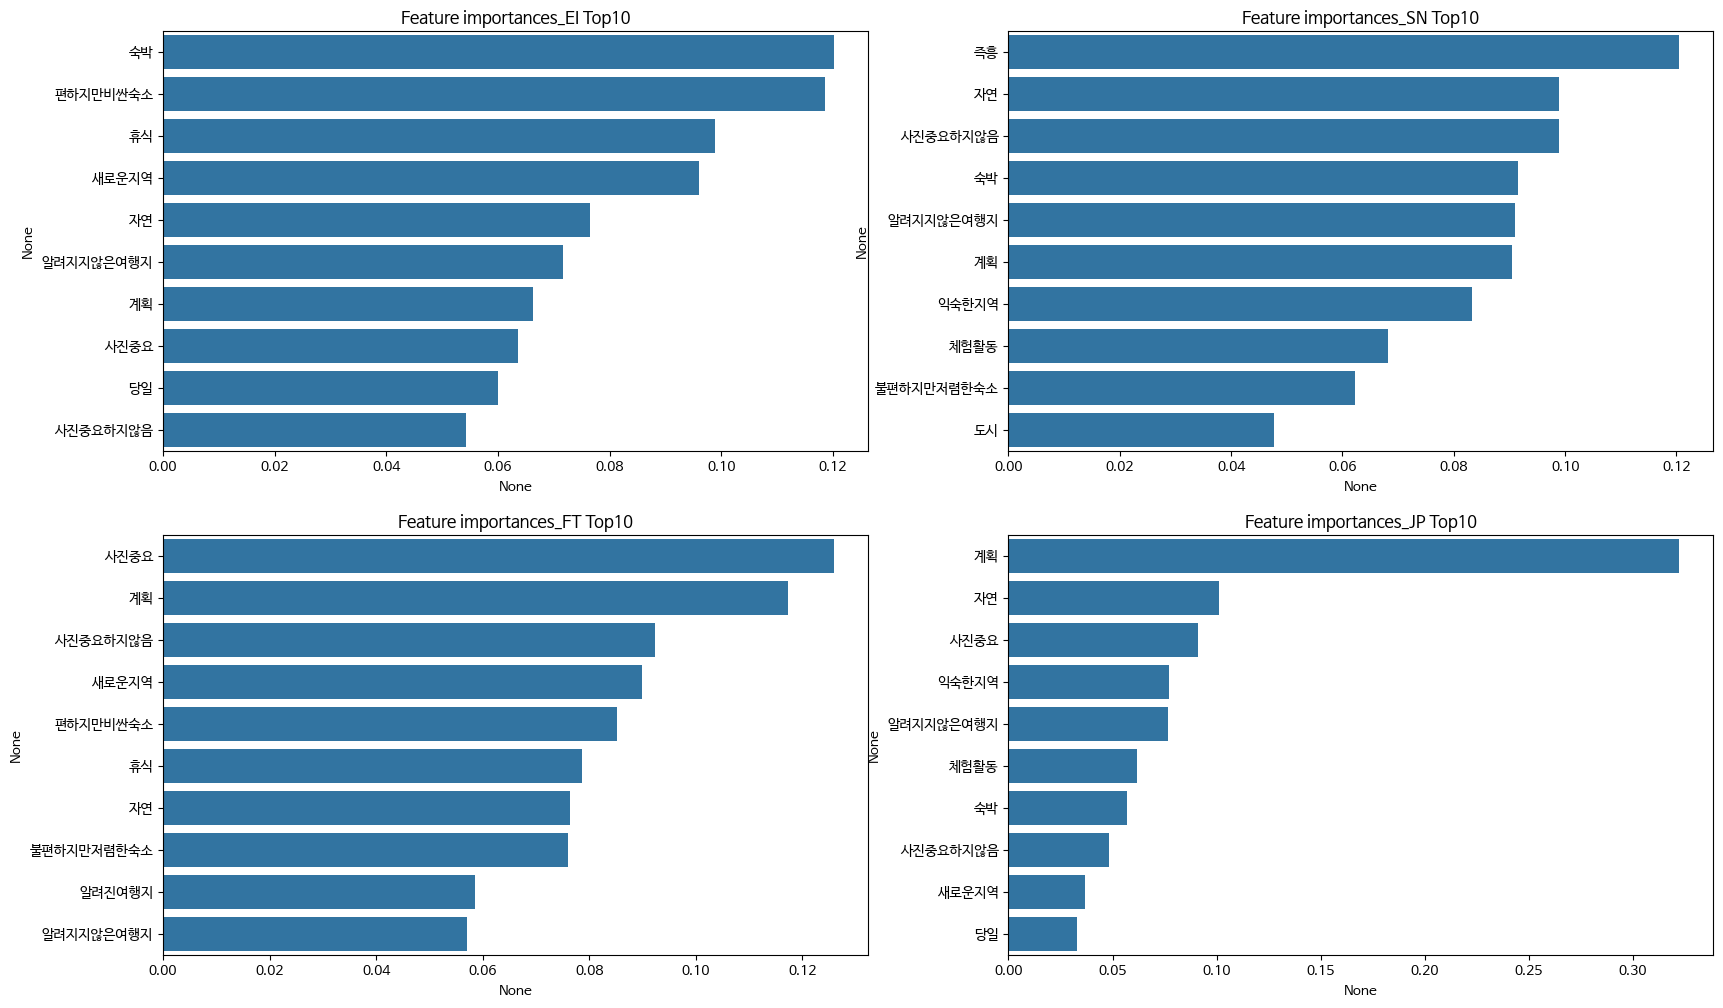

EI정확도 : 0.5862068965517241
SN정확도 : 0.5172413793103449
FT정확도 : 0.41379310344827586
JP정확도 : 0.6551724137931034


In [25]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI Top10')
sns.barplot(x=ftr_top10_EI, y=ftr_top10_EI.index)

# 두 번째 그래프: Feature importances_SN Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN Top10')
sns.barplot(x=ftr_top10_SN, y=ftr_top10_SN.index)

# 세 번째 그래프: Feature importances_FT Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT Top10')
sns.barplot(x=ftr_top10_FT, y=ftr_top10_FT.index)

# 네 번째 그래프: Feature importances_JP Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP Top10')
sns.barplot(x=ftr_top10_JP, y=ftr_top10_JP.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI}')
print(f'SN정확도 : {accuracy_SN}')
print(f'FT정확도 : {accuracy_FT}')
print(f'JP정확도 : {accuracy_JP}')

## MBIT 요소별로 예측(성별 O, 동기 X)

### 정확도 및 feature importances

In [26]:
# E/I
dt_clf_EI_gender = DecisionTreeClassifier(random_state=0)
dt_clf_EI_gender.fit(X_train_EI_gender, y_train_EI_gender)
pred_EI_gender = dt_clf_EI_gender.predict(X_test_EI_gender)
accuracy_EI_gender = accuracy_score(y_test_EI_gender, pred_EI_gender)

ftr_importance_values_EI_gender = dt_clf_EI_gender.feature_importances_
ftr_importances_EI_gender = pd.Series(ftr_importance_values_EI_gender, index=X_train_EI_gender.columns)
ftr_top10_EI_gender = ftr_importances_EI_gender.sort_values(ascending=False)[:10]

In [27]:
# S/N
dt_clf_SN_gender = DecisionTreeClassifier(random_state=0)
dt_clf_SN_gender.fit(X_train_SN_gender, y_train_SN_gender)
pred_SN_gender = dt_clf_SN_gender.predict(X_test_SN_gender)
accuracy_SN_gender = accuracy_score(y_test_SN_gender, pred_SN_gender)

ftr_importance_values_SN_gender = dt_clf_SN_gender.feature_importances_
ftr_importances_SN_gender = pd.Series(ftr_importance_values_SN_gender, index=X_train_SN_gender.columns)
ftr_top10_SN_gender = ftr_importances_SN_gender.sort_values(ascending=False)[:10]

In [28]:
# F/T
dt_clf_FT_gender = DecisionTreeClassifier(random_state=0)
dt_clf_FT_gender.fit(X_train_FT_gender, y_train_FT_gender)
pred_FT_gender = dt_clf_FT_gender.predict(X_test_FT_gender)
accuracy_FT_gender = accuracy_score(y_test_FT_gender, pred_FT_gender)

ftr_importance_values_FT_gender = dt_clf_FT_gender.feature_importances_
ftr_importances_FT_gender = pd.Series(ftr_importance_values_FT_gender, index=X_train_FT_gender.columns)
ftr_top10_FT_gender = ftr_importances_FT_gender.sort_values(ascending=False)[:10]

In [29]:
# J/P
dt_clf_JP_gender = DecisionTreeClassifier(random_state=0)
dt_clf_JP_gender.fit(X_train_JP_gender, y_train_JP_gender)
pred_JP_gender = dt_clf_JP_gender.predict(X_test_JP_gender)
accuracy_JP_gender = accuracy_score(y_test_JP_gender, pred_JP_gender)

ftr_importance_values_JP_gender = dt_clf_JP_gender.feature_importances_
ftr_importances_JP_gender = pd.Series(ftr_importance_values_JP_gender, index=X_train_JP_gender.columns)
ftr_top10_JP_gender = ftr_importances_JP_gender.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

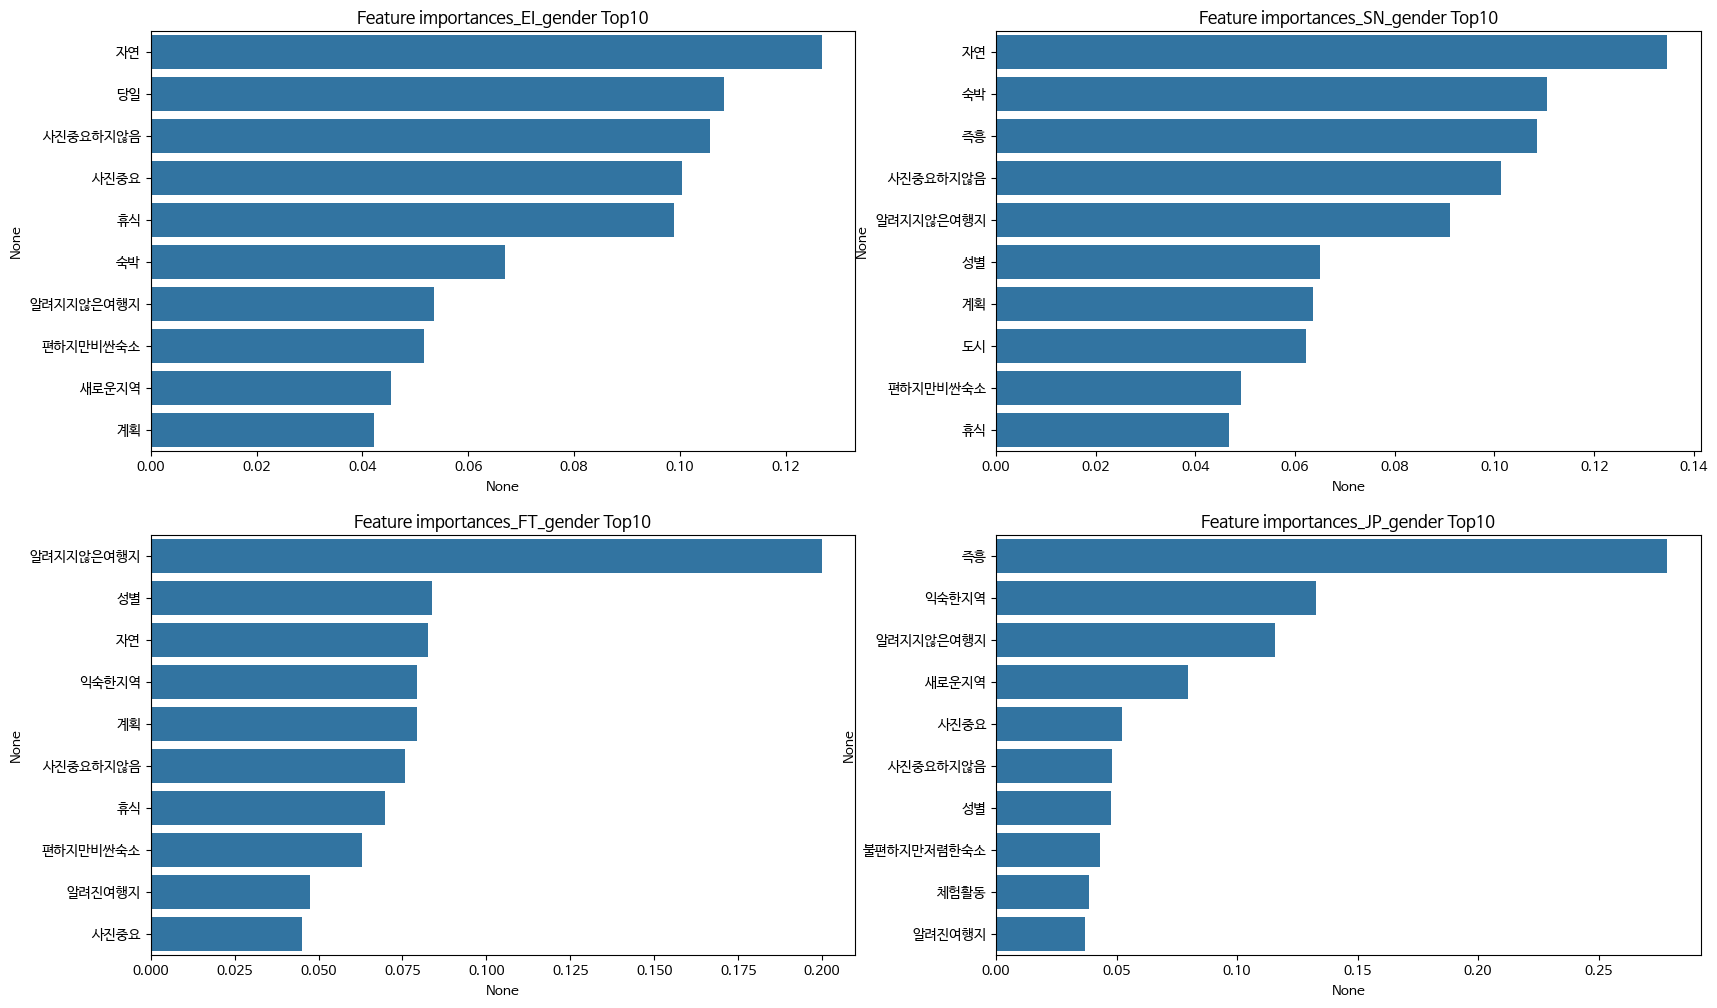

EI정확도 : 0.5172413793103449
SN정확도 : 0.4482758620689655
FT정확도 : 0.5172413793103449
JP정확도 : 0.5517241379310345


In [30]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_gender Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_gender Top10')
sns.barplot(x=ftr_top10_EI_gender, y=ftr_top10_EI_gender.index)

# 두 번째 그래프: Feature importances_SN_gender Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_gender Top10')
sns.barplot(x=ftr_top10_SN_gender, y=ftr_top10_SN_gender.index)

# 세 번째 그래프: Feature importances_FT_gender Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_gender Top10')
sns.barplot(x=ftr_top10_FT_gender, y=ftr_top10_FT_gender.index)

# 네 번째 그래프: Feature importances_JP_gender Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_gender Top10')
sns.barplot(x=ftr_top10_JP_gender, y=ftr_top10_JP_gender.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_gender}')
print(f'SN정확도 : {accuracy_SN_gender}')
print(f'FT정확도 : {accuracy_FT_gender}')
print(f'JP정확도 : {accuracy_JP_gender}')

## MBIT 요소별로 예측(성별 X, 동기 O)

### 정확도 및 feature importances

In [31]:
# E/I
dt_clf_EI_motivation = DecisionTreeClassifier(random_state=0)
dt_clf_EI_motivation.fit(X_train_EI_motivation, y_train_EI_motivation)
pred_EI_motivation = dt_clf_EI_motivation.predict(X_test_EI_motivation)
accuracy_EI_motivation = accuracy_score(y_test_EI_motivation, pred_EI_motivation)

ftr_importance_values_EI_motivation = dt_clf_EI_motivation.feature_importances_
ftr_importances_EI_motivation = pd.Series(ftr_importance_values_EI_motivation, index=X_train_EI_motivation.columns)
ftr_top10_EI_motivation = ftr_importances_EI_motivation.sort_values(ascending=False)[:10]

In [32]:
# S/N
dt_clf_SN_motivation = DecisionTreeClassifier(random_state=0)
dt_clf_SN_motivation.fit(X_train_SN_motivation, y_train_SN_motivation)
pred_SN_motivation = dt_clf_SN_motivation.predict(X_test_SN_motivation)
accuracy_SN_motivation = accuracy_score(y_test_SN_motivation, pred_SN_motivation)

ftr_importance_values_SN_motivation = dt_clf_SN_motivation.feature_importances_
ftr_importances_SN_motivation = pd.Series(ftr_importance_values_SN_motivation, index=X_train_SN_motivation.columns)
ftr_top10_SN_motivation = ftr_importances_SN_motivation.sort_values(ascending=False)[:10]

In [33]:
# F/T
dt_clf_FT_motivation = DecisionTreeClassifier(random_state=0)
dt_clf_FT_motivation.fit(X_train_FT_motivation, y_train_FT_motivation)
pred_FT_motivation = dt_clf_FT_motivation.predict(X_test_FT_motivation)
accuracy_FT_motivation = accuracy_score(y_test_FT_motivation, pred_FT_motivation)

ftr_importance_values_FT_motivation = dt_clf_FT_motivation.feature_importances_
ftr_importances_FT_motivation = pd.Series(ftr_importance_values_FT_motivation, index=X_train_FT_motivation.columns)
ftr_top10_FT_motivation = ftr_importances_FT_motivation.sort_values(ascending=False)[:10]

In [34]:
# J/P
dt_clf_JP_motivation = DecisionTreeClassifier(random_state=0)
dt_clf_JP_motivation.fit(X_train_JP_motivation, y_train_JP_motivation)
pred_JP_motivation = dt_clf_JP_motivation.predict(X_test_JP_motivation)
accuracy_JP_motivation = accuracy_score(y_test_JP_motivation, pred_JP_motivation)

ftr_importance_values_JP_motivation = dt_clf_JP_motivation.feature_importances_
ftr_importances_JP_motivation = pd.Series(ftr_importance_values_JP_motivation, index=X_train_JP_motivation.columns)
ftr_top10_JP_motivation = ftr_importances_JP_motivation.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

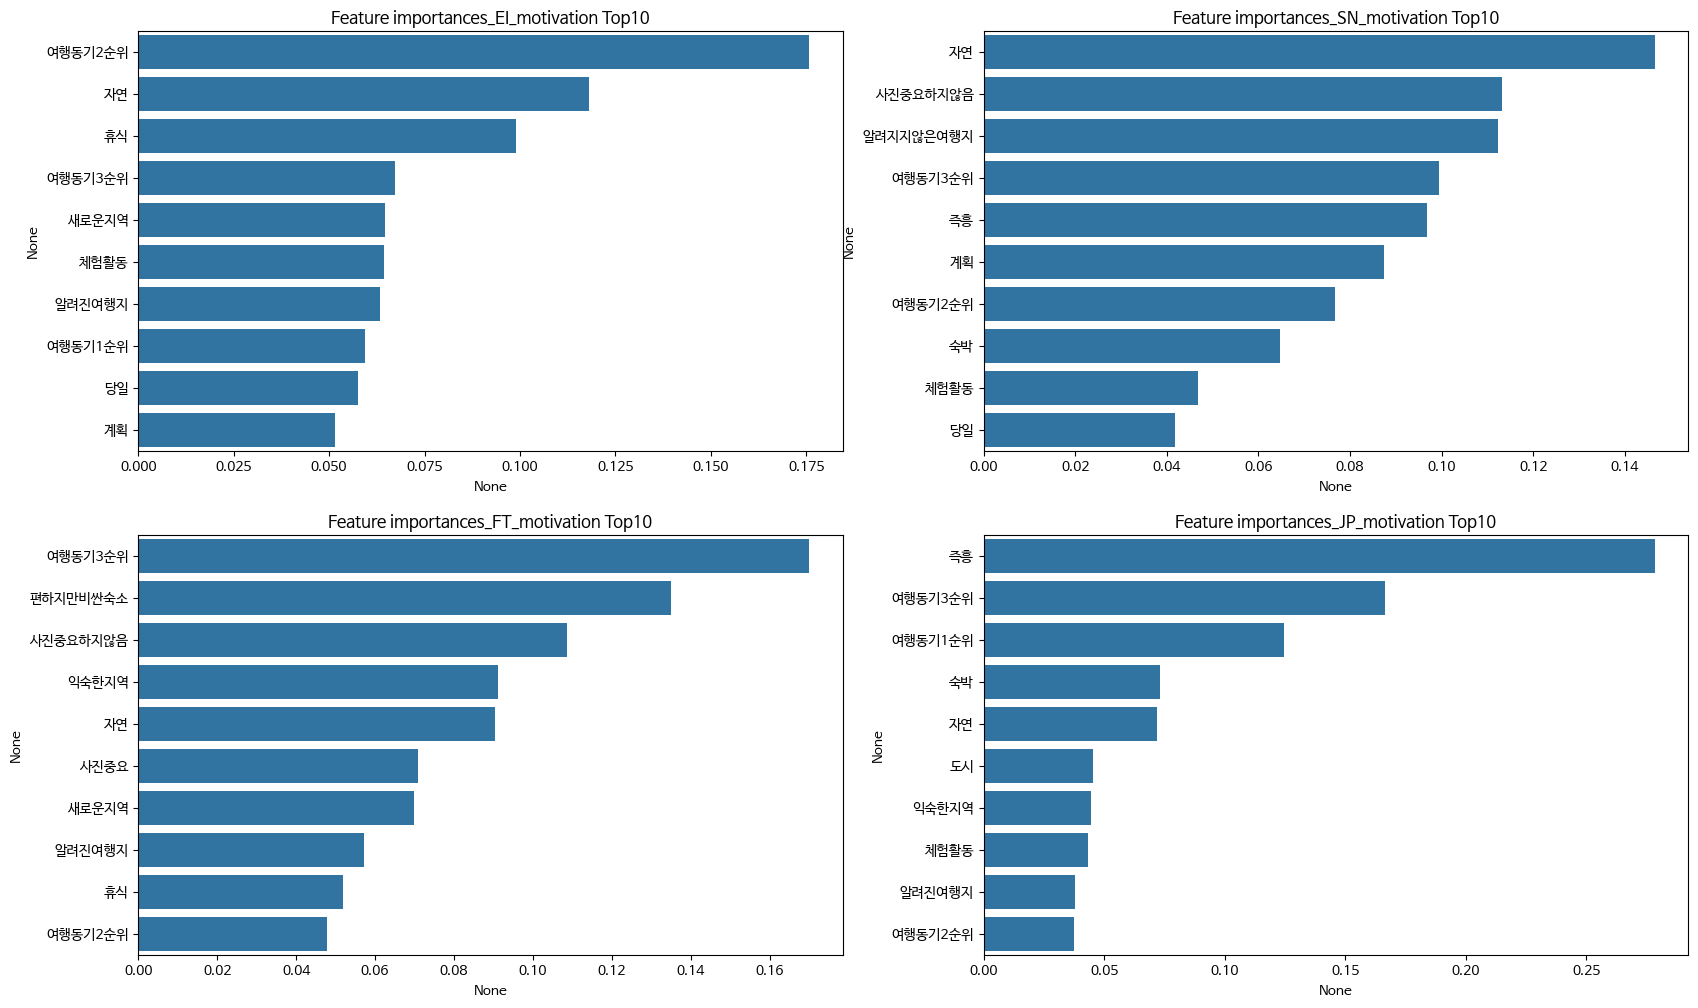

EI정확도 : 0.4827586206896552
SN정확도 : 0.5172413793103449
FT정확도 : 0.3448275862068966
JP정확도 : 0.6896551724137931


In [35]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_motivation Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_motivation Top10')
sns.barplot(x=ftr_top10_EI_motivation, y=ftr_top10_EI_motivation.index)

# 두 번째 그래프: Feature importances_SN_motivation Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_motivation Top10')
sns.barplot(x=ftr_top10_SN_motivation, y=ftr_top10_SN_motivation.index)

# 세 번째 그래프: Feature importances_FT_motivation Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_motivation Top10')
sns.barplot(x=ftr_top10_FT_motivation, y=ftr_top10_FT_motivation.index)

# 네 번째 그래프: Feature importances_JP_motivation Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_motivation Top10')
sns.barplot(x=ftr_top10_JP_motivation, y=ftr_top10_JP_motivation.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_motivation}')
print(f'SN정확도 : {accuracy_SN_motivation}')
print(f'FT정확도 : {accuracy_FT_motivation}')
print(f'JP정확도 : {accuracy_JP_motivation}')

## MBIT 요소별로 예측(성별 O, 동기 O)

### 정확도 및 feature importances

In [36]:
# E/I
dt_clf_EI_all = DecisionTreeClassifier(random_state=0)
dt_clf_EI_all.fit(X_train_EI_all, y_train_EI_all)
pred_EI_all = dt_clf_EI_all.predict(X_test_EI_all)
accuracy_EI_all = accuracy_score(y_test_EI_all, pred_EI_all)

ftr_importance_values_EI_all = dt_clf_EI_all.feature_importances_
ftr_importances_EI_all = pd.Series(ftr_importance_values_EI_all, index=X_train_EI_all.columns)
ftr_top10_EI_all = ftr_importances_EI_all.sort_values(ascending=False)[:10]

In [37]:
# S/N
dt_clf_SN_all = DecisionTreeClassifier(random_state=0)
dt_clf_SN_all.fit(X_train_SN_all, y_train_SN_all)
pred_SN_all = dt_clf_SN_all.predict(X_test_SN_all)
accuracy_SN_all = accuracy_score(y_test_SN_all, pred_SN_all)

ftr_importance_values_SN_all = dt_clf_SN_all.feature_importances_
ftr_importances_SN_all = pd.Series(ftr_importance_values_SN_all, index=X_train_SN_all.columns)
ftr_top10_SN_all = ftr_importances_SN_all.sort_values(ascending=False)[:10]

In [38]:
# F/T
dt_clf_FT_all = DecisionTreeClassifier(random_state=0)
dt_clf_FT_all.fit(X_train_FT_all, y_train_FT_all)
pred_FT_all = dt_clf_FT_all.predict(X_test_FT_all)
accuracy_FT_all = accuracy_score(y_test_FT_all, pred_FT_all)

ftr_importance_values_FT_all = dt_clf_FT_all.feature_importances_
ftr_importances_FT_all = pd.Series(ftr_importance_values_FT_all, index=X_train_FT_all.columns)
ftr_top10_FT_all = ftr_importances_FT_all.sort_values(ascending=False)[:10]

In [39]:
# J/P
dt_clf_JP_all = DecisionTreeClassifier(random_state=0)
dt_clf_JP_all.fit(X_train_JP_all, y_train_JP_all)
pred_JP_all = dt_clf_JP_all.predict(X_test_JP_all)
accuracy_JP_all = accuracy_score(y_test_JP_all, pred_JP_all)

ftr_importance_values_JP_all = dt_clf_JP_all.feature_importances_
ftr_importances_JP_all = pd.Series(ftr_importance_values_JP_all, index=X_train_JP_all.columns)
ftr_top10_JP_all = ftr_importances_JP_all.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

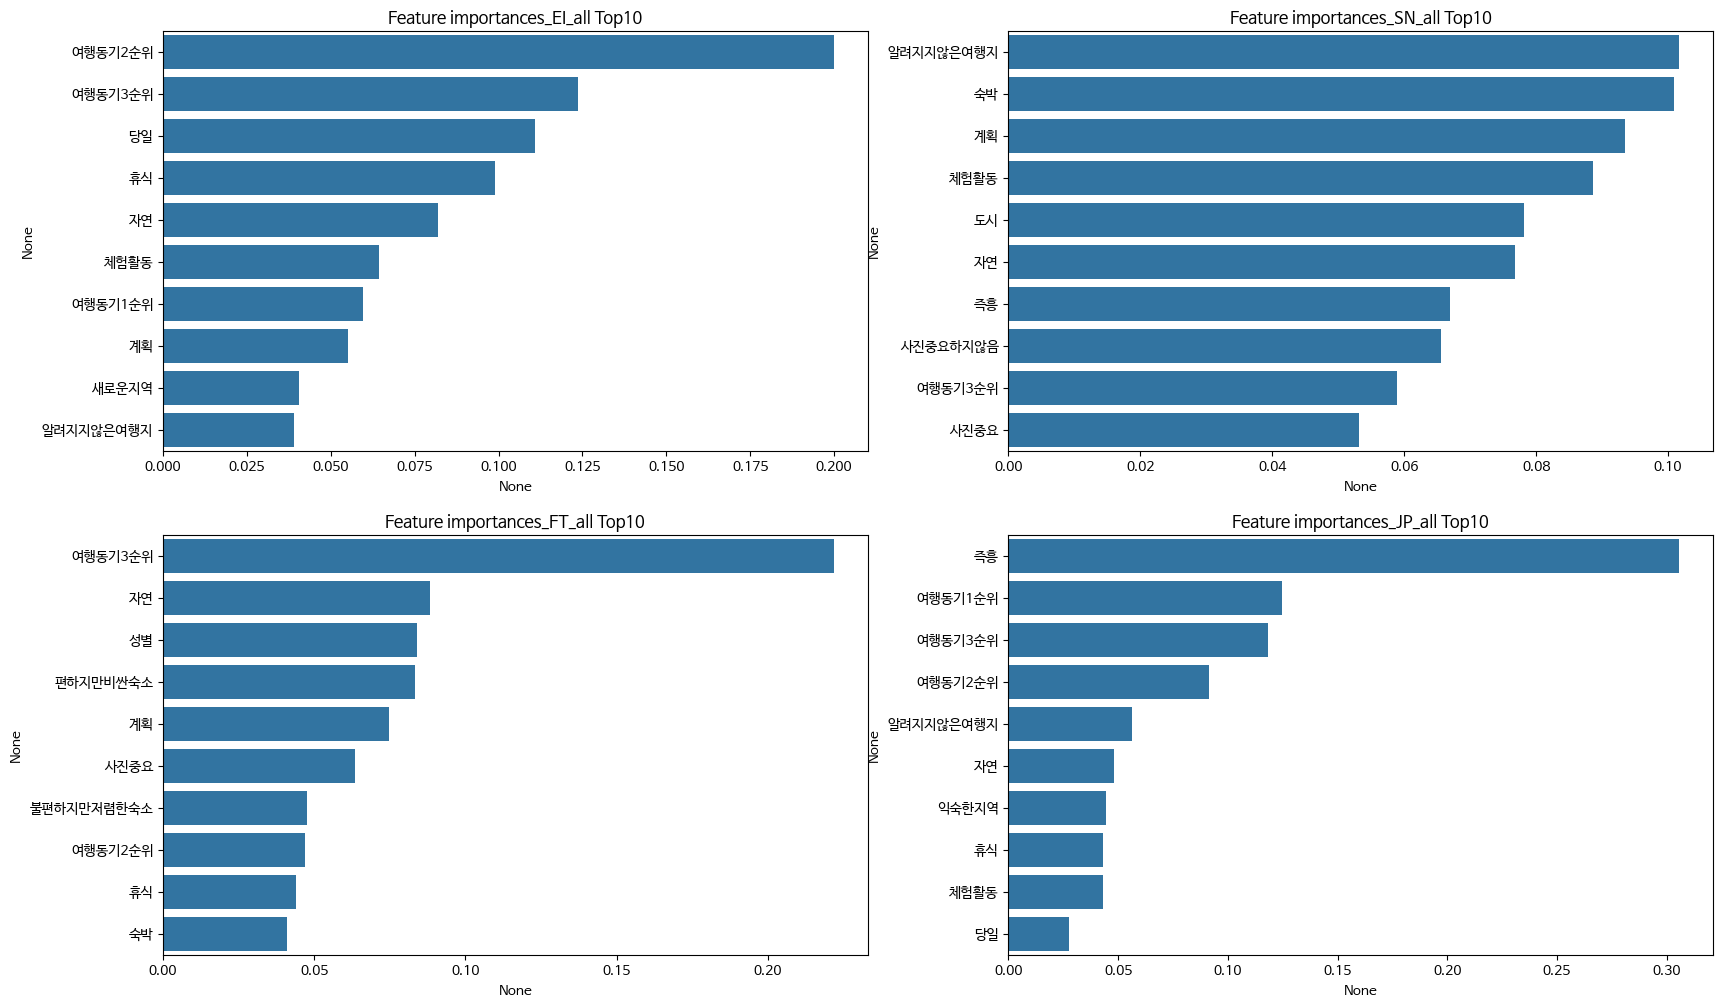

EI정확도 : 0.6206896551724138
SN정확도 : 0.5862068965517241
FT정확도 : 0.5517241379310345
JP정확도 : 0.6896551724137931


In [40]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_all Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_all Top10')
sns.barplot(x=ftr_top10_EI_all, y=ftr_top10_EI_all.index)

# 두 번째 그래프: Feature importances_SN_all Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_all Top10')
sns.barplot(x=ftr_top10_SN_all, y=ftr_top10_SN_all.index)

# 세 번째 그래프: Feature importances_FT_all Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_all Top10')
sns.barplot(x=ftr_top10_FT_all, y=ftr_top10_FT_all.index)

# 네 번째 그래프: Feature importances_JP_all Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_all Top10')
sns.barplot(x=ftr_top10_JP_all, y=ftr_top10_JP_all.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_all}')
print(f'SN정확도 : {accuracy_SN_all}')
print(f'FT정확도 : {accuracy_FT_all}')
print(f'JP정확도 : {accuracy_JP_all}')

## final append

In [41]:
final.loc['DT_성별X동기X'] = [accuracy_EI, accuracy_SN, accuracy_FT, accuracy_JP]
final.loc['DT_성별O동기X'] = [accuracy_EI_gender, accuracy_SN_gender, accuracy_FT_gender, accuracy_JP_gender]
final.loc['DT_성별X동기O'] = [accuracy_EI_motivation, accuracy_SN_motivation, accuracy_FT_motivation, accuracy_JP_motivation]
final.loc['DT_성별O동기O'] = [accuracy_EI_all, accuracy_SN_all, accuracy_FT_all, accuracy_JP_all]

# MBTI 예측모델(RandomForest)

## MBTI 전체

In [42]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.27586206896551724


## MBIT 요소별로 예측(성별 X, 동기 X)

### 정확도 및 feature importances

In [43]:
# E/I
rf_clf_EI = RandomForestClassifier(random_state=0)
rf_clf_EI.fit(X_train_EI, y_train_EI)
pred_EI = rf_clf_EI.predict(X_test_EI)
accuracy_EI = accuracy_score(y_test_EI, pred_EI)

ftr_importance_values_EI = rf_clf_EI.feature_importances_
ftr_importances_EI = pd.Series(ftr_importance_values_EI, index=X_train_EI.columns)
ftr_top10_EI = ftr_importances_EI.sort_values(ascending=False)[:10]

In [44]:
# S/N
rf_clf_SN = RandomForestClassifier(random_state=0)
rf_clf_SN.fit(X_train_SN, y_train_SN)
pred_SN = rf_clf_SN.predict(X_test_SN)
accuracy_SN = accuracy_score(y_test_SN, pred_SN)

ftr_importance_values_SN = rf_clf_SN.feature_importances_
ftr_importances_SN = pd.Series(ftr_importance_values_SN, index=X_train_SN.columns)
ftr_top10_SN = ftr_importances_SN.sort_values(ascending=False)[:10]

In [45]:
# F/T
rf_clf_FT = RandomForestClassifier(random_state=0)
rf_clf_FT.fit(X_train_FT, y_train_FT)
pred_FT = rf_clf_FT.predict(X_test_FT)
accuracy_FT = accuracy_score(y_test_FT, pred_FT)

ftr_importance_values_FT = rf_clf_FT.feature_importances_
ftr_importances_FT = pd.Series(ftr_importance_values_FT, index=X_train_FT.columns)
ftr_top10_FT = ftr_importances_FT.sort_values(ascending=False)[:10]

In [46]:
# J/P
rf_clf_JP = RandomForestClassifier(random_state=0)
rf_clf_JP.fit(X_train_JP, y_train_JP)
pred_JP = rf_clf_JP.predict(X_test_JP)
accuracy_JP = accuracy_score(y_test_JP, pred_JP)

ftr_importance_values_JP = rf_clf_JP.feature_importances_
ftr_importances_JP = pd.Series(ftr_importance_values_JP, index=X_train_JP.columns)
ftr_top10_JP = ftr_importances_JP.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

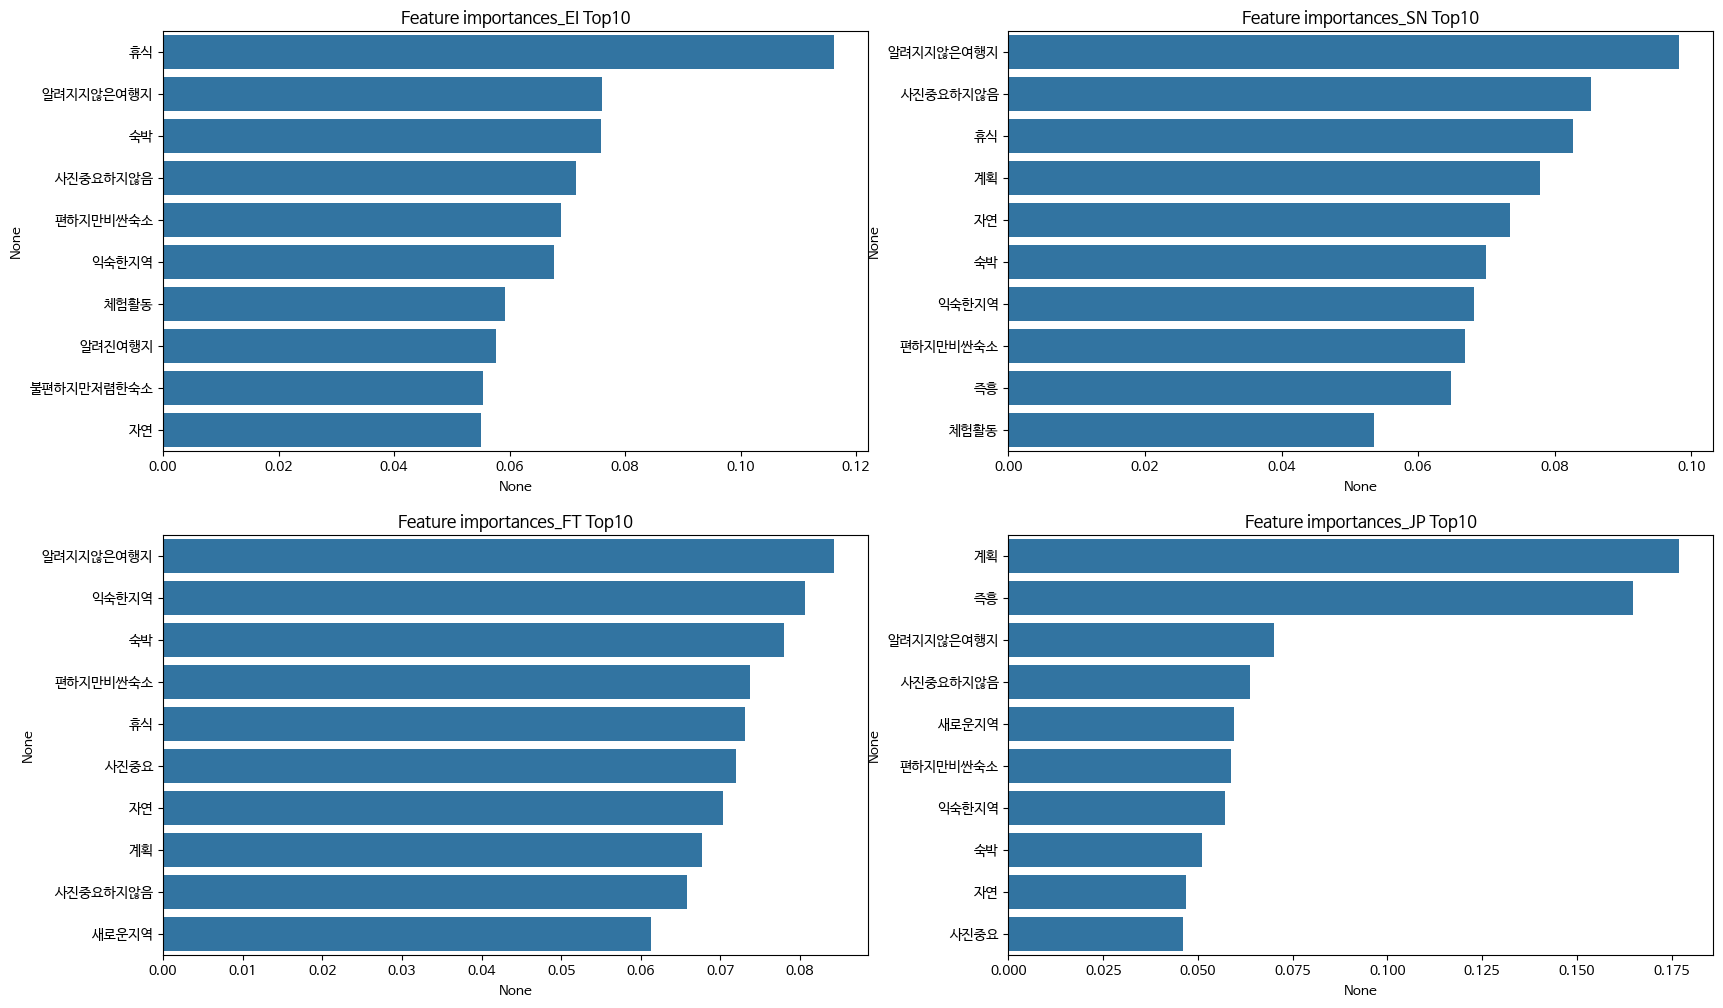

EI정확도 : 0.6551724137931034
SN정확도 : 0.5172413793103449
FT정확도 : 0.6206896551724138
JP정확도 : 0.7931034482758621


In [47]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI Top10')
sns.barplot(x=ftr_top10_EI, y=ftr_top10_EI.index)

# 두 번째 그래프: Feature importances_SN Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN Top10')
sns.barplot(x=ftr_top10_SN, y=ftr_top10_SN.index)

# 세 번째 그래프: Feature importances_FT Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT Top10')
sns.barplot(x=ftr_top10_FT, y=ftr_top10_FT.index)

# 네 번째 그래프: Feature importances_JP Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP Top10')
sns.barplot(x=ftr_top10_JP, y=ftr_top10_JP.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI}')
print(f'SN정확도 : {accuracy_SN}')
print(f'FT정확도 : {accuracy_FT}')
print(f'JP정확도 : {accuracy_JP}')

## MBIT 요소별로 예측(성별 O, 동기 X)

### 정확도 및 feature importances

In [48]:
# E/I
rf_clf_EI_gender = RandomForestClassifier(random_state=0)
rf_clf_EI_gender.fit(X_train_EI_gender, y_train_EI_gender)
pred_EI_gender = rf_clf_EI_gender.predict(X_test_EI_gender)
accuracy_EI_gender = accuracy_score(y_test_EI_gender, pred_EI_gender)

ftr_importance_values_EI_gender = rf_clf_EI_gender.feature_importances_
ftr_importances_EI_gender = pd.Series(ftr_importance_values_EI_gender, index=X_train_EI_gender.columns)
ftr_top10_EI_gender = ftr_importances_EI_gender.sort_values(ascending=False)[:10]

In [49]:
# S/N
rf_clf_SN_gender = RandomForestClassifier(random_state=0)
rf_clf_SN_gender.fit(X_train_SN_gender, y_train_SN_gender)
pred_SN_gender = rf_clf_SN_gender.predict(X_test_SN_gender)
accuracy_SN_gender = accuracy_score(y_test_SN_gender, pred_SN_gender)

ftr_importance_values_SN_gender = rf_clf_SN_gender.feature_importances_
ftr_importances_SN_gender = pd.Series(ftr_importance_values_SN_gender, index=X_train_SN_gender.columns)
ftr_top10_SN_gender = ftr_importances_SN_gender.sort_values(ascending=False)[:10]

In [50]:
# F/T
rf_clf_FT_gender = RandomForestClassifier(random_state=0)
rf_clf_FT_gender.fit(X_train_FT_gender, y_train_FT_gender)
pred_FT_gender = rf_clf_FT_gender.predict(X_test_FT_gender)
accuracy_FT_gender = accuracy_score(y_test_FT_gender, pred_FT_gender)

ftr_importance_values_FT_gender = rf_clf_FT_gender.feature_importances_
ftr_importances_FT_gender = pd.Series(ftr_importance_values_FT_gender, index=X_train_FT_gender.columns)
ftr_top10_FT_gender = ftr_importances_FT_gender.sort_values(ascending=False)[:10]

In [51]:
# J/P
rf_clf_JP_gender = RandomForestClassifier(random_state=0)
rf_clf_JP_gender.fit(X_train_JP_gender, y_train_JP_gender)
pred_JP_gender = rf_clf_JP_gender.predict(X_test_JP_gender)
accuracy_JP_gender = accuracy_score(y_test_JP_gender, pred_JP_gender)

ftr_importance_values_JP_gender = rf_clf_JP_gender.feature_importances_
ftr_importances_JP_gender = pd.Series(ftr_importance_values_JP_gender, index=X_train_JP_gender.columns)
ftr_top10_JP_gender = ftr_importances_JP_gender.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

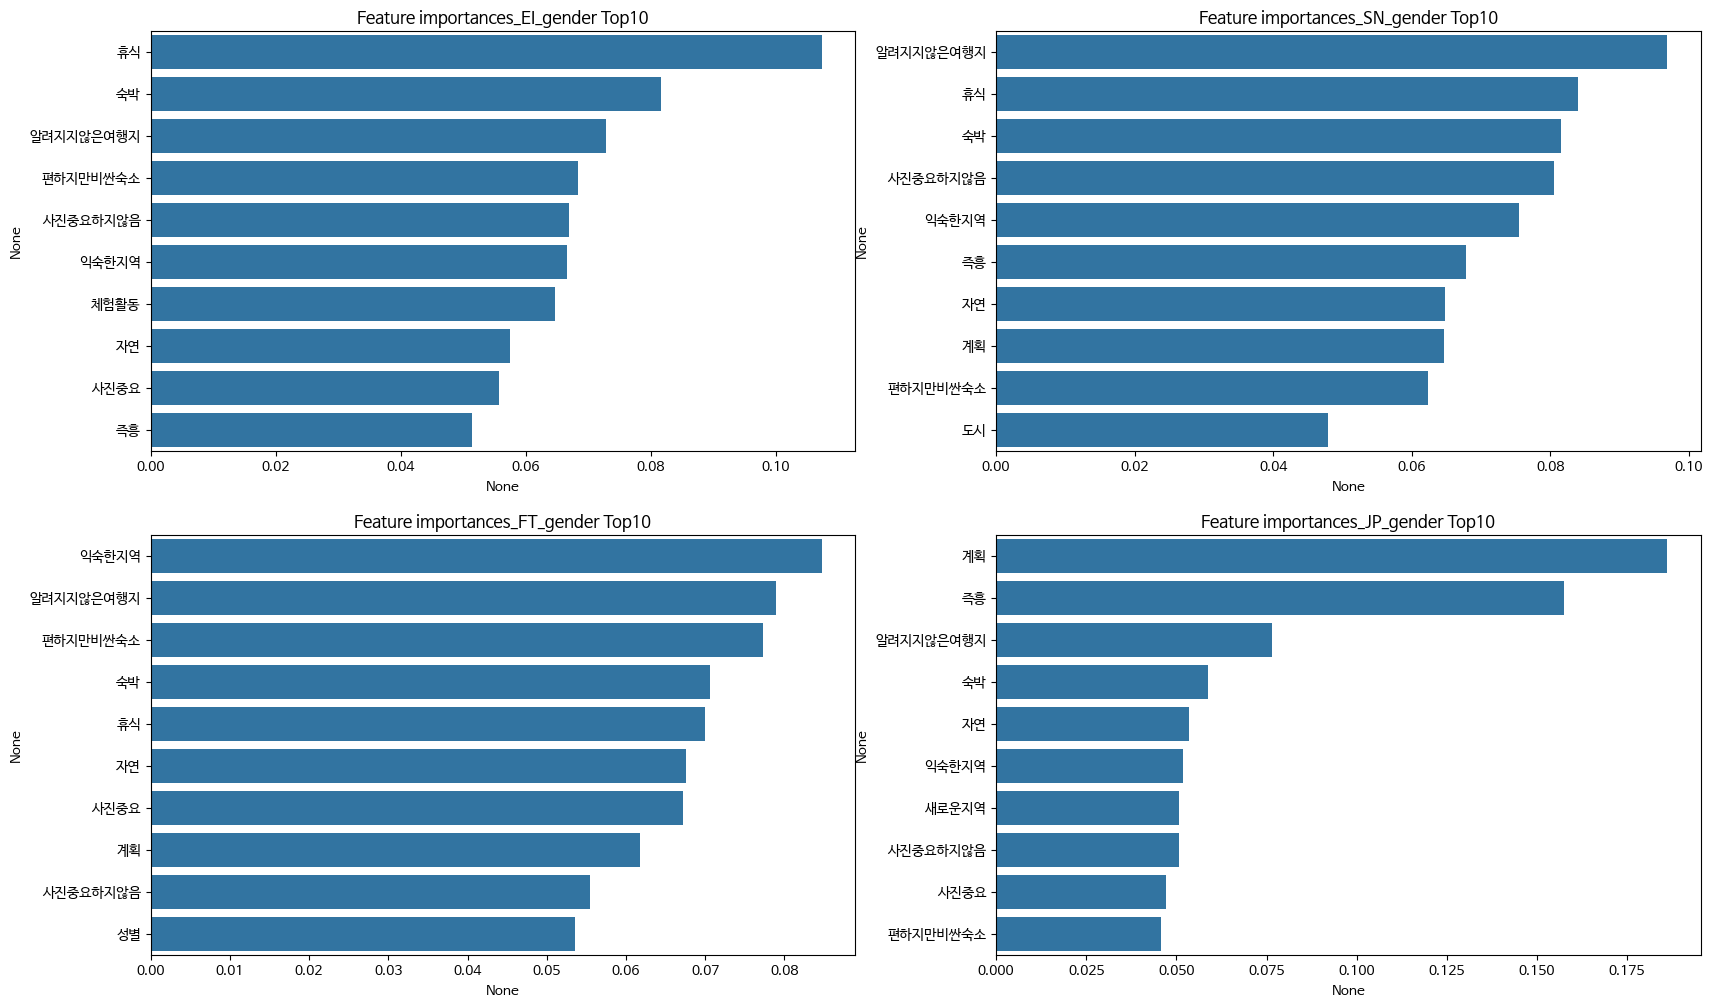

EI정확도 : 0.5517241379310345
SN정확도 : 0.5862068965517241
FT정확도 : 0.4482758620689655
JP정확도 : 0.7931034482758621


In [52]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_gender Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_gender Top10')
sns.barplot(x=ftr_top10_EI_gender, y=ftr_top10_EI_gender.index)

# 두 번째 그래프: Feature importances_SN_gender Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_gender Top10')
sns.barplot(x=ftr_top10_SN_gender, y=ftr_top10_SN_gender.index)

# 세 번째 그래프: Feature importances_FT_gender Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_gender Top10')
sns.barplot(x=ftr_top10_FT_gender, y=ftr_top10_FT_gender.index)

# 네 번째 그래프: Feature importances_JP_gender Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_gender Top10')
sns.barplot(x=ftr_top10_JP_gender, y=ftr_top10_JP_gender.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_gender}')
print(f'SN정확도 : {accuracy_SN_gender}')
print(f'FT정확도 : {accuracy_FT_gender}')
print(f'JP정확도 : {accuracy_JP_gender}')

## MBIT 요소별로 예측(성별 X, 동기 O)

### 정확도 및 feature importances

In [53]:
# E/I
rf_clf_EI_motivation = RandomForestClassifier(random_state=0)
rf_clf_EI_motivation.fit(X_train_EI_motivation, y_train_EI_motivation)
pred_EI_motivation = rf_clf_EI_motivation.predict(X_test_EI_motivation)
accuracy_EI_motivation = accuracy_score(y_test_EI_motivation, pred_EI_motivation)

ftr_importance_values_EI_motivation = rf_clf_EI_motivation.feature_importances_
ftr_importances_EI_motivation = pd.Series(ftr_importance_values_EI_motivation, index=X_train_EI_motivation.columns)
ftr_top10_EI_motivation = ftr_importances_EI_motivation.sort_values(ascending=False)[:10]

In [54]:
# S/N
rf_clf_SN_motivation = RandomForestClassifier(random_state=0)
rf_clf_SN_motivation.fit(X_train_SN_motivation, y_train_SN_motivation)
pred_SN_motivation = rf_clf_SN_motivation.predict(X_test_SN_motivation)
accuracy_SN_motivation = accuracy_score(y_test_SN_motivation, pred_SN_motivation)

ftr_importance_values_SN_motivation = rf_clf_SN_motivation.feature_importances_
ftr_importances_SN_motivation = pd.Series(ftr_importance_values_SN_motivation, index=X_train_SN_motivation.columns)
ftr_top10_SN_motivation = ftr_importances_SN_motivation.sort_values(ascending=False)[:10]

In [55]:
# F/T
rf_clf_FT_motivation = RandomForestClassifier(random_state=0)
rf_clf_FT_motivation.fit(X_train_FT_motivation, y_train_FT_motivation)
pred_FT_motivation = rf_clf_FT_motivation.predict(X_test_FT_motivation)
accuracy_FT_motivation = accuracy_score(y_test_FT_motivation, pred_FT_motivation)

ftr_importance_values_FT_motivation = rf_clf_FT_motivation.feature_importances_
ftr_importances_FT_motivation = pd.Series(ftr_importance_values_FT_motivation, index=X_train_FT_motivation.columns)
ftr_top10_FT_motivation = ftr_importances_FT_motivation.sort_values(ascending=False)[:10]

In [56]:
# J/P
rf_clf_JP_motivation = RandomForestClassifier(random_state=0)
rf_clf_JP_motivation.fit(X_train_JP_motivation, y_train_JP_motivation)
pred_JP_motivation = rf_clf_JP_motivation.predict(X_test_JP_motivation)
accuracy_JP_motivation = accuracy_score(y_test_JP_motivation, pred_JP_motivation)

ftr_importance_values_JP_motivation = rf_clf_JP_motivation.feature_importances_
ftr_importances_JP_motivation = pd.Series(ftr_importance_values_JP_motivation, index=X_train_JP_motivation.columns)
ftr_top10_JP_motivation = ftr_importances_JP_motivation.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

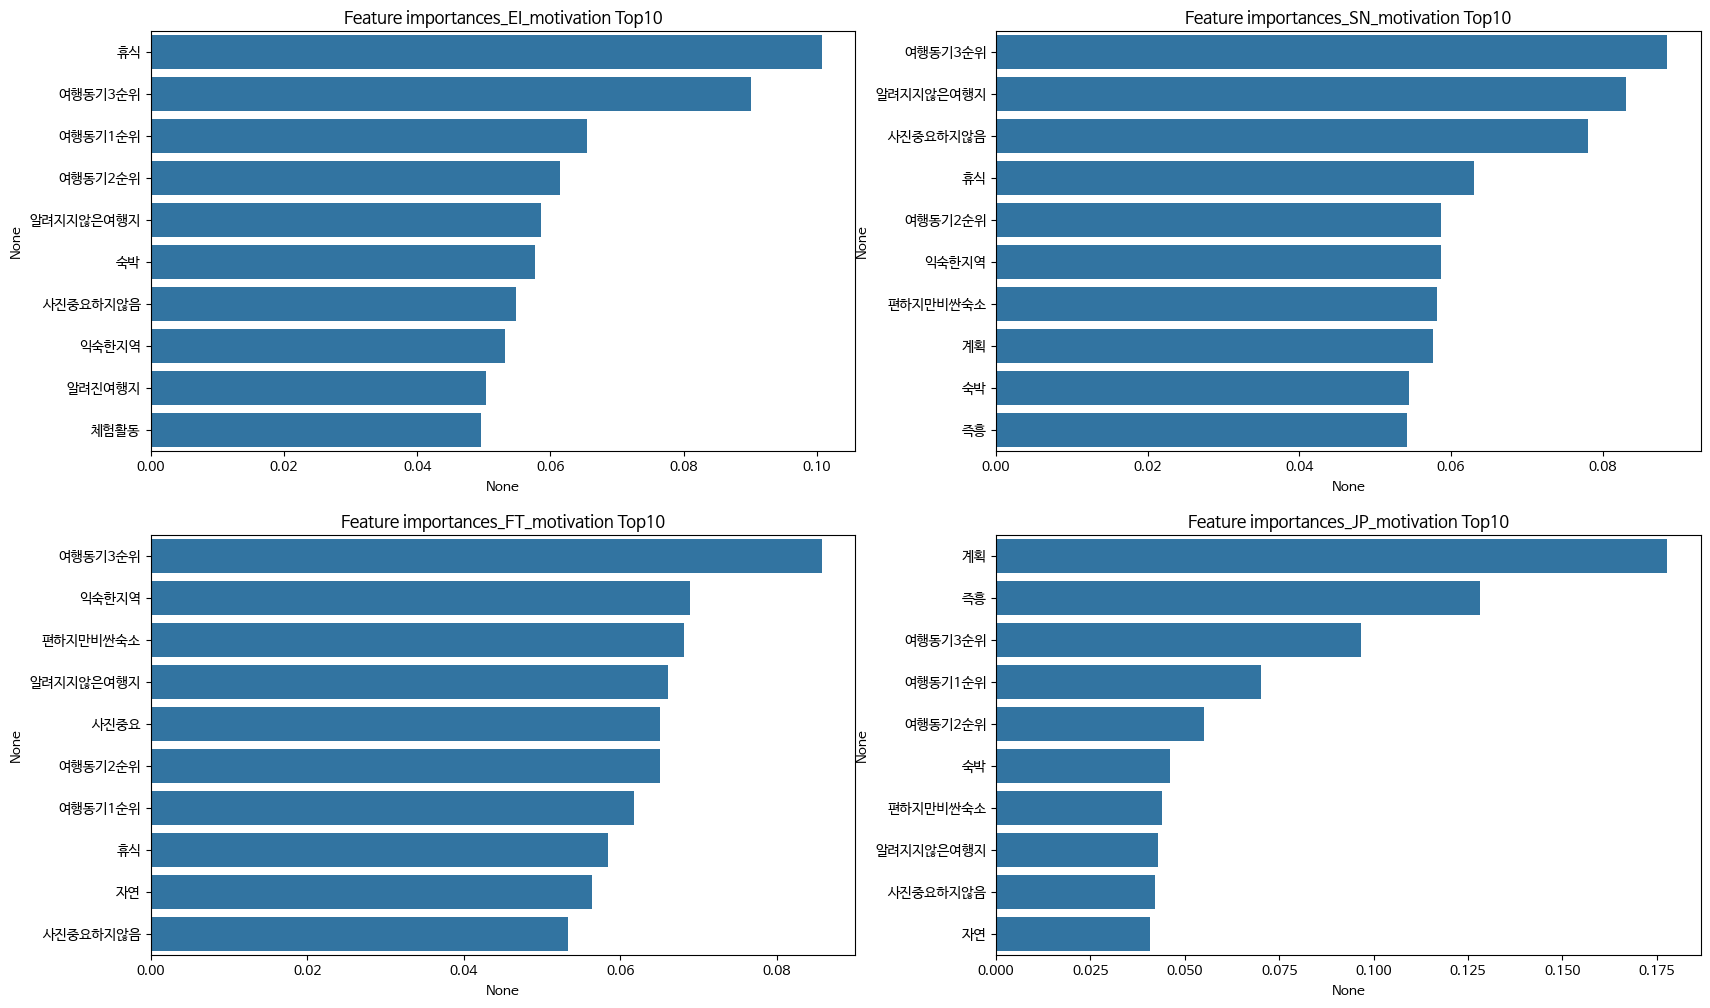

EI정확도 : 0.7241379310344828
SN정확도 : 0.5172413793103449
FT정확도 : 0.5172413793103449
JP정확도 : 0.7931034482758621


In [57]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_motivation Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_motivation Top10')
sns.barplot(x=ftr_top10_EI_motivation, y=ftr_top10_EI_motivation.index)

# 두 번째 그래프: Feature importances_SN_motivation Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_motivation Top10')
sns.barplot(x=ftr_top10_SN_motivation, y=ftr_top10_SN_motivation.index)

# 세 번째 그래프: Feature importances_FT_motivation Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_motivation Top10')
sns.barplot(x=ftr_top10_FT_motivation, y=ftr_top10_FT_motivation.index)

# 네 번째 그래프: Feature importances_JP_motivation Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_motivation Top10')
sns.barplot(x=ftr_top10_JP_motivation, y=ftr_top10_JP_motivation.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_motivation}')
print(f'SN정확도 : {accuracy_SN_motivation}')
print(f'FT정확도 : {accuracy_FT_motivation}')
print(f'JP정확도 : {accuracy_JP_motivation}')

## MBIT 요소별로 예측(성별 O, 동기 O)

### 정확도 및 feature importances

In [58]:
# E/I
rf_clf_EI_all = RandomForestClassifier(random_state=0)
rf_clf_EI_all.fit(X_train_EI_all, y_train_EI_all)
pred_EI_all = rf_clf_EI_all.predict(X_test_EI_all)
accuracy_EI_all = accuracy_score(y_test_EI_all, pred_EI_all)

ftr_importance_values_EI_all = rf_clf_EI_all.feature_importances_
ftr_importances_EI_all = pd.Series(ftr_importance_values_EI_all, index=X_train_EI_all.columns)
ftr_top10_EI_all = ftr_importances_EI_all.sort_values(ascending=False)[:10]

In [59]:
# S/N
rf_clf_SN_all = RandomForestClassifier(random_state=0)
rf_clf_SN_all.fit(X_train_SN_all, y_train_SN_all)
pred_SN_all = rf_clf_SN_all.predict(X_test_SN_all)
accuracy_SN_all = accuracy_score(y_test_SN_all, pred_SN_all)

ftr_importance_values_SN_all = rf_clf_SN_all.feature_importances_
ftr_importances_SN_all = pd.Series(ftr_importance_values_SN_all, index=X_train_SN_all.columns)
ftr_top10_SN_all = ftr_importances_SN_all.sort_values(ascending=False)[:10]

In [60]:
# F/T
rf_clf_FT_all = RandomForestClassifier(random_state=0)
rf_clf_FT_all.fit(X_train_FT_all, y_train_FT_all)
pred_FT_all = rf_clf_FT_all.predict(X_test_FT_all)
accuracy_FT_all = accuracy_score(y_test_FT_all, pred_FT_all)

ftr_importance_values_FT_all = rf_clf_FT_all.feature_importances_
ftr_importances_FT_all = pd.Series(ftr_importance_values_FT_all, index=X_train_FT_all.columns)
ftr_top10_FT_all = ftr_importances_FT_all.sort_values(ascending=False)[:10]

In [61]:
# J/P
rf_clf_JP_all = RandomForestClassifier(random_state=0)
rf_clf_JP_all.fit(X_train_JP_all, y_train_JP_all)
pred_JP_all = rf_clf_JP_all.predict(X_test_JP_all)
accuracy_JP_all = accuracy_score(y_test_JP_all, pred_JP_all)

ftr_importance_values_JP_all = rf_clf_JP_all.feature_importances_
ftr_importances_JP_all = pd.Series(ftr_importance_values_JP_all, index=X_train_JP_all.columns)
ftr_top10_JP_all = ftr_importances_JP_all.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

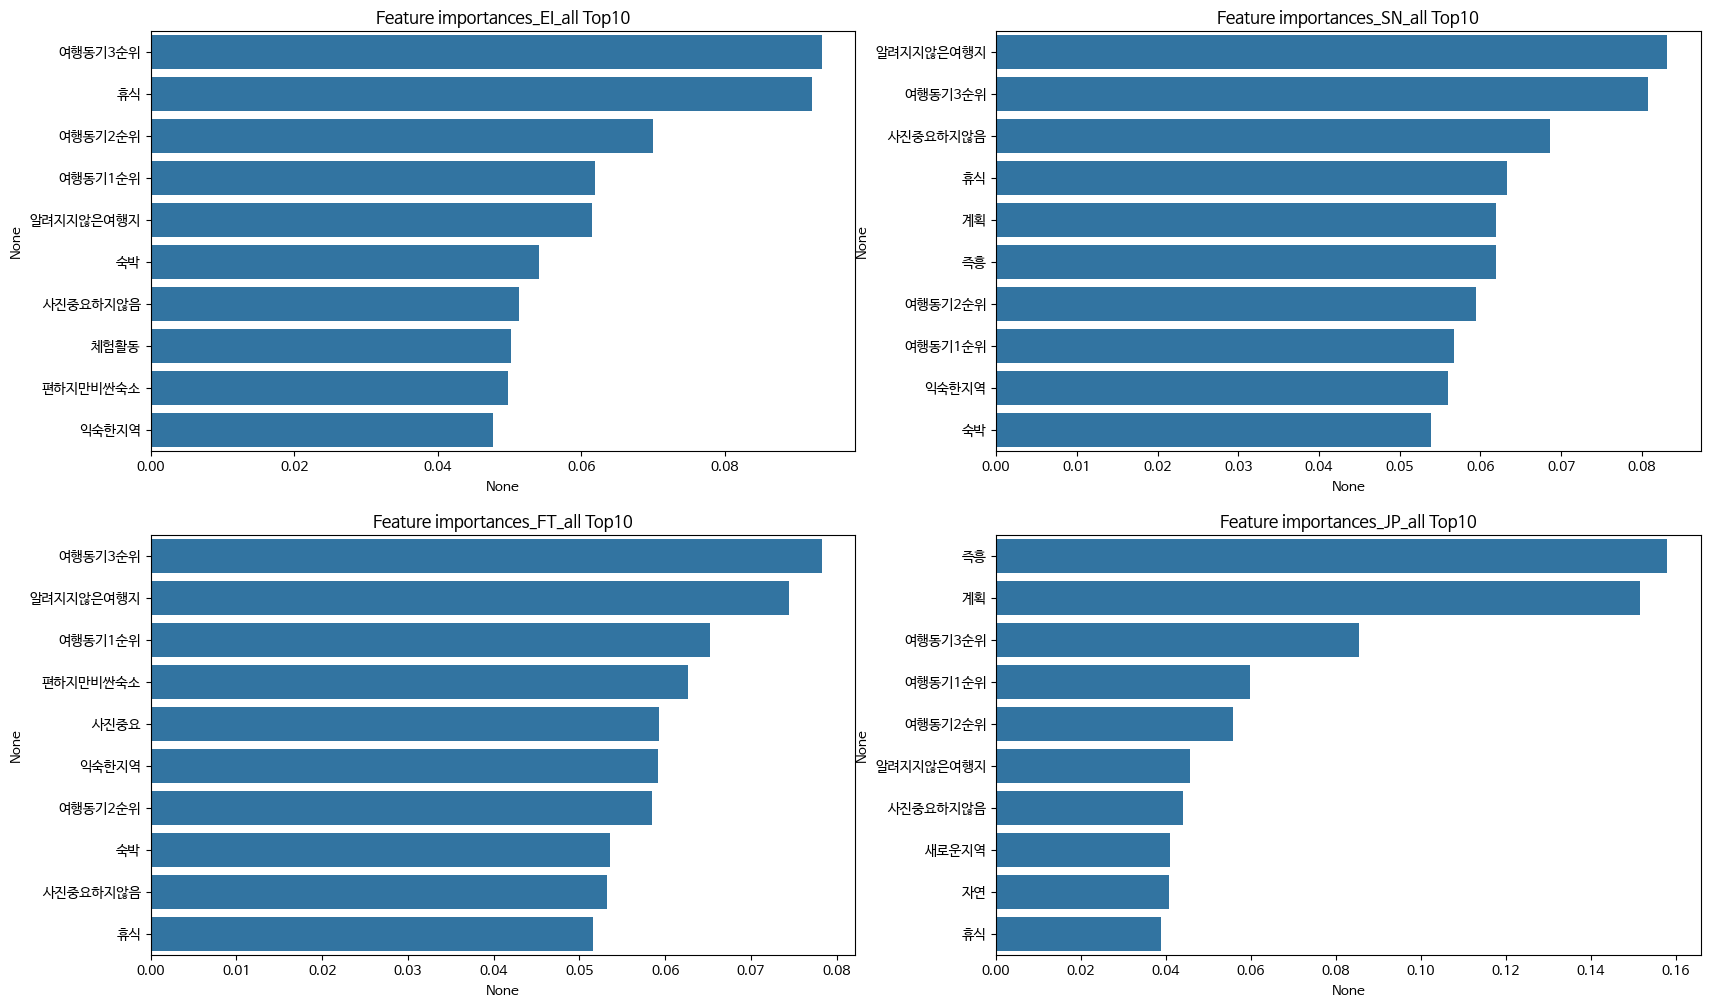

EI정확도 : 0.6896551724137931
SN정확도 : 0.6206896551724138
FT정확도 : 0.5862068965517241
JP정확도 : 0.7931034482758621


In [62]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_all Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_all Top10')
sns.barplot(x=ftr_top10_EI_all, y=ftr_top10_EI_all.index)

# 두 번째 그래프: Feature importances_SN_all Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_all Top10')
sns.barplot(x=ftr_top10_SN_all, y=ftr_top10_SN_all.index)

# 세 번째 그래프: Feature importances_FT_all Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_all Top10')
sns.barplot(x=ftr_top10_FT_all, y=ftr_top10_FT_all.index)

# 네 번째 그래프: Feature importances_JP_all Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_all Top10')
sns.barplot(x=ftr_top10_JP_all, y=ftr_top10_JP_all.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_all}')
print(f'SN정확도 : {accuracy_SN_all}')
print(f'FT정확도 : {accuracy_FT_all}')
print(f'JP정확도 : {accuracy_JP_all}')

## final append

In [63]:
final.loc['RLF_성별X동기X'] = [accuracy_EI, accuracy_SN, accuracy_FT, accuracy_JP]
final.loc['RLF_성별O동기X'] = [accuracy_EI_gender, accuracy_SN_gender, accuracy_FT_gender, accuracy_JP_gender]
final.loc['RLF_성별X동기O'] = [accuracy_EI_motivation, accuracy_SN_motivation, accuracy_FT_motivation, accuracy_JP_motivation]
final.loc['RLF_성별O동기O'] = [accuracy_EI_all, accuracy_SN_all, accuracy_FT_all, accuracy_JP_all]

# MBTI 예측모델(GBM)

## MBTI 전체

In [64]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.13793103448275862


## MBIT 요소별로 예측(성별 X, 동기 X)

### 정확도 및 feature importances

In [65]:
# E/I
gb_clf_EI = GradientBoostingClassifier(random_state=0)
gb_clf_EI.fit(X_train_EI, y_train_EI)
pred_EI = gb_clf_EI.predict(X_test_EI)
accuracy_EI = accuracy_score(y_test_EI, pred_EI)

ftr_importance_values_EI = gb_clf_EI.feature_importances_
ftr_importances_EI = pd.Series(ftr_importance_values_EI, index=X_train_EI.columns)
ftr_top10_EI = ftr_importances_EI.sort_values(ascending=False)[:10]

In [66]:
# S/N
gb_clf_SN = GradientBoostingClassifier(random_state=0)
gb_clf_SN.fit(X_train_SN, y_train_SN)
pred_SN = gb_clf_SN.predict(X_test_SN)
accuracy_SN = accuracy_score(y_test_SN, pred_SN)

ftr_importance_values_SN = gb_clf_SN.feature_importances_
ftr_importances_SN = pd.Series(ftr_importance_values_SN, index=X_train_SN.columns)
ftr_top10_SN = ftr_importances_SN.sort_values(ascending=False)[:10]

In [67]:
# F/T
gb_clf_FT = GradientBoostingClassifier(random_state=0)
gb_clf_FT.fit(X_train_FT, y_train_FT)
pred_FT = gb_clf_FT.predict(X_test_FT)
accuracy_FT = accuracy_score(y_test_FT, pred_FT)

ftr_importance_values_FT = gb_clf_FT.feature_importances_
ftr_importances_FT = pd.Series(ftr_importance_values_FT, index=X_train_FT.columns)
ftr_top10_FT = ftr_importances_FT.sort_values(ascending=False)[:10]

In [68]:
# J/P
gb_clf_JP = GradientBoostingClassifier(random_state=0)
gb_clf_JP.fit(X_train_JP, y_train_JP)
pred_JP = gb_clf_JP.predict(X_test_JP)
accuracy_JP = accuracy_score(y_test_JP, pred_JP)

ftr_importance_values_JP = gb_clf_JP.feature_importances_
ftr_importances_JP = pd.Series(ftr_importance_values_JP, index=X_train_JP.columns)
ftr_top10_JP = ftr_importances_JP.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

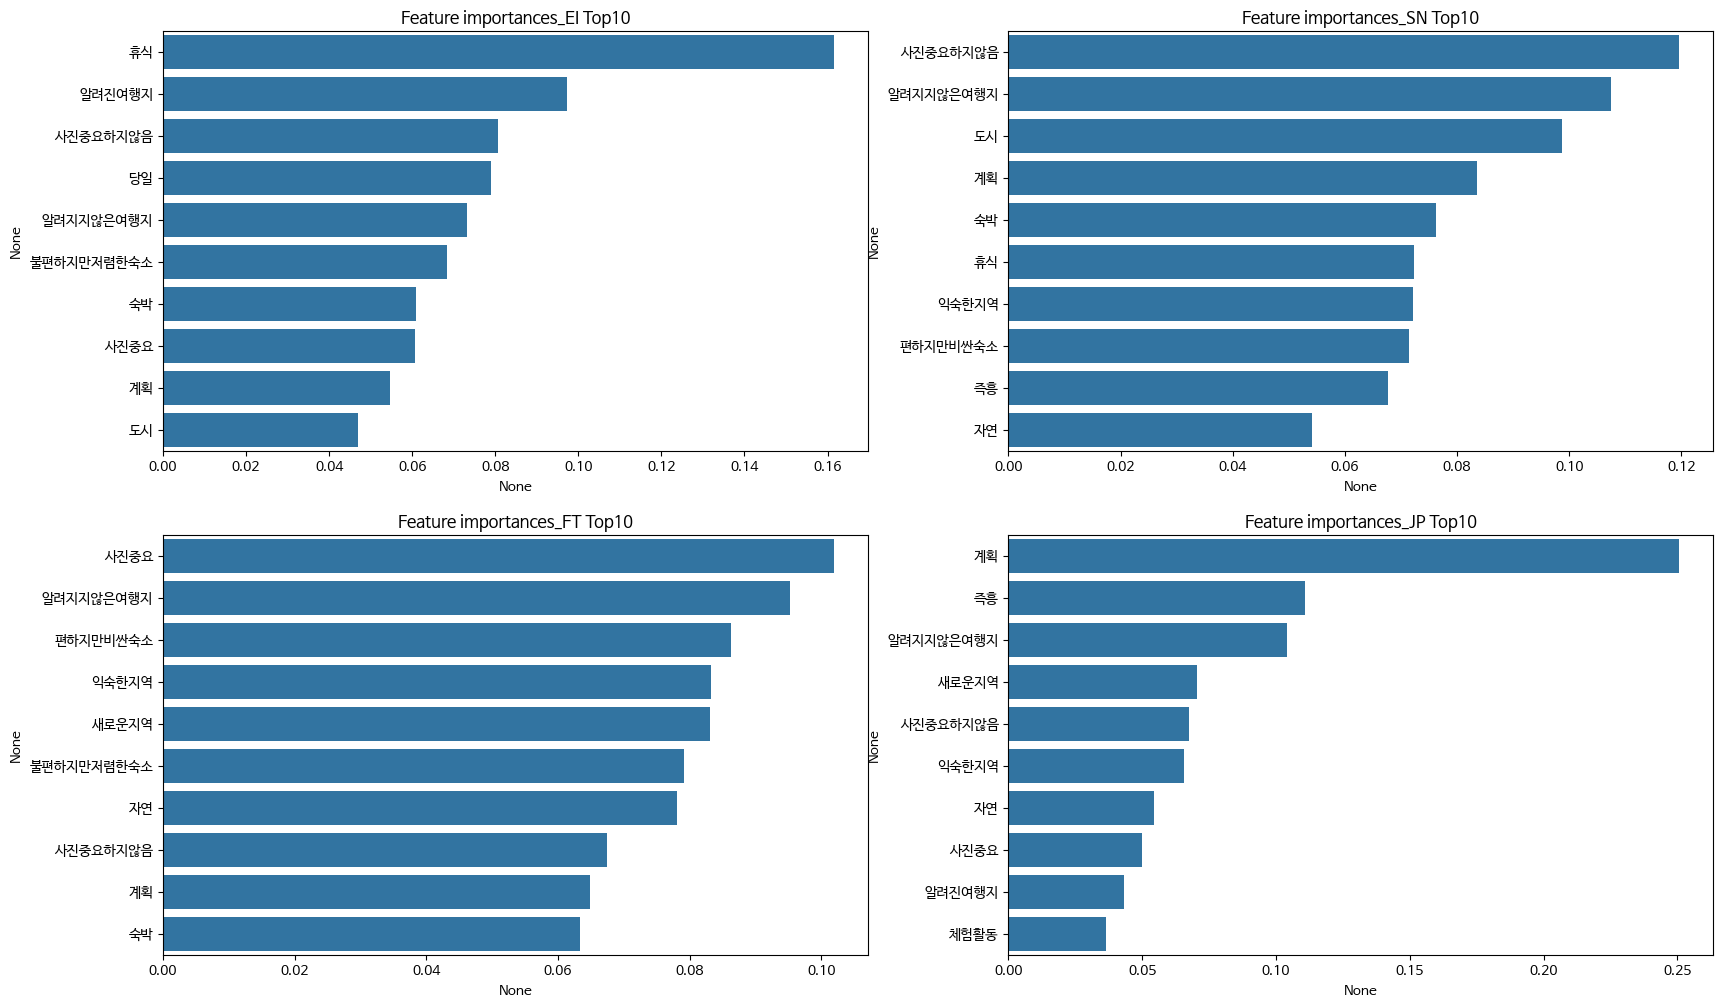

EI정확도 : 0.6896551724137931
SN정확도 : 0.5172413793103449
FT정확도 : 0.5862068965517241
JP정확도 : 0.7241379310344828


In [69]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI Top10')
sns.barplot(x=ftr_top10_EI, y=ftr_top10_EI.index)

# 두 번째 그래프: Feature importances_SN Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN Top10')
sns.barplot(x=ftr_top10_SN, y=ftr_top10_SN.index)

# 세 번째 그래프: Feature importances_FT Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT Top10')
sns.barplot(x=ftr_top10_FT, y=ftr_top10_FT.index)

# 네 번째 그래프: Feature importances_JP Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP Top10')
sns.barplot(x=ftr_top10_JP, y=ftr_top10_JP.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI}')
print(f'SN정확도 : {accuracy_SN}')
print(f'FT정확도 : {accuracy_FT}')
print(f'JP정확도 : {accuracy_JP}')

## MBIT 요소별로 예측(성별 O, 동기 X)

### 정확도 및 feature importances

In [70]:
# E/I
gb_clf_EI_gender = GradientBoostingClassifier(random_state=0)
gb_clf_EI_gender.fit(X_train_EI_gender, y_train_EI_gender)
pred_EI_gender = gb_clf_EI_gender.predict(X_test_EI_gender)
accuracy_EI_gender = accuracy_score(y_test_EI_gender, pred_EI_gender)

ftr_importance_values_EI_gender = gb_clf_EI_gender.feature_importances_
ftr_importances_EI_gender = pd.Series(ftr_importance_values_EI_gender, index=X_train_EI_gender.columns)
ftr_top10_EI_gender = ftr_importances_EI_gender.sort_values(ascending=False)[:10]

In [71]:
# S/N
gb_clf_SN_gender = GradientBoostingClassifier(random_state=0)
gb_clf_SN_gender.fit(X_train_SN_gender, y_train_SN_gender)
pred_SN_gender = gb_clf_SN_gender.predict(X_test_SN_gender)
accuracy_SN_gender = accuracy_score(y_test_SN_gender, pred_SN_gender)

ftr_importance_values_SN_gender = gb_clf_SN_gender.feature_importances_
ftr_importances_SN_gender = pd.Series(ftr_importance_values_SN_gender, index=X_train_SN_gender.columns)
ftr_top10_SN_gender = ftr_importances_SN_gender.sort_values(ascending=False)[:10]

In [72]:
# F/T
gb_clf_FT_gender = GradientBoostingClassifier(random_state=0)
gb_clf_FT_gender.fit(X_train_FT_gender, y_train_FT_gender)
pred_FT_gender = gb_clf_FT_gender.predict(X_test_FT_gender)
accuracy_FT_gender = accuracy_score(y_test_FT_gender, pred_FT_gender)

ftr_importance_values_FT_gender = gb_clf_FT_gender.feature_importances_
ftr_importances_FT_gender = pd.Series(ftr_importance_values_FT_gender, index=X_train_FT_gender.columns)
ftr_top10_FT_gender = ftr_importances_FT_gender.sort_values(ascending=False)[:10]

In [73]:
# J/P
gb_clf_JP_gender = GradientBoostingClassifier(random_state=0)
gb_clf_JP_gender.fit(X_train_JP_gender, y_train_JP_gender)
pred_JP_gender = gb_clf_JP_gender.predict(X_test_JP_gender)
accuracy_JP_gender = accuracy_score(y_test_JP_gender, pred_JP_gender)

ftr_importance_values_JP_gender = gb_clf_JP_gender.feature_importances_
ftr_importances_JP_gender = pd.Series(ftr_importance_values_JP_gender, index=X_train_JP_gender.columns)
ftr_top10_JP_gender = ftr_importances_JP_gender.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

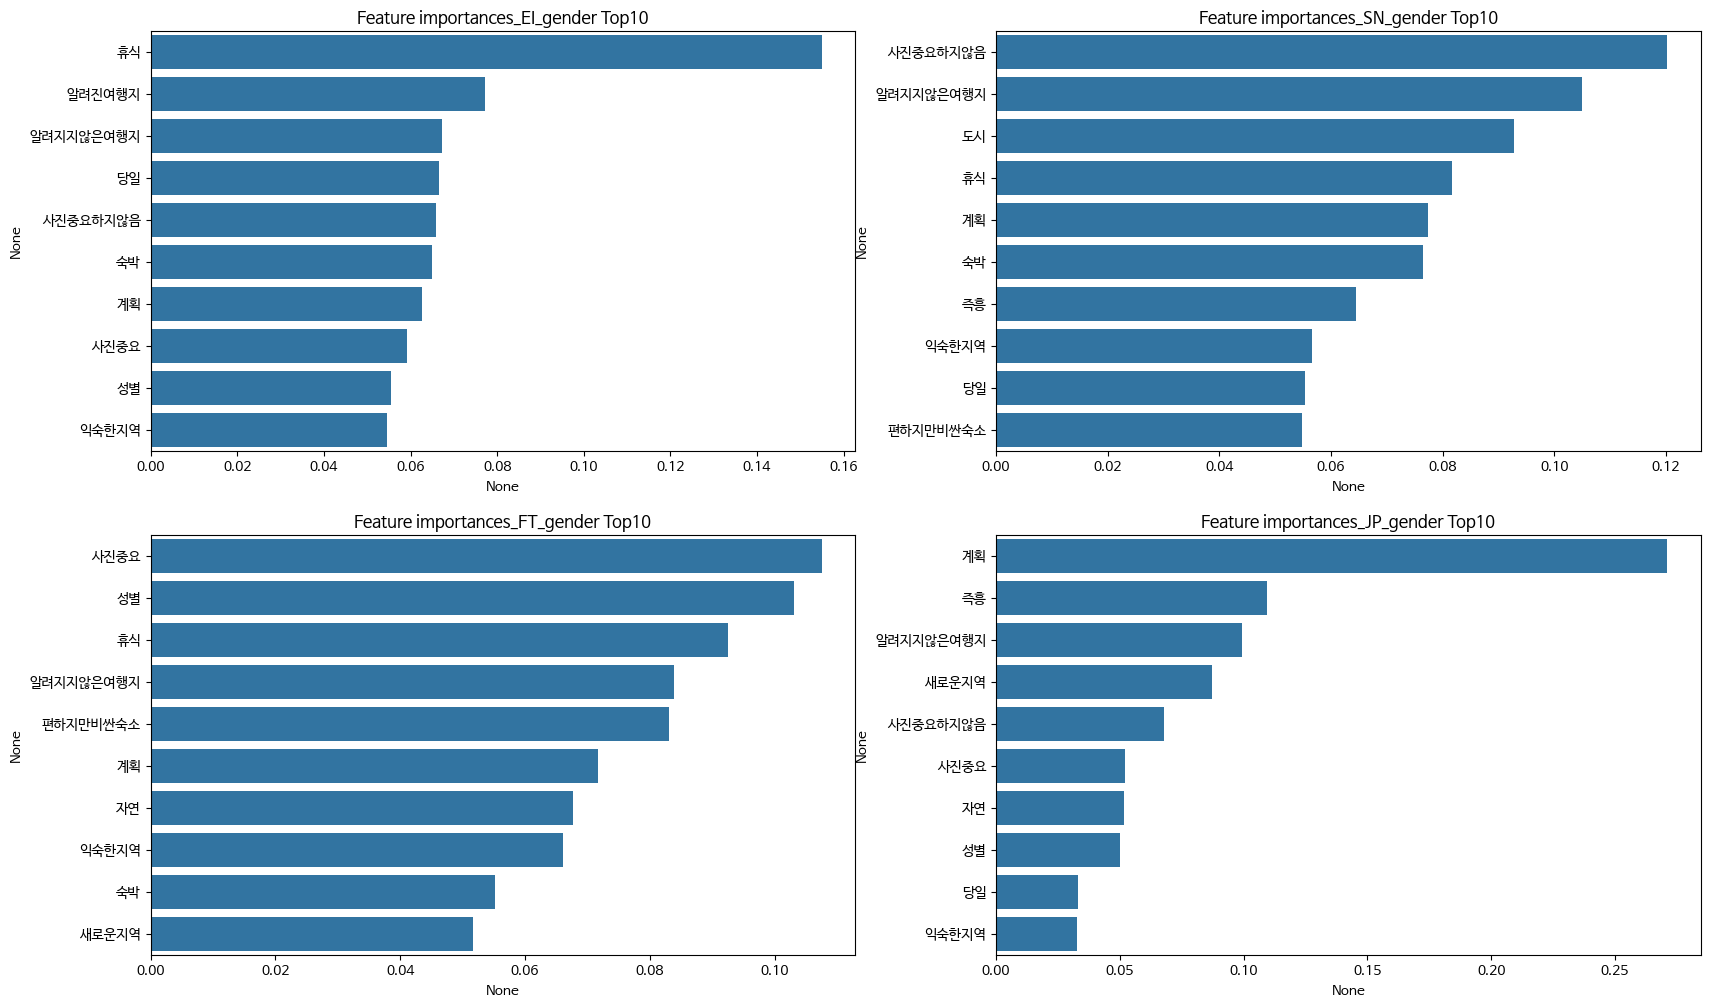

EI정확도 : 0.6206896551724138
SN정확도 : 0.5172413793103449
FT정확도 : 0.4827586206896552
JP정확도 : 0.7241379310344828


In [74]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_gender Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_gender Top10')
sns.barplot(x=ftr_top10_EI_gender, y=ftr_top10_EI_gender.index)

# 두 번째 그래프: Feature importances_SN_gender Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_gender Top10')
sns.barplot(x=ftr_top10_SN_gender, y=ftr_top10_SN_gender.index)

# 세 번째 그래프: Feature importances_FT_gender Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_gender Top10')
sns.barplot(x=ftr_top10_FT_gender, y=ftr_top10_FT_gender.index)

# 네 번째 그래프: Feature importances_JP_gender Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_gender Top10')
sns.barplot(x=ftr_top10_JP_gender, y=ftr_top10_JP_gender.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_gender}')
print(f'SN정확도 : {accuracy_SN_gender}')
print(f'FT정확도 : {accuracy_FT_gender}')
print(f'JP정확도 : {accuracy_JP_gender}')

## MBIT 요소별로 예측(성별 X, 동기 O)

### 정확도 및 feature importances

In [75]:
# E/I
gb_clf_EI_motivation = GradientBoostingClassifier(random_state=0)
gb_clf_EI_motivation.fit(X_train_EI_motivation, y_train_EI_motivation)
pred_EI_motivation = gb_clf_EI_motivation.predict(X_test_EI_motivation)
accuracy_EI_motivation = accuracy_score(y_test_EI_motivation, pred_EI_motivation)

ftr_importance_values_EI_motivation = gb_clf_EI_motivation.feature_importances_
ftr_importances_EI_motivation = pd.Series(ftr_importance_values_EI_motivation, index=X_train_EI_motivation.columns)
ftr_top10_EI_motivation = ftr_importances_EI_motivation.sort_values(ascending=False)[:10]

In [76]:
# S/N
gb_clf_SN_motivation = GradientBoostingClassifier(random_state=0)
gb_clf_SN_motivation.fit(X_train_SN_motivation, y_train_SN_motivation)
pred_SN_motivation = gb_clf_SN_motivation.predict(X_test_SN_motivation)
accuracy_SN_motivation = accuracy_score(y_test_SN_motivation, pred_SN_motivation)

ftr_importance_values_SN_motivation = gb_clf_SN_motivation.feature_importances_
ftr_importances_SN_motivation = pd.Series(ftr_importance_values_SN_motivation, index=X_train_SN_motivation.columns)
ftr_top10_SN_motivation = ftr_importances_SN_motivation.sort_values(ascending=False)[:10]

In [77]:
# F/T
gb_clf_FT_motivation = GradientBoostingClassifier(random_state=0)
gb_clf_FT_motivation.fit(X_train_FT_motivation, y_train_FT_motivation)
pred_FT_motivation = gb_clf_FT_motivation.predict(X_test_FT_motivation)
accuracy_FT_motivation = accuracy_score(y_test_FT_motivation, pred_FT_motivation)

ftr_importance_values_FT_motivation = gb_clf_FT_motivation.feature_importances_
ftr_importances_FT_motivation = pd.Series(ftr_importance_values_FT_motivation, index=X_train_FT_motivation.columns)
ftr_top10_FT_motivation = ftr_importances_FT_motivation.sort_values(ascending=False)[:10]

In [78]:
# J/P
gb_clf_JP_motivation = GradientBoostingClassifier(random_state=0)
gb_clf_JP_motivation.fit(X_train_JP_motivation, y_train_JP_motivation)
pred_JP_motivation = gb_clf_JP_motivation.predict(X_test_JP_motivation)
accuracy_JP_motivation = accuracy_score(y_test_JP_motivation, pred_JP_motivation)

ftr_importance_values_JP_motivation = gb_clf_JP_motivation.feature_importances_
ftr_importances_JP_motivation = pd.Series(ftr_importance_values_JP_motivation, index=X_train_JP_motivation.columns)
ftr_top10_JP_motivation = ftr_importances_JP_motivation.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

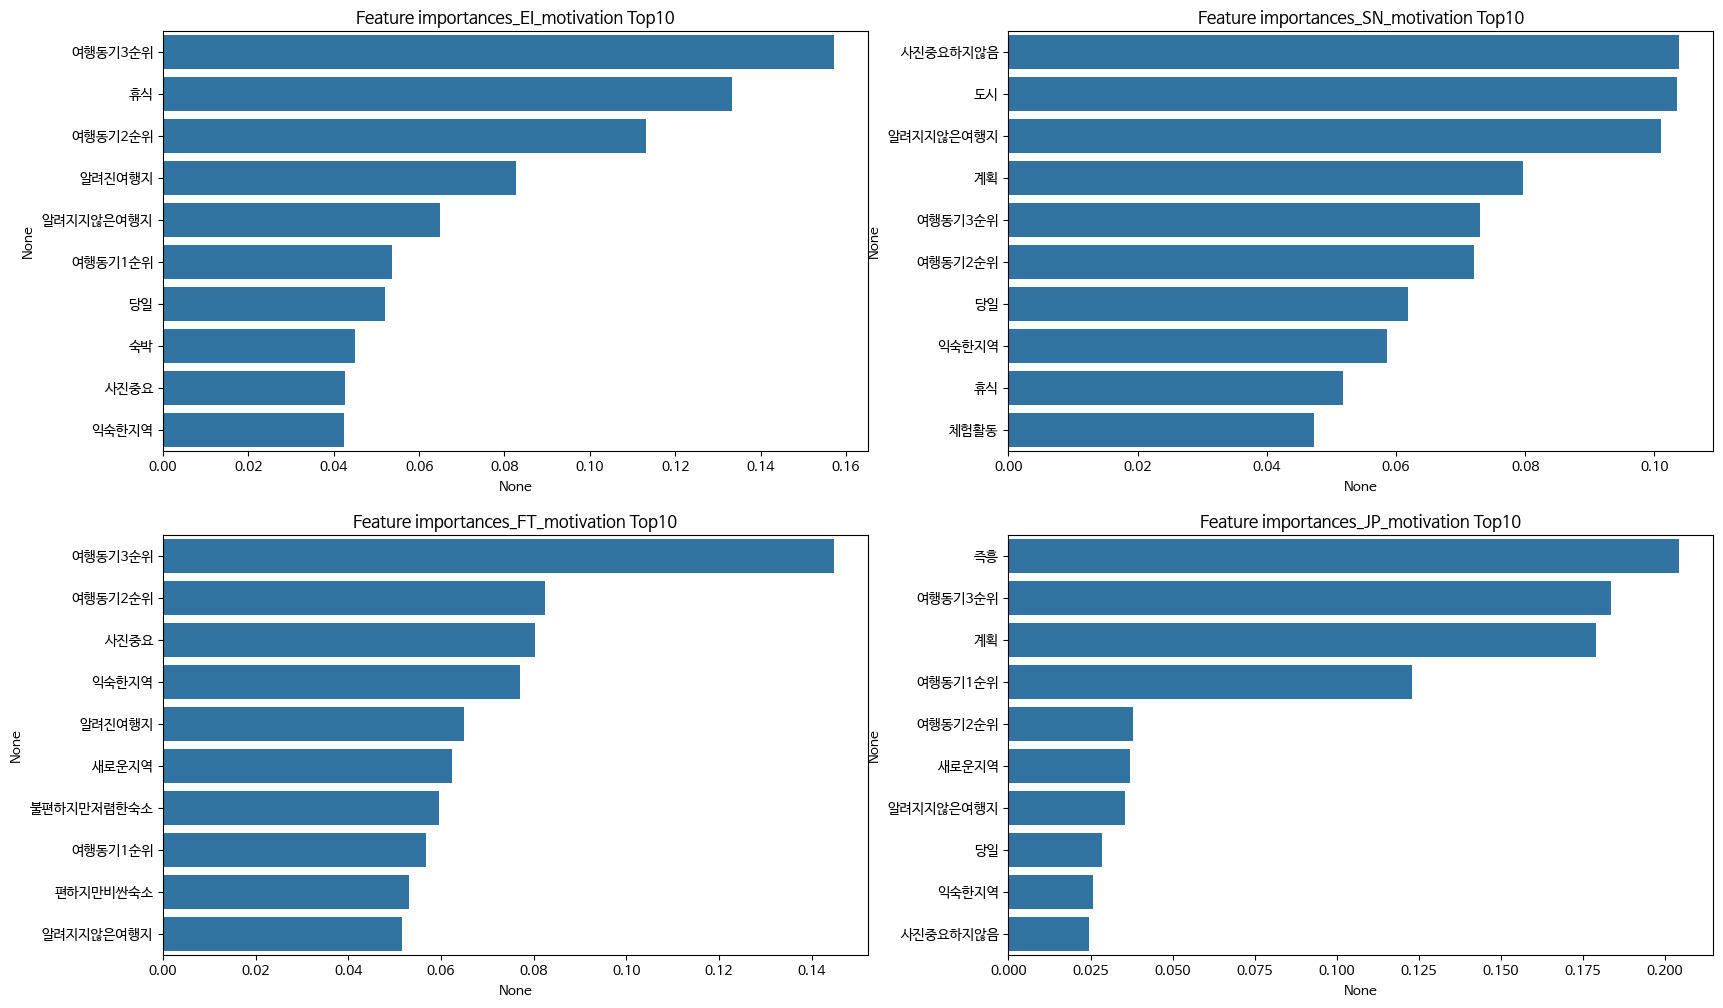

EI정확도 : 0.5862068965517241
SN정확도 : 0.4827586206896552
FT정확도 : 0.5172413793103449
JP정확도 : 0.7241379310344828


In [79]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_motivation Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_motivation Top10')
sns.barplot(x=ftr_top10_EI_motivation, y=ftr_top10_EI_motivation.index)

# 두 번째 그래프: Feature importances_SN_motivation Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_motivation Top10')
sns.barplot(x=ftr_top10_SN_motivation, y=ftr_top10_SN_motivation.index)

# 세 번째 그래프: Feature importances_FT_motivation Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_motivation Top10')
sns.barplot(x=ftr_top10_FT_motivation, y=ftr_top10_FT_motivation.index)

# 네 번째 그래프: Feature importances_JP_motivation Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_motivation Top10')
sns.barplot(x=ftr_top10_JP_motivation, y=ftr_top10_JP_motivation.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_motivation}')
print(f'SN정확도 : {accuracy_SN_motivation}')
print(f'FT정확도 : {accuracy_FT_motivation}')
print(f'JP정확도 : {accuracy_JP_motivation}')

## MBIT 요소별로 예측(성별 O, 동기 O)

### 정확도 및 feature importances

In [80]:
# E/I
gb_clf_EI_all = GradientBoostingClassifier(random_state=0)
gb_clf_EI_all.fit(X_train_EI_all, y_train_EI_all)
pred_EI_all = gb_clf_EI_all.predict(X_test_EI_all)
accuracy_EI_all = accuracy_score(y_test_EI_all, pred_EI_all)

ftr_importance_values_EI_all = gb_clf_EI_all.feature_importances_
ftr_importances_EI_all = pd.Series(ftr_importance_values_EI_all, index=X_train_EI_all.columns)
ftr_top10_EI_all = ftr_importances_EI_all.sort_values(ascending=False)[:10]

In [81]:
# S/N
gb_clf_SN_all = GradientBoostingClassifier(random_state=0)
gb_clf_SN_all.fit(X_train_SN_all, y_train_SN_all)
pred_SN_all = gb_clf_SN_all.predict(X_test_SN_all)
accuracy_SN_all = accuracy_score(y_test_SN_all, pred_SN_all)

ftr_importance_values_SN_all = gb_clf_SN_all.feature_importances_
ftr_importances_SN_all = pd.Series(ftr_importance_values_SN_all, index=X_train_SN_all.columns)
ftr_top10_SN_all = ftr_importances_SN_all.sort_values(ascending=False)[:10]

In [82]:
# F/T
gb_clf_FT_all = GradientBoostingClassifier(random_state=0)
gb_clf_FT_all.fit(X_train_FT_all, y_train_FT_all)
pred_FT_all = gb_clf_FT_all.predict(X_test_FT_all)
accuracy_FT_all = accuracy_score(y_test_FT_all, pred_FT_all)

ftr_importance_values_FT_all = gb_clf_FT_all.feature_importances_
ftr_importances_FT_all = pd.Series(ftr_importance_values_FT_all, index=X_train_FT_all.columns)
ftr_top10_FT_all = ftr_importances_FT_all.sort_values(ascending=False)[:10]

In [83]:
# J/P
gb_clf_JP_all = GradientBoostingClassifier(random_state=0)
gb_clf_JP_all.fit(X_train_JP_all, y_train_JP_all)
pred_JP_all = gb_clf_JP_all.predict(X_test_JP_all)
accuracy_JP_all = accuracy_score(y_test_JP_all, pred_JP_all)

ftr_importance_values_JP_all = gb_clf_JP_all.feature_importances_
ftr_importances_JP_all = pd.Series(ftr_importance_values_JP_all, index=X_train_JP_all.columns)
ftr_top10_JP_all = ftr_importances_JP_all.sort_values(ascending=False)[:10]

### 정확도 및 feature importance 출력

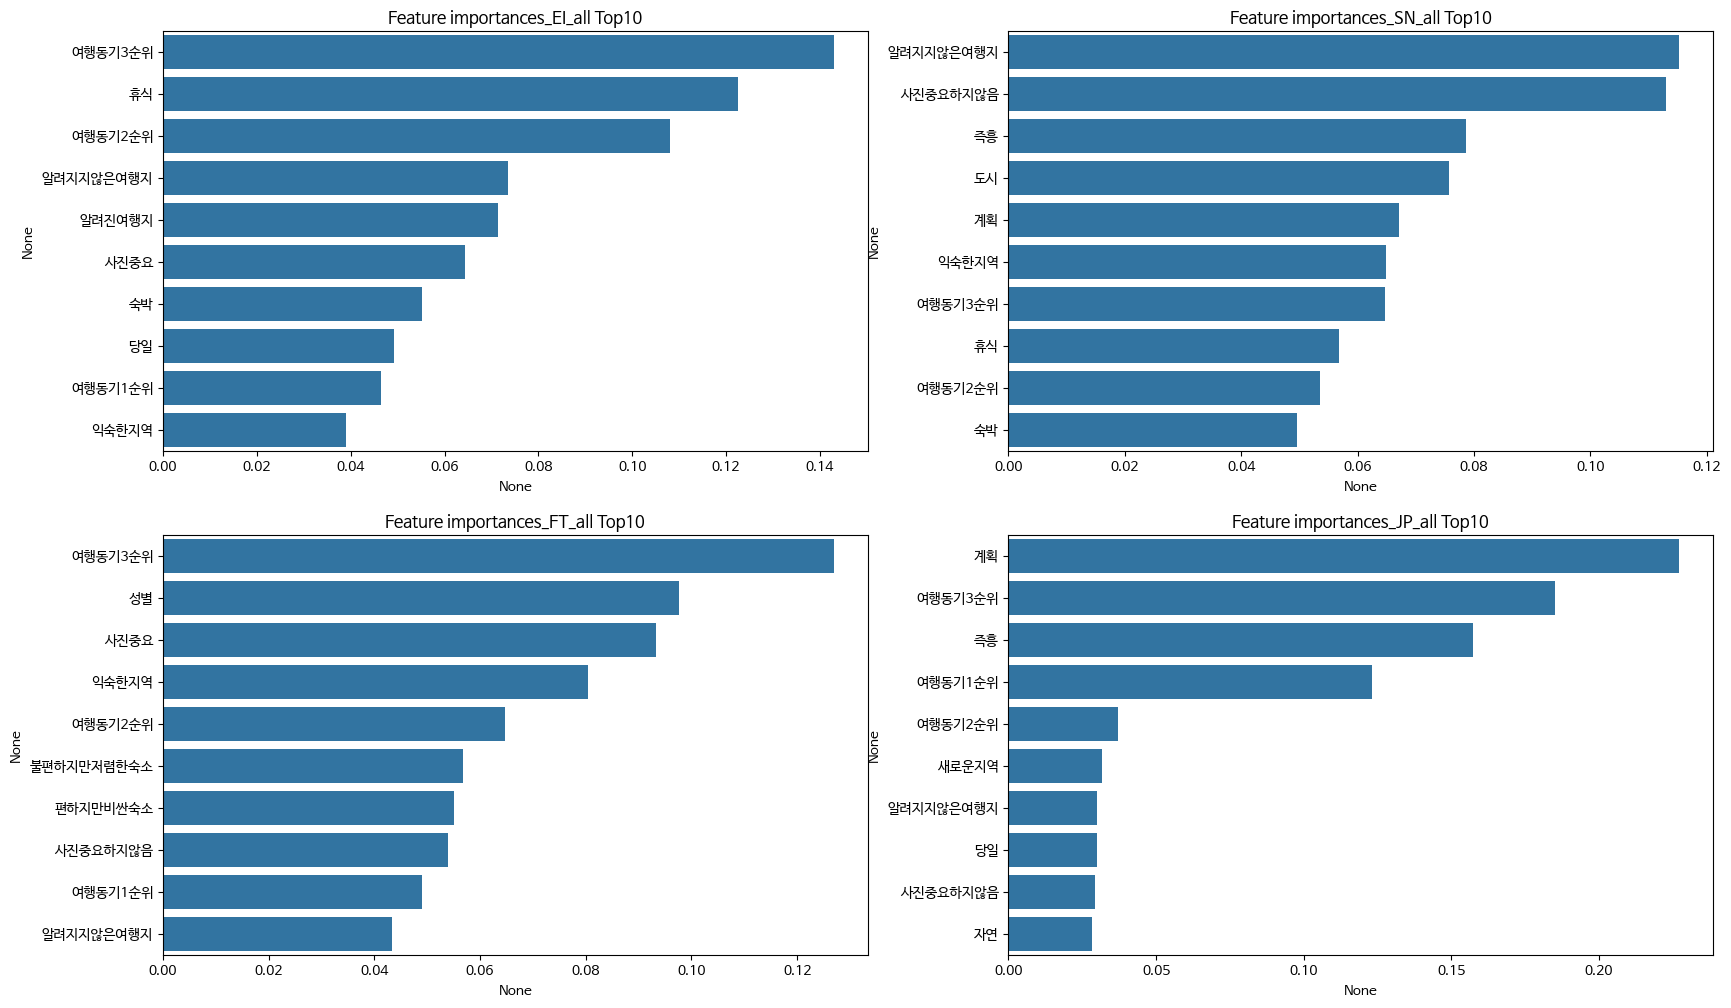

EI정확도 : 0.5862068965517241
SN정확도 : 0.4827586206896552
FT정확도 : 0.5172413793103449
JP정확도 : 0.6896551724137931


In [84]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_all Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_all Top10')
sns.barplot(x=ftr_top10_EI_all, y=ftr_top10_EI_all.index)

# 두 번째 그래프: Feature importances_SN_all Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_all Top10')
sns.barplot(x=ftr_top10_SN_all, y=ftr_top10_SN_all.index)

# 세 번째 그래프: Feature importances_FT_all Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_all Top10')
sns.barplot(x=ftr_top10_FT_all, y=ftr_top10_FT_all.index)

# 네 번째 그래프: Feature importances_JP_all Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_all Top10')
sns.barplot(x=ftr_top10_JP_all, y=ftr_top10_JP_all.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_all}')
print(f'SN정확도 : {accuracy_SN_all}')
print(f'FT정확도 : {accuracy_FT_all}')
print(f'JP정확도 : {accuracy_JP_all}')

## final append

In [85]:
final.loc['GBM_성별X동기X'] = [accuracy_EI, accuracy_SN, accuracy_FT, accuracy_JP]
final.loc['GBM_성별O동기X'] = [accuracy_EI_gender, accuracy_SN_gender, accuracy_FT_gender, accuracy_JP_gender]
final.loc['GBM_성별X동기O'] = [accuracy_EI_motivation, accuracy_SN_motivation, accuracy_FT_motivation, accuracy_JP_motivation]
final.loc['GBM_성별O동기O'] = [accuracy_EI_all, accuracy_SN_all, accuracy_FT_all, accuracy_JP_all]

# MBTI 예측모델(LightGBM)

## MBTI 전체

In [86]:
lgbm_wrapper = LGBMClassifier(random_state=0)
lgbm_wrapper.fit(X_train, y_train)
pred = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 15
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -2.320604
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -3.332205
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -4.025352
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -4.718499
[LightGBM] [Info] Start training from score -3.619887
[Li

## MBIT 요소별로 예측(성별 X, 동기 X)

### 정확도 및 feature importances

In [87]:
# E/I
lgbm_wrapper_EI = LGBMClassifier(random_state=0)
lgbm_wrapper_EI.fit(X_train_EI, y_train_EI)
pred_EI = lgbm_wrapper_EI.predict(X_test_EI)
accuracy_EI = accuracy_score(y_test_EI, pred_EI)

ftr_importance_values_EI = lgbm_wrapper_EI.feature_importances_
ftr_importances_EI = pd.Series(ftr_importance_values_EI, index=X_train_EI.columns)
ftr_top10_EI = ftr_importances_EI.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 63, number of negative: 49
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562500 -> initscore=0.251314
[LightGBM] [Info] Start training from score 0.251314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [88]:
# S/N
lgbm_wrapper_SN = LGBMClassifier(random_state=0)
lgbm_wrapper_SN.fit(X_train_SN, y_train_SN)
pred_SN = lgbm_wrapper_SN.predict(X_test_SN)
accuracy_SN = accuracy_score(y_test_SN, pred_SN)

ftr_importance_values_SN = lgbm_wrapper_SN.feature_importances_
ftr_importances_SN = pd.Series(ftr_importance_values_SN, index=X_train_SN.columns)
ftr_top10_SN = ftr_importances_SN.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 56, number of negative: 56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [89]:
# F/T
lgbm_wrapper_FT = LGBMClassifier(random_state=0)
lgbm_wrapper_FT.fit(X_train_FT, y_train_FT)
pred_FT = lgbm_wrapper_FT.predict(X_test_FT)
accuracy_FT = accuracy_score(y_test_FT, pred_FT)

ftr_importance_values_FT = lgbm_wrapper_FT.feature_importances_
ftr_importances_FT = pd.Series(ftr_importance_values_FT, index=X_train_FT.columns)
ftr_top10_FT = ftr_importances_FT.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 40, number of negative: 72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357143 -> initscore=-0.587787
[LightGBM] [Info] Start training from score -0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [90]:
# J/P
lgbm_wrapper_JP = LGBMClassifier(random_state=0)
lgbm_wrapper_JP.fit(X_train_JP, y_train_JP)
pred_JP = lgbm_wrapper_JP.predict(X_test_JP)
accuracy_JP = accuracy_score(y_test_JP, pred_JP)

ftr_importance_values_JP = lgbm_wrapper_JP.feature_importances_
ftr_importances_JP = pd.Series(ftr_importance_values_JP, index=X_train_JP.columns)
ftr_top10_JP = ftr_importances_JP.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 60, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535714 -> initscore=0.143101
[LightGBM] [Info] Start training from score 0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### 정확도 및 feature importance 출력

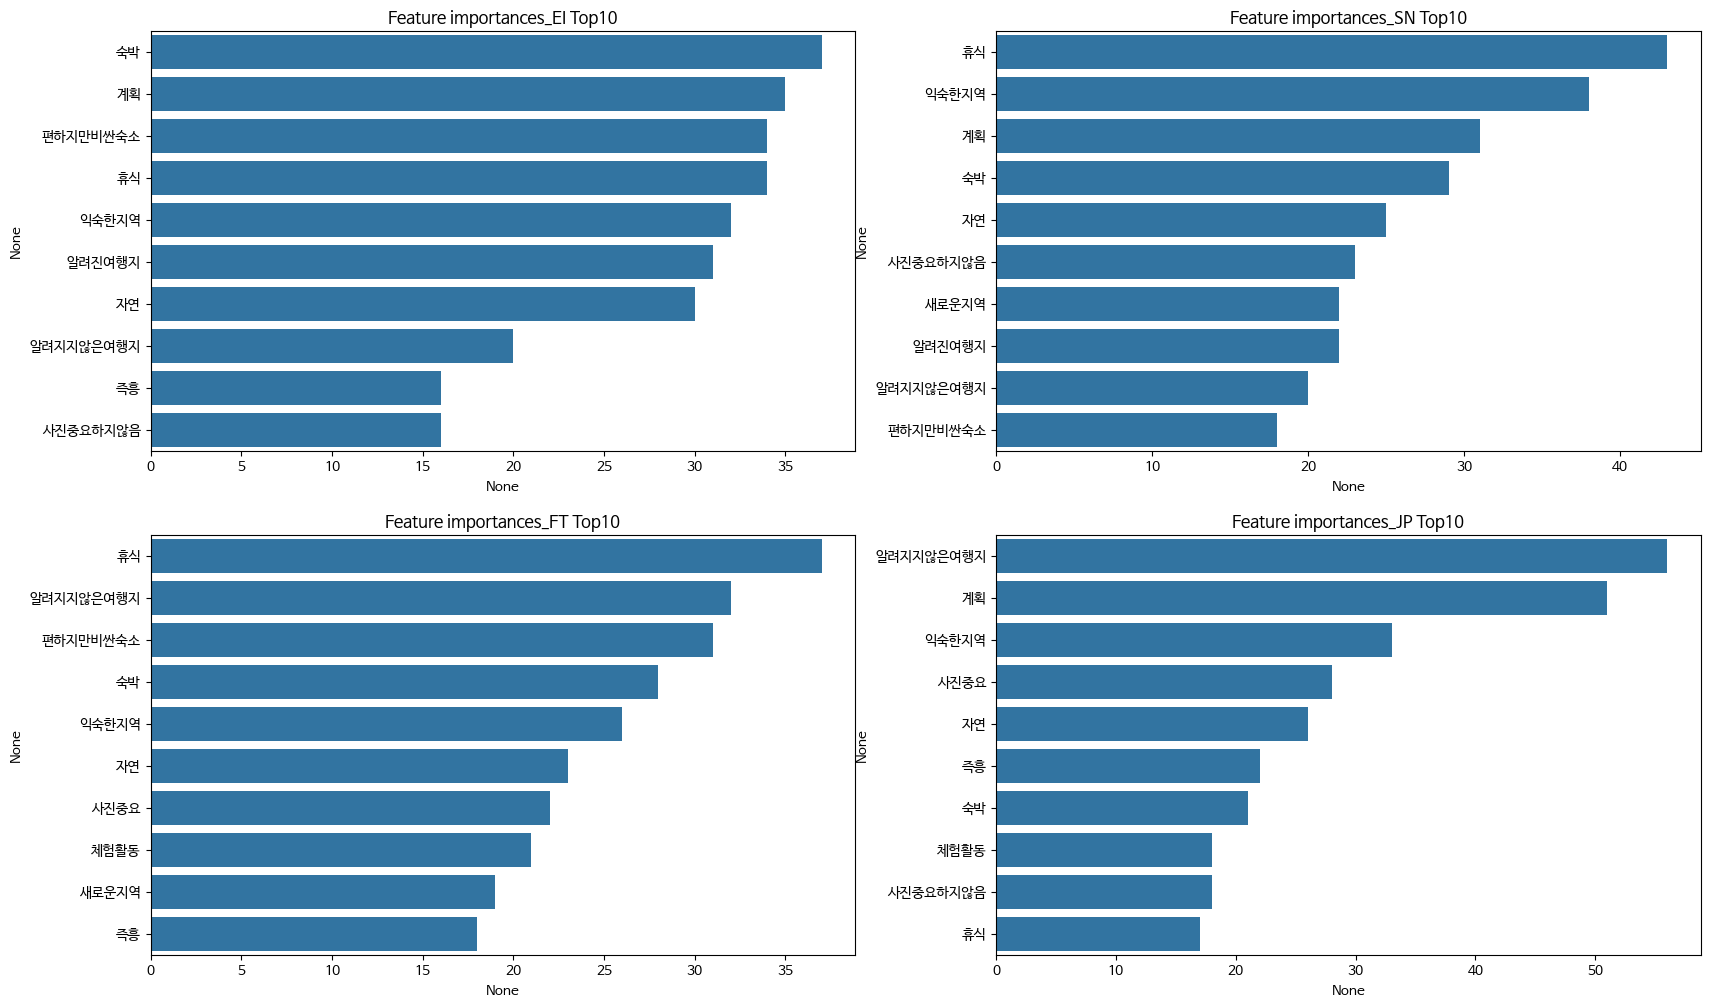

EI정확도 : 0.4827586206896552
SN정확도 : 0.6551724137931034
FT정확도 : 0.5517241379310345
JP정확도 : 0.7931034482758621


In [91]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI Top10')
sns.barplot(x=ftr_top10_EI, y=ftr_top10_EI.index)

# 두 번째 그래프: Feature importances_SN Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN Top10')
sns.barplot(x=ftr_top10_SN, y=ftr_top10_SN.index)

# 세 번째 그래프: Feature importances_FT Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT Top10')
sns.barplot(x=ftr_top10_FT, y=ftr_top10_FT.index)

# 네 번째 그래프: Feature importances_JP Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP Top10')
sns.barplot(x=ftr_top10_JP, y=ftr_top10_JP.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI}')
print(f'SN정확도 : {accuracy_SN}')
print(f'FT정확도 : {accuracy_FT}')
print(f'JP정확도 : {accuracy_JP}')

## MBIT 요소별로 예측(성별 O, 동기 X)

### 정확도 및 feature importances

In [92]:
# E/I
lgbm_wrapper_EI_gender = LGBMClassifier(random_state=0)
lgbm_wrapper_EI_gender.fit(X_train_EI_gender, y_train_EI_gender)
pred_EI_gender = lgbm_wrapper_EI_gender.predict(X_test_EI_gender)
accuracy_EI_gender = accuracy_score(y_test_EI_gender, pred_EI_gender)

ftr_importance_values_EI_gender = lgbm_wrapper_EI_gender.feature_importances_
ftr_importances_EI_gender = pd.Series(ftr_importance_values_EI_gender, index=X_train_EI_gender.columns)
ftr_top10_EI_gender = ftr_importances_EI_gender.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 63, number of negative: 49
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562500 -> initscore=0.251314
[LightGBM] [Info] Start training from score 0.251314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [93]:
# S/N
lgbm_wrapper_SN_gender = LGBMClassifier(random_state=0)
lgbm_wrapper_SN_gender.fit(X_train_SN_gender, y_train_SN_gender)
pred_SN_gender = lgbm_wrapper_SN_gender.predict(X_test_SN_gender)
accuracy_SN_gender = accuracy_score(y_test_SN_gender, pred_SN_gender)

ftr_importance_values_SN_gender = lgbm_wrapper_SN_gender.feature_importances_
ftr_importances_SN_gender = pd.Series(ftr_importance_values_SN_gender, index=X_train_SN_gender.columns)
ftr_top10_SN_gender = ftr_importances_SN_gender.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 56, number of negative: 56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [94]:
# F/T
lgbm_wrapper_FT_gender = LGBMClassifier(random_state=0)
lgbm_wrapper_FT_gender.fit(X_train_FT_gender, y_train_FT_gender)
pred_FT_gender = lgbm_wrapper_FT_gender.predict(X_test_FT_gender)
accuracy_FT_gender = accuracy_score(y_test_FT_gender, pred_FT_gender)

ftr_importance_values_FT_gender = lgbm_wrapper_FT_gender.feature_importances_
ftr_importances_FT_gender = pd.Series(ftr_importance_values_FT_gender, index=X_train_FT_gender.columns)
ftr_top10_FT_gender = ftr_importances_FT_gender.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 40, number of negative: 72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357143 -> initscore=-0.587787
[LightGBM] [Info] Start training from score -0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [95]:
# J/P
lgbm_wrapper_JP_gender = LGBMClassifier(random_state=0)
lgbm_wrapper_JP_gender.fit(X_train_JP_gender, y_train_JP_gender)
pred_JP_gender = lgbm_wrapper_JP_gender.predict(X_test_JP_gender)
accuracy_JP_gender = accuracy_score(y_test_JP_gender, pred_JP_gender)

ftr_importance_values_JP_gender = lgbm_wrapper_JP_gender.feature_importances_
ftr_importances_JP_gender = pd.Series(ftr_importance_values_JP_gender, index=X_train_JP_gender.columns)
ftr_top10_JP_gender = ftr_importances_JP_gender.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 60, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535714 -> initscore=0.143101
[LightGBM] [Info] Start training from score 0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### 정확도 및 feature importance 출력

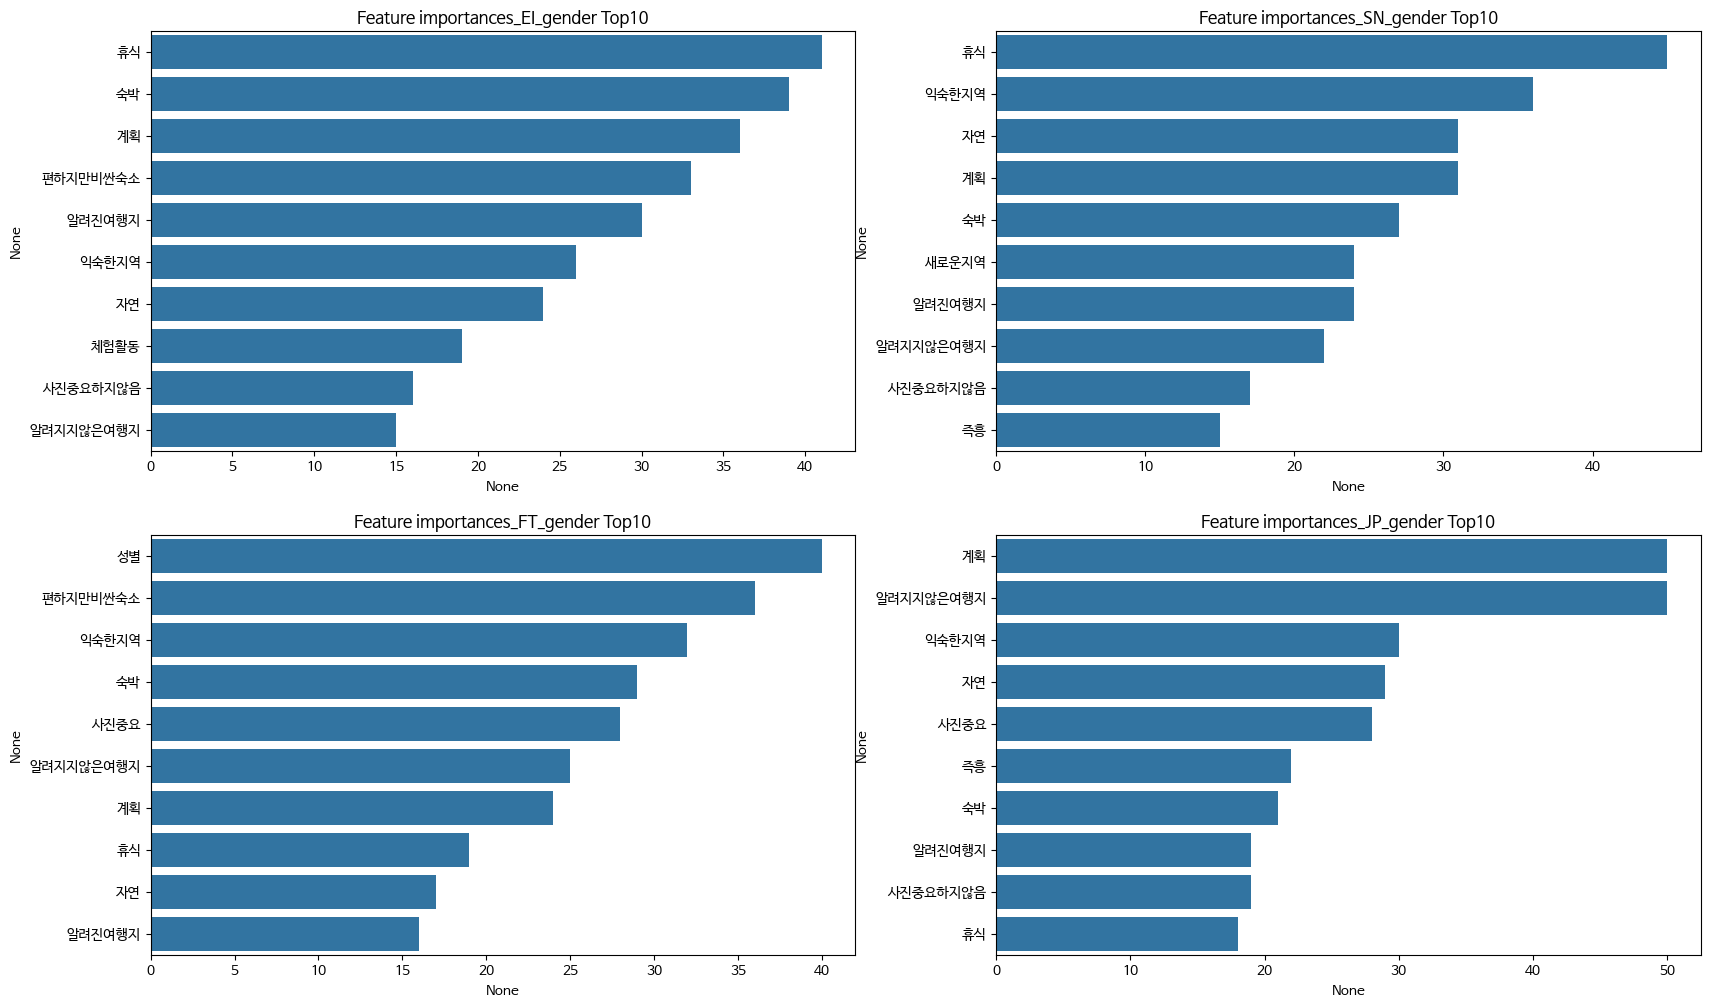

EI정확도 : 0.5172413793103449
SN정확도 : 0.5862068965517241
FT정확도 : 0.4827586206896552
JP정확도 : 0.8275862068965517


In [96]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_gender Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_gender Top10')
sns.barplot(x=ftr_top10_EI_gender, y=ftr_top10_EI_gender.index)

# 두 번째 그래프: Feature importances_SN_gender Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_gender Top10')
sns.barplot(x=ftr_top10_SN_gender, y=ftr_top10_SN_gender.index)

# 세 번째 그래프: Feature importances_FT_gender Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_gender Top10')
sns.barplot(x=ftr_top10_FT_gender, y=ftr_top10_FT_gender.index)

# 네 번째 그래프: Feature importances_JP_gender Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_gender Top10')
sns.barplot(x=ftr_top10_JP_gender, y=ftr_top10_JP_gender.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_gender}')
print(f'SN정확도 : {accuracy_SN_gender}')
print(f'FT정확도 : {accuracy_FT_gender}')
print(f'JP정확도 : {accuracy_JP_gender}')

## MBIT 요소별로 예측(성별 X, 동기 O)

### 정확도 및 feature importances

In [97]:
# E/I
lgbm_wrapper_EI_motivation = LGBMClassifier(random_state=0)
lgbm_wrapper_EI_motivation.fit(X_train_EI_motivation, y_train_EI_motivation)
pred_EI_motivation = lgbm_wrapper_EI_motivation.predict(X_test_EI_motivation)
accuracy_EI_motivation = accuracy_score(y_test_EI_motivation, pred_EI_motivation)

ftr_importance_values_EI_motivation = lgbm_wrapper_EI_motivation.feature_importances_
ftr_importances_EI_motivation = pd.Series(ftr_importance_values_EI_motivation, index=X_train_EI_motivation.columns)
ftr_top10_EI_motivation = ftr_importances_EI_motivation.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 63, number of negative: 49
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562500 -> initscore=0.251314
[LightGBM] [Info] Start training from score 0.251314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [98]:
# S/N
lgbm_wrapper_SN_motivation = LGBMClassifier(random_state=0)
lgbm_wrapper_SN_motivation.fit(X_train_SN_motivation, y_train_SN_motivation)
pred_SN_motivation = lgbm_wrapper_SN_motivation.predict(X_test_SN_motivation)
accuracy_SN_motivation = accuracy_score(y_test_SN_motivation, pred_SN_motivation)

ftr_importance_values_SN_motivation = lgbm_wrapper_SN_motivation.feature_importances_
ftr_importances_SN_motivation = pd.Series(ftr_importance_values_SN_motivation, index=X_train_SN_motivation.columns)
ftr_top10_SN_motivation = ftr_importances_SN_motivation.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 56, number of negative: 56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [99]:
# F/T
lgbm_wrapper_FT_motivation = LGBMClassifier(random_state=0)
lgbm_wrapper_FT_motivation.fit(X_train_FT_motivation, y_train_FT_motivation)
pred_FT_motivation = lgbm_wrapper_FT_motivation.predict(X_test_FT_motivation)
accuracy_FT_motivation = accuracy_score(y_test_FT_motivation, pred_FT_motivation)

ftr_importance_values_FT_motivation = lgbm_wrapper_FT_motivation.feature_importances_
ftr_importances_FT_motivation = pd.Series(ftr_importance_values_FT_motivation, index=X_train_FT_motivation.columns)
ftr_top10_FT_motivation = ftr_importances_FT_motivation.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 40, number of negative: 72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357143 -> initscore=-0.587787
[LightGBM] [Info] Start training from score -0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [100]:
# J/P
lgbm_wrapper_JP_motivation = LGBMClassifier(random_state=0)
lgbm_wrapper_JP_motivation.fit(X_train_JP_motivation, y_train_JP_motivation)
pred_JP_motivation = lgbm_wrapper_JP_motivation.predict(X_test_JP_motivation)
accuracy_JP_motivation = accuracy_score(y_test_JP_motivation, pred_JP_motivation)

ftr_importance_values_JP_motivation = lgbm_wrapper_JP_motivation.feature_importances_
ftr_importances_JP_motivation = pd.Series(ftr_importance_values_JP_motivation, index=X_train_JP_motivation.columns)
ftr_top10_JP_motivation = ftr_importances_JP_motivation.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 60, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535714 -> initscore=0.143101
[LightGBM] [Info] Start training from score 0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### 정확도 및 feature importance 출력

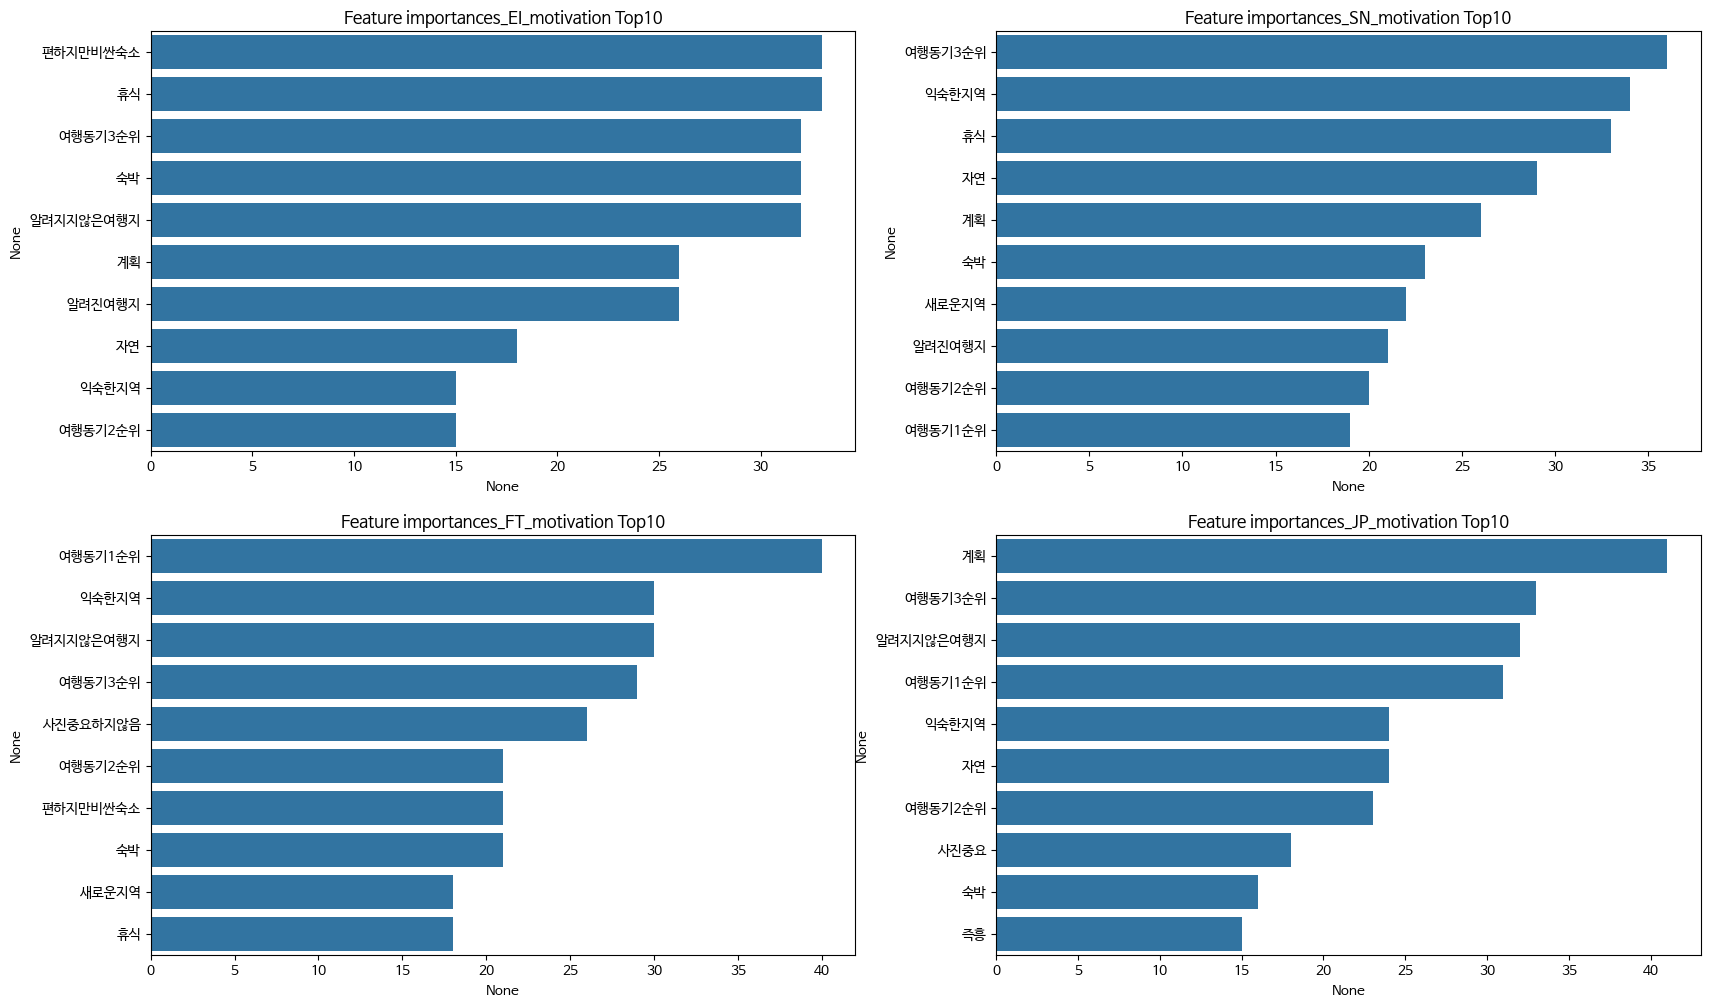

EI정확도 : 0.6896551724137931
SN정확도 : 0.6206896551724138
FT정확도 : 0.4827586206896552
JP정확도 : 0.7586206896551724


In [101]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_motivation Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_motivation Top10')
sns.barplot(x=ftr_top10_EI_motivation, y=ftr_top10_EI_motivation.index)

# 두 번째 그래프: Feature importances_SN_motivation Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_motivation Top10')
sns.barplot(x=ftr_top10_SN_motivation, y=ftr_top10_SN_motivation.index)

# 세 번째 그래프: Feature importances_FT_motivation Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_motivation Top10')
sns.barplot(x=ftr_top10_FT_motivation, y=ftr_top10_FT_motivation.index)

# 네 번째 그래프: Feature importances_JP_motivation Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_motivation Top10')
sns.barplot(x=ftr_top10_JP_motivation, y=ftr_top10_JP_motivation.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_motivation}')
print(f'SN정확도 : {accuracy_SN_motivation}')
print(f'FT정확도 : {accuracy_FT_motivation}')
print(f'JP정확도 : {accuracy_JP_motivation}')

## MBIT 요소별로 예측(성별 O, 동기 O)

### 정확도 및 feature importances

In [102]:
# E/I
lgbm_wrapper_EI_all = LGBMClassifier(random_state=0)
lgbm_wrapper_EI_all.fit(X_train_EI_all, y_train_EI_all)
pred_EI_all = lgbm_wrapper_EI_all.predict(X_test_EI_all)
accuracy_EI_all = accuracy_score(y_test_EI_all, pred_EI_all)

ftr_importance_values_EI_all = lgbm_wrapper_EI_all.feature_importances_
ftr_importances_EI_all = pd.Series(ftr_importance_values_EI_all, index=X_train_EI_all.columns)
ftr_top10_EI_all = ftr_importances_EI_all.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 63, number of negative: 49
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562500 -> initscore=0.251314
[LightGBM] [Info] Start training from score 0.251314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [103]:
# S/N
lgbm_wrapper_SN_all = LGBMClassifier(random_state=0)
lgbm_wrapper_SN_all.fit(X_train_SN_all, y_train_SN_all)
pred_SN_all = lgbm_wrapper_SN_all.predict(X_test_SN_all)
accuracy_SN_all = accuracy_score(y_test_SN_all, pred_SN_all)

ftr_importance_values_SN_all = lgbm_wrapper_SN_all.feature_importances_
ftr_importances_SN_all = pd.Series(ftr_importance_values_SN_all, index=X_train_SN_all.columns)
ftr_top10_SN_all = ftr_importances_SN_all.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 56, number of negative: 56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [104]:
# F/T
lgbm_wrapper_FT_all = LGBMClassifier(random_state=0)
lgbm_wrapper_FT_all.fit(X_train_FT_all, y_train_FT_all)
pred_FT_all = lgbm_wrapper_FT_all.predict(X_test_FT_all)
accuracy_FT_all = accuracy_score(y_test_FT_all, pred_FT_all)

ftr_importance_values_FT_all = lgbm_wrapper_FT_all.feature_importances_
ftr_importances_FT_all = pd.Series(ftr_importance_values_FT_all, index=X_train_FT_all.columns)
ftr_top10_FT_all = ftr_importances_FT_all.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 40, number of negative: 72
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357143 -> initscore=-0.587787
[LightGBM] [Info] Start training from score -0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [105]:
# J/P
lgbm_wrapper_JP_all = LGBMClassifier(random_state=0)
lgbm_wrapper_JP_all.fit(X_train_JP_all, y_train_JP_all)
pred_JP_all = lgbm_wrapper_JP_all.predict(X_test_JP_all)
accuracy_JP_all = accuracy_score(y_test_JP_all, pred_JP_all)

ftr_importance_values_JP_all = lgbm_wrapper_JP_all.feature_importances_
ftr_importances_JP_all = pd.Series(ftr_importance_values_JP_all, index=X_train_JP_all.columns)
ftr_top10_JP_all = ftr_importances_JP_all.sort_values(ascending=False)[:10]

[LightGBM] [Info] Number of positive: 60, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535714 -> initscore=0.143101
[LightGBM] [Info] Start training from score 0.143101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### 정확도 및 feature importance 출력

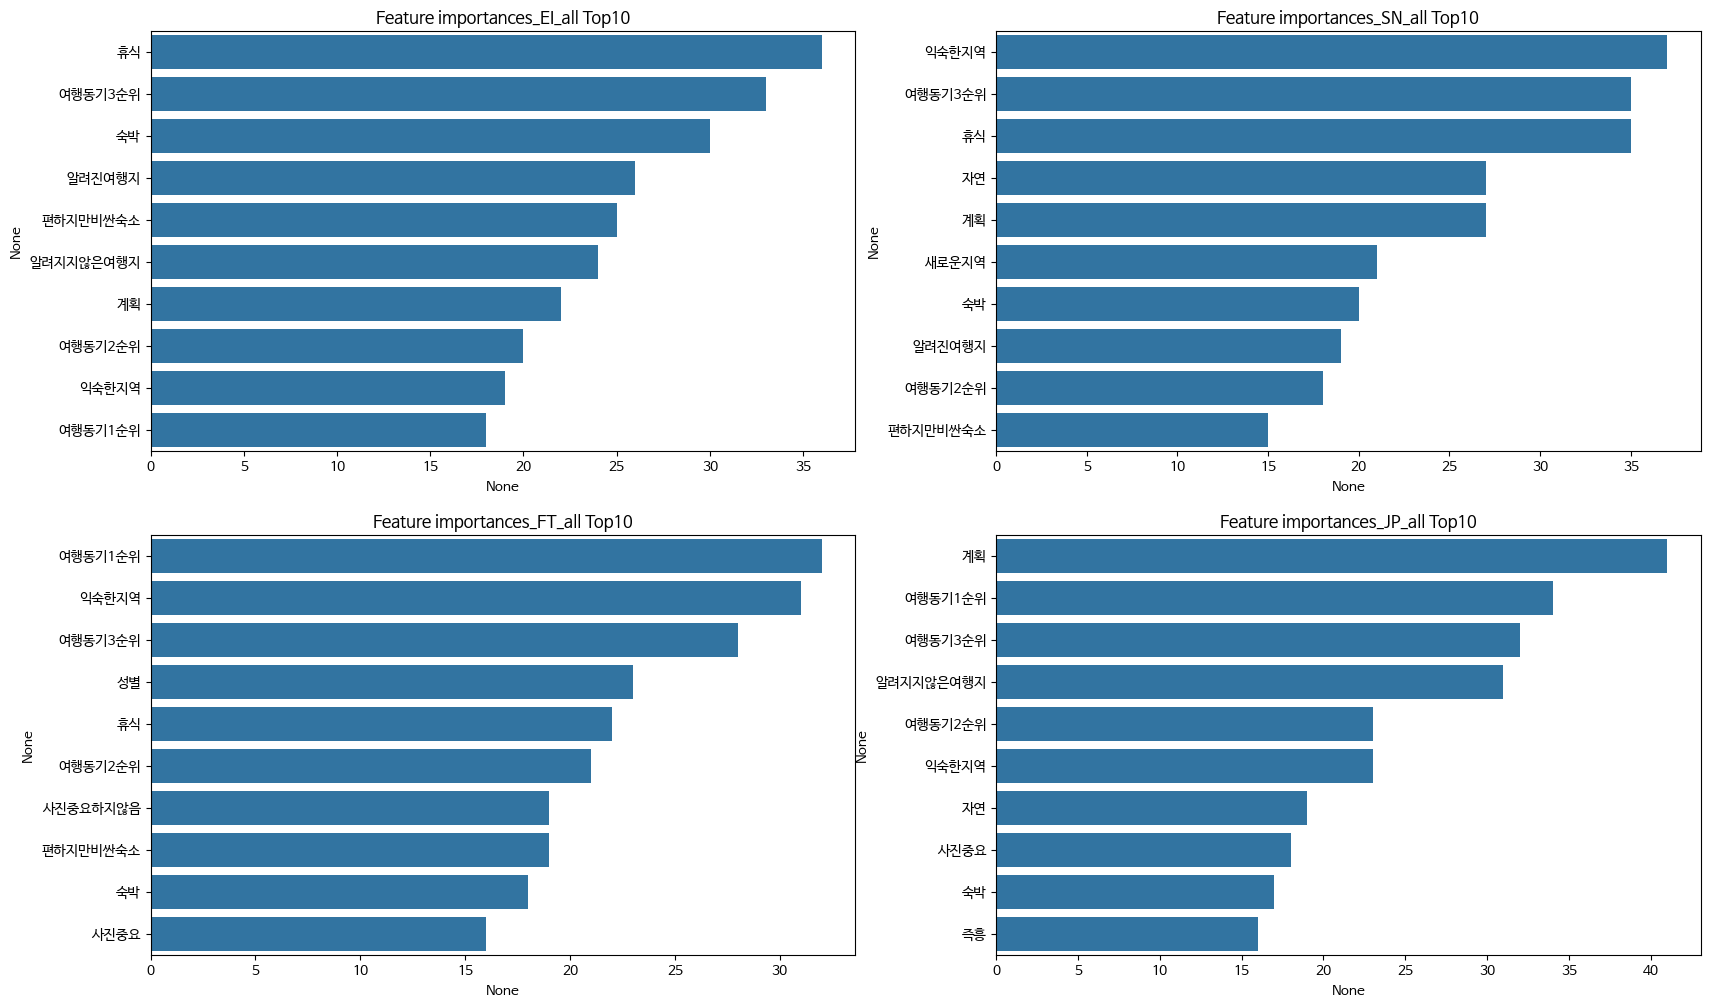

EI정확도 : 0.6896551724137931
SN정확도 : 0.6551724137931034
FT정확도 : 0.4482758620689655
JP정확도 : 0.7241379310344828


In [106]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_all Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_all Top10')
sns.barplot(x=ftr_top10_EI_all, y=ftr_top10_EI_all.index)

# 두 번째 그래프: Feature importances_SN_all Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_all Top10')
sns.barplot(x=ftr_top10_SN_all, y=ftr_top10_SN_all.index)

# 세 번째 그래프: Feature importances_FT_all Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_all Top10')
sns.barplot(x=ftr_top10_FT_all, y=ftr_top10_FT_all.index)

# 네 번째 그래프: Feature importances_JP_all Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_all Top10')
sns.barplot(x=ftr_top10_JP_all, y=ftr_top10_JP_all.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_all}')
print(f'SN정확도 : {accuracy_SN_all}')
print(f'FT정확도 : {accuracy_FT_all}')
print(f'JP정확도 : {accuracy_JP_all}')

## final append

In [107]:
final.loc['LGBM_성별X동기X'] = [accuracy_EI, accuracy_SN, accuracy_FT, accuracy_JP]
final.loc['LGBM_성별O동기X'] = [accuracy_EI_gender, accuracy_SN_gender, accuracy_FT_gender, accuracy_JP_gender]
final.loc['LGBM_성별X동기O'] = [accuracy_EI_motivation, accuracy_SN_motivation, accuracy_FT_motivation, accuracy_JP_motivation]
final.loc['LGBM_성별O동기O'] = [accuracy_EI_all, accuracy_SN_all, accuracy_FT_all, accuracy_JP_all]

# MBTI 예측모델(CB)

## MBTI 전체

In [108]:
cb_clf = CatBoostClassifier(random_state=0)
cb_clf.fit(X_train, y_train)
pred = cb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

Learning rate set to 0.070767
0:	learn: 2.7496322	total: 47.3ms	remaining: 47.3s
1:	learn: 2.7219120	total: 48.2ms	remaining: 24.1s
2:	learn: 2.6967239	total: 49.2ms	remaining: 16.4s
3:	learn: 2.6769560	total: 50.4ms	remaining: 12.6s
4:	learn: 2.6555645	total: 51.5ms	remaining: 10.3s
5:	learn: 2.6314761	total: 52.7ms	remaining: 8.72s
6:	learn: 2.6101718	total: 53.7ms	remaining: 7.62s
7:	learn: 2.5871992	total: 54.9ms	remaining: 6.81s
8:	learn: 2.5647440	total: 56ms	remaining: 6.17s
9:	learn: 2.5448250	total: 57.1ms	remaining: 5.65s
10:	learn: 2.5179943	total: 58.2ms	remaining: 5.23s
11:	learn: 2.4983854	total: 59.4ms	remaining: 4.89s
12:	learn: 2.4806458	total: 60.5ms	remaining: 4.59s
13:	learn: 2.4594145	total: 61.5ms	remaining: 4.33s
14:	learn: 2.4386776	total: 62.6ms	remaining: 4.11s
15:	learn: 2.4165017	total: 63.7ms	remaining: 3.92s
16:	learn: 2.3954297	total: 64.8ms	remaining: 3.75s
17:	learn: 2.3724407	total: 66ms	remaining: 3.6s
18:	learn: 2.3536757	total: 67.1ms	remaining: 3.4

## MBIT 요소별로 예측(성별 X, 동기 X)

### 정확도 및 feature importances

In [109]:
# E/I
cb_clf_EI = CatBoostClassifier(random_state=0)
cb_clf_EI.fit(X_train_EI, y_train_EI)
pred_EI = cb_clf_EI.predict(X_test_EI)
accuracy_EI = accuracy_score(y_test_EI, pred_EI)

ftr_importance_values_EI = cb_clf_EI.feature_importances_
ftr_importances_EI = pd.Series(ftr_importance_values_EI, index=X_train_EI.columns)
ftr_top10_EI = ftr_importances_EI.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6923169	total: 571us	remaining: 571ms
1:	learn: 0.6911397	total: 1.11ms	remaining: 552ms
2:	learn: 0.6903641	total: 1.57ms	remaining: 523ms
3:	learn: 0.6891945	total: 2.12ms	remaining: 527ms
4:	learn: 0.6882149	total: 2.6ms	remaining: 517ms
5:	learn: 0.6868016	total: 3.03ms	remaining: 503ms
6:	learn: 0.6863849	total: 3.39ms	remaining: 481ms
7:	learn: 0.6851481	total: 3.81ms	remaining: 472ms
8:	learn: 0.6837514	total: 4.32ms	remaining: 476ms
9:	learn: 0.6826204	total: 4.76ms	remaining: 471ms
10:	learn: 0.6817093	total: 5.25ms	remaining: 472ms
11:	learn: 0.6804570	total: 5.7ms	remaining: 469ms
12:	learn: 0.6792904	total: 6.19ms	remaining: 470ms
13:	learn: 0.6781348	total: 6.62ms	remaining: 467ms
14:	learn: 0.6765836	total: 7.12ms	remaining: 468ms
15:	learn: 0.6751937	total: 7.56ms	remaining: 465ms
16:	learn: 0.6744039	total: 8.04ms	remaining: 465ms
17:	learn: 0.6733990	total: 8.49ms	remaining: 463ms
18:	learn: 0.6722999	total: 9.03ms	remaining: 4

In [110]:
# S/N
cb_clf_SN = CatBoostClassifier(random_state=0)
cb_clf_SN.fit(X_train_SN, y_train_SN)
pred_SN = cb_clf_SN.predict(X_test_SN)
accuracy_SN = accuracy_score(y_test_SN, pred_SN)

ftr_importance_values_SN = cb_clf_SN.feature_importances_
ftr_importances_SN = pd.Series(ftr_importance_values_SN, index=X_train_SN.columns)
ftr_top10_SN = ftr_importances_SN.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6922422	total: 442us	remaining: 442ms
1:	learn: 0.6907825	total: 1.03ms	remaining: 513ms
2:	learn: 0.6891973	total: 1.58ms	remaining: 526ms
3:	learn: 0.6868203	total: 2.12ms	remaining: 529ms
4:	learn: 0.6863342	total: 2.58ms	remaining: 513ms
5:	learn: 0.6845007	total: 3.12ms	remaining: 517ms
6:	learn: 0.6825769	total: 3.62ms	remaining: 514ms
7:	learn: 0.6811066	total: 4.14ms	remaining: 514ms
8:	learn: 0.6798921	total: 4.63ms	remaining: 510ms
9:	learn: 0.6780879	total: 5.15ms	remaining: 510ms
10:	learn: 0.6768856	total: 5.68ms	remaining: 511ms
11:	learn: 0.6753721	total: 6.22ms	remaining: 512ms
12:	learn: 0.6743832	total: 6.75ms	remaining: 512ms
13:	learn: 0.6732709	total: 7.26ms	remaining: 511ms
14:	learn: 0.6723811	total: 7.79ms	remaining: 512ms
15:	learn: 0.6708355	total: 8.3ms	remaining: 510ms
16:	learn: 0.6696189	total: 8.81ms	remaining: 510ms
17:	learn: 0.6686847	total: 9.34ms	remaining: 510ms
18:	learn: 0.6673130	total: 9.86ms	remaining: 

In [111]:
# F/T
cb_clf_FT = CatBoostClassifier(random_state=0)
cb_clf_FT.fit(X_train_FT, y_train_FT)
pred_FT = cb_clf_FT.predict(X_test_FT)
accuracy_FT = accuracy_score(y_test_FT, pred_FT)

ftr_importance_values_FT = cb_clf_FT.feature_importances_
ftr_importances_FT = pd.Series(ftr_importance_values_FT, index=X_train_FT.columns)
ftr_top10_FT = ftr_importances_FT.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6917223	total: 462us	remaining: 462ms
1:	learn: 0.6903570	total: 1.05ms	remaining: 523ms
2:	learn: 0.6896074	total: 1.9ms	remaining: 632ms
3:	learn: 0.6879877	total: 2.63ms	remaining: 654ms
4:	learn: 0.6863425	total: 3.58ms	remaining: 712ms
5:	learn: 0.6851014	total: 4.12ms	remaining: 683ms
6:	learn: 0.6838999	total: 4.63ms	remaining: 658ms
7:	learn: 0.6829142	total: 5.23ms	remaining: 648ms
8:	learn: 0.6814493	total: 5.75ms	remaining: 634ms
9:	learn: 0.6795653	total: 6.29ms	remaining: 623ms
10:	learn: 0.6783032	total: 6.81ms	remaining: 613ms
11:	learn: 0.6768163	total: 7.31ms	remaining: 602ms
12:	learn: 0.6757894	total: 7.88ms	remaining: 599ms
13:	learn: 0.6748080	total: 8.4ms	remaining: 592ms
14:	learn: 0.6735814	total: 8.93ms	remaining: 586ms
15:	learn: 0.6718366	total: 9.44ms	remaining: 581ms
16:	learn: 0.6704993	total: 9.98ms	remaining: 577ms
17:	learn: 0.6693579	total: 10.5ms	remaining: 573ms
18:	learn: 0.6678723	total: 11ms	remaining: 569

In [112]:
# J/P
cb_clf_JP = CatBoostClassifier(random_state=0)
cb_clf_JP.fit(X_train_JP, y_train_JP)
pred_JP = cb_clf_JP.predict(X_test_JP)
accuracy_JP = accuracy_score(y_test_JP, pred_JP)

ftr_importance_values_JP = cb_clf_JP.feature_importances_
ftr_importances_JP = pd.Series(ftr_importance_values_JP, index=X_train_JP.columns)
ftr_top10_JP = ftr_importances_JP.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6914832	total: 427us	remaining: 427ms
1:	learn: 0.6891612	total: 1.56ms	remaining: 780ms
2:	learn: 0.6872960	total: 2.27ms	remaining: 756ms
3:	learn: 0.6855424	total: 3.25ms	remaining: 808ms
4:	learn: 0.6835026	total: 3.71ms	remaining: 739ms
5:	learn: 0.6810303	total: 4.45ms	remaining: 738ms
6:	learn: 0.6792165	total: 5.21ms	remaining: 739ms
7:	learn: 0.6775263	total: 5.98ms	remaining: 741ms
8:	learn: 0.6757566	total: 6.77ms	remaining: 745ms
9:	learn: 0.6742189	total: 7.41ms	remaining: 734ms
10:	learn: 0.6718234	total: 7.76ms	remaining: 698ms
11:	learn: 0.6699313	total: 8.12ms	remaining: 669ms
12:	learn: 0.6681959	total: 8.41ms	remaining: 639ms
13:	learn: 0.6660542	total: 8.86ms	remaining: 624ms
14:	learn: 0.6644241	total: 9.37ms	remaining: 615ms
15:	learn: 0.6629181	total: 9.8ms	remaining: 603ms
16:	learn: 0.6614250	total: 10.2ms	remaining: 592ms
17:	learn: 0.6596109	total: 10.7ms	remaining: 583ms
18:	learn: 0.6578262	total: 11.2ms	remaining: 

### 정확도 및 feature importance 출력

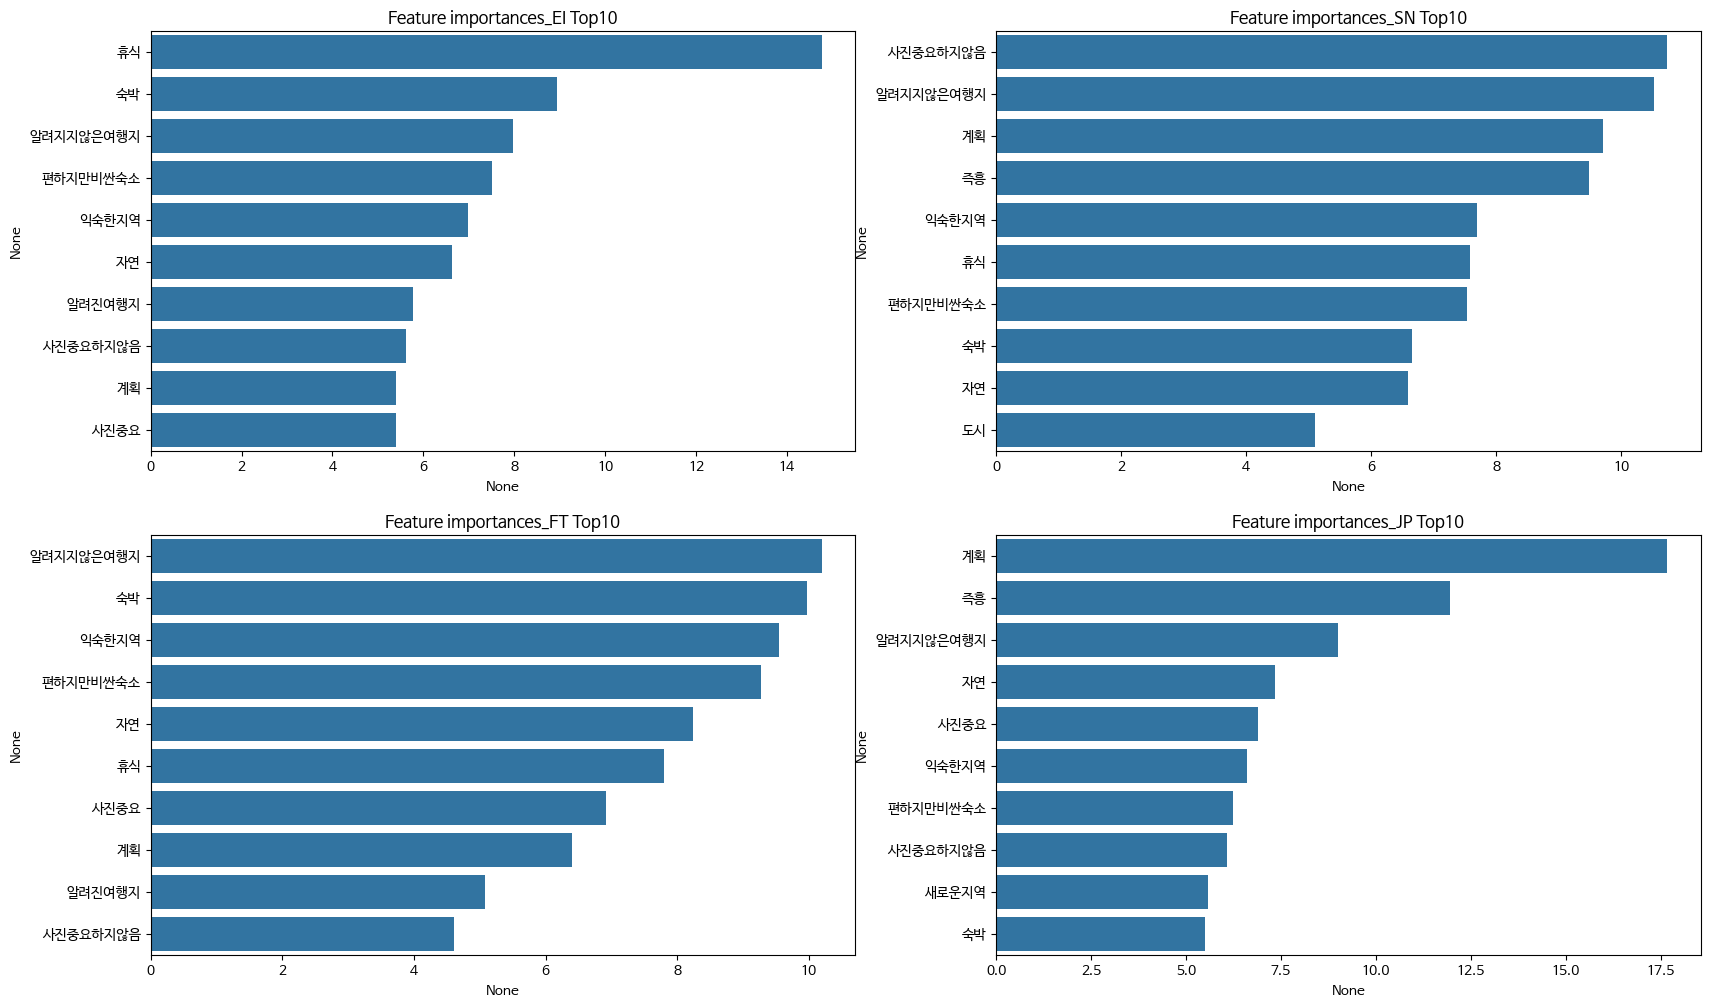

EI정확도 : 0.5862068965517241
SN정확도 : 0.4827586206896552
FT정확도 : 0.5862068965517241
JP정확도 : 0.8275862068965517


In [113]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI Top10')
sns.barplot(x=ftr_top10_EI, y=ftr_top10_EI.index)

# 두 번째 그래프: Feature importances_SN Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN Top10')
sns.barplot(x=ftr_top10_SN, y=ftr_top10_SN.index)

# 세 번째 그래프: Feature importances_FT Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT Top10')
sns.barplot(x=ftr_top10_FT, y=ftr_top10_FT.index)

# 네 번째 그래프: Feature importances_JP Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP Top10')
sns.barplot(x=ftr_top10_JP, y=ftr_top10_JP.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI}')
print(f'SN정확도 : {accuracy_SN}')
print(f'FT정확도 : {accuracy_FT}')
print(f'JP정확도 : {accuracy_JP}')

## MBIT 요소별로 예측(성별 O, 동기 X)

### 정확도 및 feature importances

In [114]:
# E/I
cb_clf_EI_gender = CatBoostClassifier(random_state=0)
cb_clf_EI_gender.fit(X_train_EI_gender, y_train_EI_gender)
pred_EI_gender = cb_clf_EI_gender.predict(X_test_EI_gender)
accuracy_EI_gender = accuracy_score(y_test_EI_gender, pred_EI_gender)

ftr_importance_values_EI_gender = cb_clf_EI_gender.feature_importances_
ftr_importances_EI_gender = pd.Series(ftr_importance_values_EI_gender, index=X_train_EI_gender.columns)
ftr_top10_EI_gender = ftr_importances_EI_gender.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6919178	total: 479us	remaining: 479ms
1:	learn: 0.6906981	total: 1.02ms	remaining: 510ms
2:	learn: 0.6894204	total: 1.51ms	remaining: 501ms
3:	learn: 0.6880211	total: 2.01ms	remaining: 501ms
4:	learn: 0.6868775	total: 3.18ms	remaining: 633ms
5:	learn: 0.6851713	total: 3.93ms	remaining: 650ms
6:	learn: 0.6841907	total: 4.26ms	remaining: 604ms
7:	learn: 0.6828752	total: 4.71ms	remaining: 585ms
8:	learn: 0.6815408	total: 5.21ms	remaining: 574ms
9:	learn: 0.6804378	total: 5.67ms	remaining: 562ms
10:	learn: 0.6788934	total: 6.21ms	remaining: 558ms
11:	learn: 0.6779815	total: 6.63ms	remaining: 546ms
12:	learn: 0.6769241	total: 7.15ms	remaining: 543ms
13:	learn: 0.6758694	total: 7.6ms	remaining: 535ms
14:	learn: 0.6749969	total: 8.08ms	remaining: 531ms
15:	learn: 0.6741199	total: 8.58ms	remaining: 528ms
16:	learn: 0.6728614	total: 9.06ms	remaining: 524ms
17:	learn: 0.6722458	total: 9.51ms	remaining: 519ms
18:	learn: 0.6718208	total: 9.89ms	remaining: 

In [115]:
# S/N
cb_clf_SN_gender = CatBoostClassifier(random_state=0)
cb_clf_SN_gender.fit(X_train_SN_gender, y_train_SN_gender)
pred_SN_gender = cb_clf_SN_gender.predict(X_test_SN_gender)
accuracy_SN_gender = accuracy_score(y_test_SN_gender, pred_SN_gender)

ftr_importance_values_SN_gender = cb_clf_SN_gender.feature_importances_
ftr_importances_SN_gender = pd.Series(ftr_importance_values_SN_gender, index=X_train_SN_gender.columns)
ftr_top10_SN_gender = ftr_importances_SN_gender.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6921913	total: 464us	remaining: 464ms
1:	learn: 0.6917549	total: 776us	remaining: 388ms
2:	learn: 0.6904359	total: 1.15ms	remaining: 381ms
3:	learn: 0.6883876	total: 1.53ms	remaining: 381ms
4:	learn: 0.6868711	total: 1.91ms	remaining: 381ms
5:	learn: 0.6847104	total: 2.33ms	remaining: 385ms
6:	learn: 0.6840933	total: 2.66ms	remaining: 377ms
7:	learn: 0.6832217	total: 3.01ms	remaining: 373ms
8:	learn: 0.6822090	total: 3.38ms	remaining: 372ms
9:	learn: 0.6802964	total: 3.78ms	remaining: 374ms
10:	learn: 0.6792658	total: 4.14ms	remaining: 373ms
11:	learn: 0.6780416	total: 4.49ms	remaining: 370ms
12:	learn: 0.6771752	total: 4.9ms	remaining: 372ms
13:	learn: 0.6759738	total: 5.29ms	remaining: 372ms
14:	learn: 0.6749619	total: 5.68ms	remaining: 373ms
15:	learn: 0.6735236	total: 6.1ms	remaining: 375ms
16:	learn: 0.6734398	total: 6.36ms	remaining: 368ms
17:	learn: 0.6724133	total: 6.76ms	remaining: 369ms
18:	learn: 0.6709735	total: 7.1ms	remaining: 367

In [116]:
# F/T
cb_clf_FT_gender = CatBoostClassifier(random_state=0)
cb_clf_FT_gender.fit(X_train_FT_gender, y_train_FT_gender)
pred_FT_gender = cb_clf_FT_gender.predict(X_test_FT_gender)
accuracy_FT_gender = accuracy_score(y_test_FT_gender, pred_FT_gender)

ftr_importance_values_FT_gender = cb_clf_FT_gender.feature_importances_
ftr_importances_FT_gender = pd.Series(ftr_importance_values_FT_gender, index=X_train_FT_gender.columns)
ftr_top10_FT_gender = ftr_importances_FT_gender.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6915960	total: 677us	remaining: 677ms
1:	learn: 0.6899223	total: 2.08ms	remaining: 1.03s
2:	learn: 0.6880010	total: 2.65ms	remaining: 883ms
3:	learn: 0.6867585	total: 3.22ms	remaining: 803ms
4:	learn: 0.6853349	total: 3.77ms	remaining: 750ms
5:	learn: 0.6836841	total: 4.31ms	remaining: 715ms
6:	learn: 0.6826230	total: 4.82ms	remaining: 683ms
7:	learn: 0.6813905	total: 5.34ms	remaining: 662ms
8:	learn: 0.6801017	total: 5.85ms	remaining: 644ms
9:	learn: 0.6796254	total: 6.27ms	remaining: 620ms
10:	learn: 0.6780199	total: 6.82ms	remaining: 613ms
11:	learn: 0.6769266	total: 7.34ms	remaining: 605ms
12:	learn: 0.6756441	total: 7.87ms	remaining: 597ms
13:	learn: 0.6738998	total: 8.4ms	remaining: 591ms
14:	learn: 0.6724517	total: 8.93ms	remaining: 587ms
15:	learn: 0.6708593	total: 9.44ms	remaining: 580ms
16:	learn: 0.6689693	total: 10ms	remaining: 578ms
17:	learn: 0.6677165	total: 10.5ms	remaining: 571ms
18:	learn: 0.6661495	total: 11ms	remaining: 568m

In [117]:
# J/P
cb_clf_JP_gender = CatBoostClassifier(random_state=0)
cb_clf_JP_gender.fit(X_train_JP_gender, y_train_JP_gender)
pred_JP_gender = cb_clf_JP_gender.predict(X_test_JP_gender)
accuracy_JP_gender = accuracy_score(y_test_JP_gender, pred_JP_gender)

ftr_importance_values_JP_gender = cb_clf_JP_gender.feature_importances_
ftr_importances_JP_gender = pd.Series(ftr_importance_values_JP_gender, index=X_train_JP_gender.columns)
ftr_top10_JP_gender = ftr_importances_JP_gender.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6909541	total: 531us	remaining: 531ms
1:	learn: 0.6891330	total: 914us	remaining: 457ms
2:	learn: 0.6866287	total: 1.29ms	remaining: 428ms
3:	learn: 0.6847266	total: 1.75ms	remaining: 435ms
4:	learn: 0.6828647	total: 2.3ms	remaining: 458ms
5:	learn: 0.6809610	total: 2.82ms	remaining: 467ms
6:	learn: 0.6796841	total: 3.25ms	remaining: 462ms
7:	learn: 0.6776553	total: 3.78ms	remaining: 469ms
8:	learn: 0.6758451	total: 4.33ms	remaining: 477ms
9:	learn: 0.6737625	total: 4.89ms	remaining: 484ms
10:	learn: 0.6721544	total: 5.4ms	remaining: 485ms
11:	learn: 0.6700761	total: 5.94ms	remaining: 489ms
12:	learn: 0.6682962	total: 6.47ms	remaining: 491ms
13:	learn: 0.6661734	total: 7ms	remaining: 493ms
14:	learn: 0.6642654	total: 7.55ms	remaining: 496ms
15:	learn: 0.6626669	total: 8.08ms	remaining: 497ms
16:	learn: 0.6607824	total: 8.61ms	remaining: 498ms
17:	learn: 0.6590633	total: 9.12ms	remaining: 498ms
18:	learn: 0.6575059	total: 9.57ms	remaining: 494ms

### 정확도 및 feature importance 출력

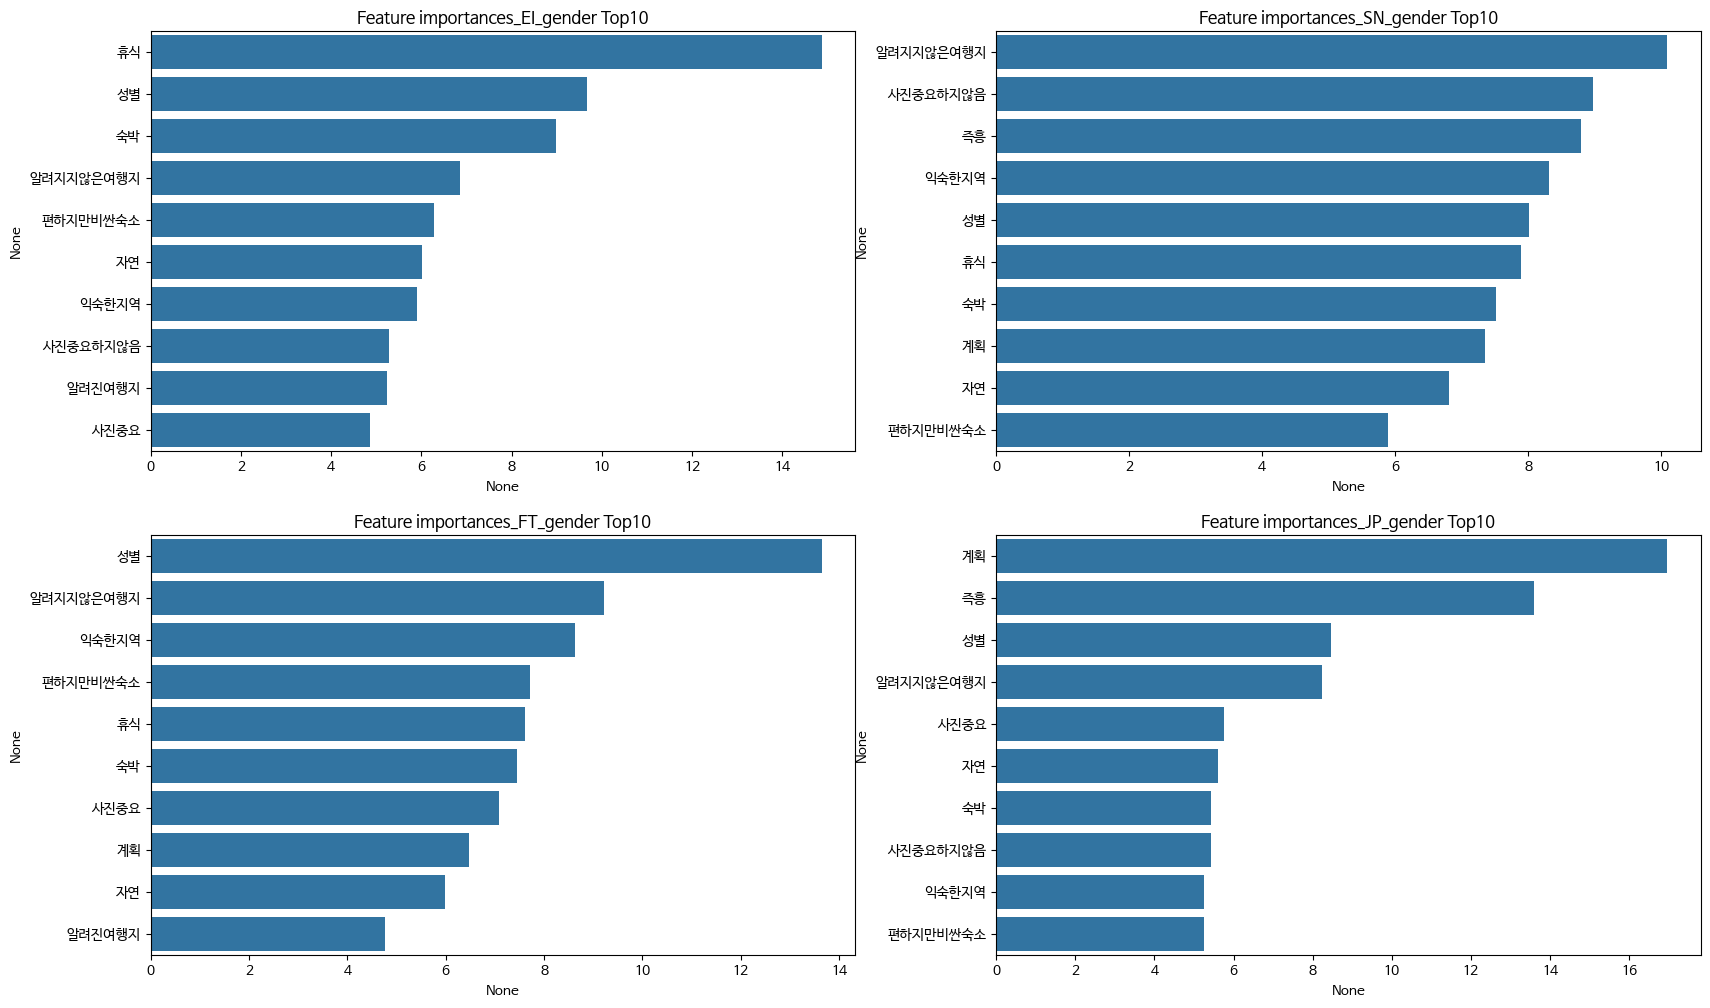

EI정확도 : 0.5172413793103449
SN정확도 : 0.6206896551724138
FT정확도 : 0.5172413793103449
JP정확도 : 0.8620689655172413


In [118]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_gender Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_gender Top10')
sns.barplot(x=ftr_top10_EI_gender, y=ftr_top10_EI_gender.index)

# 두 번째 그래프: Feature importances_SN_gender Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_gender Top10')
sns.barplot(x=ftr_top10_SN_gender, y=ftr_top10_SN_gender.index)

# 세 번째 그래프: Feature importances_FT_gender Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_gender Top10')
sns.barplot(x=ftr_top10_FT_gender, y=ftr_top10_FT_gender.index)

# 네 번째 그래프: Feature importances_JP_gender Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_gender Top10')
sns.barplot(x=ftr_top10_JP_gender, y=ftr_top10_JP_gender.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_gender}')
print(f'SN정확도 : {accuracy_SN_gender}')
print(f'FT정확도 : {accuracy_FT_gender}')
print(f'JP정확도 : {accuracy_JP_gender}')

## MBIT 요소별로 예측(성별 X, 동기 O)

### 정확도 및 feature importances

In [119]:
# E/I
cb_clf_EI_motivation = CatBoostClassifier(random_state=0)
cb_clf_EI_motivation.fit(X_train_EI_motivation, y_train_EI_motivation)
pred_EI_motivation = cb_clf_EI_motivation.predict(X_test_EI_motivation)
accuracy_EI_motivation = accuracy_score(y_test_EI_motivation, pred_EI_motivation)

ftr_importance_values_EI_motivation = cb_clf_EI_motivation.feature_importances_
ftr_importances_EI_motivation = pd.Series(ftr_importance_values_EI_motivation, index=X_train_EI_motivation.columns)
ftr_top10_EI_motivation = ftr_importances_EI_motivation.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6919806	total: 5.6ms	remaining: 5.59s
1:	learn: 0.6907845	total: 6.32ms	remaining: 3.15s
2:	learn: 0.6893691	total: 6.9ms	remaining: 2.29s
3:	learn: 0.6875157	total: 7.41ms	remaining: 1.84s
4:	learn: 0.6866976	total: 7.88ms	remaining: 1.57s
5:	learn: 0.6854130	total: 8.42ms	remaining: 1.4s
6:	learn: 0.6838599	total: 8.99ms	remaining: 1.27s
7:	learn: 0.6825957	total: 9.53ms	remaining: 1.18s
8:	learn: 0.6810815	total: 10.1ms	remaining: 1.11s
9:	learn: 0.6795569	total: 10.7ms	remaining: 1.06s
10:	learn: 0.6785722	total: 11.2ms	remaining: 1.01s
11:	learn: 0.6776259	total: 11.8ms	remaining: 972ms
12:	learn: 0.6768829	total: 12.4ms	remaining: 940ms
13:	learn: 0.6757494	total: 13ms	remaining: 913ms
14:	learn: 0.6740044	total: 13.5ms	remaining: 889ms
15:	learn: 0.6731170	total: 14.1ms	remaining: 866ms
16:	learn: 0.6720612	total: 14.7ms	remaining: 849ms
17:	learn: 0.6705473	total: 15.3ms	remaining: 832ms
18:	learn: 0.6685048	total: 15.9ms	remaining: 820

In [120]:
# S/N
cb_clf_SN_motivation = CatBoostClassifier(random_state=0)
cb_clf_SN_motivation.fit(X_train_SN_motivation, y_train_SN_motivation)
pred_SN_motivation = cb_clf_SN_motivation.predict(X_test_SN_motivation)
accuracy_SN_motivation = accuracy_score(y_test_SN_motivation, pred_SN_motivation)

ftr_importance_values_SN_motivation = cb_clf_SN_motivation.feature_importances_
ftr_importances_SN_motivation = pd.Series(ftr_importance_values_SN_motivation, index=X_train_SN_motivation.columns)
ftr_top10_SN_motivation = ftr_importances_SN_motivation.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6924040	total: 517us	remaining: 517ms
1:	learn: 0.6915255	total: 1.17ms	remaining: 582ms
2:	learn: 0.6900282	total: 1.75ms	remaining: 581ms
3:	learn: 0.6883087	total: 2.31ms	remaining: 576ms
4:	learn: 0.6872717	total: 2.88ms	remaining: 574ms
5:	learn: 0.6855937	total: 3.44ms	remaining: 569ms
6:	learn: 0.6842506	total: 3.98ms	remaining: 565ms
7:	learn: 0.6831527	total: 4.56ms	remaining: 565ms
8:	learn: 0.6820673	total: 5.14ms	remaining: 567ms
9:	learn: 0.6807439	total: 5.71ms	remaining: 565ms
10:	learn: 0.6795939	total: 6.7ms	remaining: 602ms
11:	learn: 0.6786752	total: 7.46ms	remaining: 614ms
12:	learn: 0.6772925	total: 8.09ms	remaining: 614ms
13:	learn: 0.6760203	total: 8.66ms	remaining: 610ms
14:	learn: 0.6746608	total: 9.2ms	remaining: 604ms
15:	learn: 0.6734630	total: 9.75ms	remaining: 600ms
16:	learn: 0.6718399	total: 10.3ms	remaining: 595ms
17:	learn: 0.6703029	total: 10.9ms	remaining: 594ms
18:	learn: 0.6690154	total: 11.5ms	remaining: 5

In [121]:
# F/T
cb_clf_FT_motivation = CatBoostClassifier(random_state=0)
cb_clf_FT_motivation.fit(X_train_FT_motivation, y_train_FT_motivation)
pred_FT_motivation = cb_clf_FT_motivation.predict(X_test_FT_motivation)
accuracy_FT_motivation = accuracy_score(y_test_FT_motivation, pred_FT_motivation)

ftr_importance_values_FT_motivation = cb_clf_FT_motivation.feature_importances_
ftr_importances_FT_motivation = pd.Series(ftr_importance_values_FT_motivation, index=X_train_FT_motivation.columns)
ftr_top10_FT_motivation = ftr_importances_FT_motivation.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6916710	total: 577us	remaining: 576ms
1:	learn: 0.6903379	total: 1.17ms	remaining: 583ms
2:	learn: 0.6888513	total: 1.71ms	remaining: 570ms
3:	learn: 0.6876453	total: 2.3ms	remaining: 573ms
4:	learn: 0.6864269	total: 2.69ms	remaining: 536ms
5:	learn: 0.6848033	total: 3.22ms	remaining: 533ms
6:	learn: 0.6835503	total: 3.77ms	remaining: 535ms
7:	learn: 0.6824850	total: 4.3ms	remaining: 534ms
8:	learn: 0.6810932	total: 4.93ms	remaining: 542ms
9:	learn: 0.6799178	total: 5.49ms	remaining: 543ms
10:	learn: 0.6788746	total: 6.01ms	remaining: 540ms
11:	learn: 0.6775314	total: 6.55ms	remaining: 540ms
12:	learn: 0.6764442	total: 7.16ms	remaining: 543ms
13:	learn: 0.6751069	total: 7.69ms	remaining: 542ms
14:	learn: 0.6733593	total: 8.25ms	remaining: 542ms
15:	learn: 0.6715082	total: 8.79ms	remaining: 540ms
16:	learn: 0.6696697	total: 9.31ms	remaining: 539ms
17:	learn: 0.6685452	total: 9.87ms	remaining: 539ms
18:	learn: 0.6672708	total: 10.4ms	remaining: 5

In [122]:
# J/P
cb_clf_JP_motivation = CatBoostClassifier(random_state=0)
cb_clf_JP_motivation.fit(X_train_JP_motivation, y_train_JP_motivation)
pred_JP_motivation = cb_clf_JP_motivation.predict(X_test_JP_motivation)
accuracy_JP_motivation = accuracy_score(y_test_JP_motivation, pred_JP_motivation)

ftr_importance_values_JP_motivation = cb_clf_JP_motivation.feature_importances_
ftr_importances_JP_motivation = pd.Series(ftr_importance_values_JP_motivation, index=X_train_JP_motivation.columns)
ftr_top10_JP_motivation = ftr_importances_JP_motivation.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6913430	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6890564	total: 2.1ms	remaining: 1.05s
2:	learn: 0.6869035	total: 2.45ms	remaining: 813ms
3:	learn: 0.6845995	total: 2.93ms	remaining: 730ms
4:	learn: 0.6819092	total: 3.48ms	remaining: 693ms
5:	learn: 0.6806625	total: 3.66ms	remaining: 607ms
6:	learn: 0.6787687	total: 4.23ms	remaining: 600ms
7:	learn: 0.6765216	total: 4.72ms	remaining: 585ms
8:	learn: 0.6747565	total: 5.29ms	remaining: 583ms
9:	learn: 0.6724701	total: 5.86ms	remaining: 580ms
10:	learn: 0.6701352	total: 6.34ms	remaining: 570ms
11:	learn: 0.6678658	total: 6.91ms	remaining: 569ms
12:	learn: 0.6657605	total: 7.42ms	remaining: 563ms
13:	learn: 0.6641769	total: 7.98ms	remaining: 562ms
14:	learn: 0.6622026	total: 8.52ms	remaining: 560ms
15:	learn: 0.6600808	total: 8.98ms	remaining: 553ms
16:	learn: 0.6578658	total: 9.53ms	remaining: 551ms
17:	learn: 0.6558275	total: 9.99ms	remaining: 545ms
18:	learn: 0.6539433	total: 10.5ms	remaining:

### 정확도 및 feature importance 출력

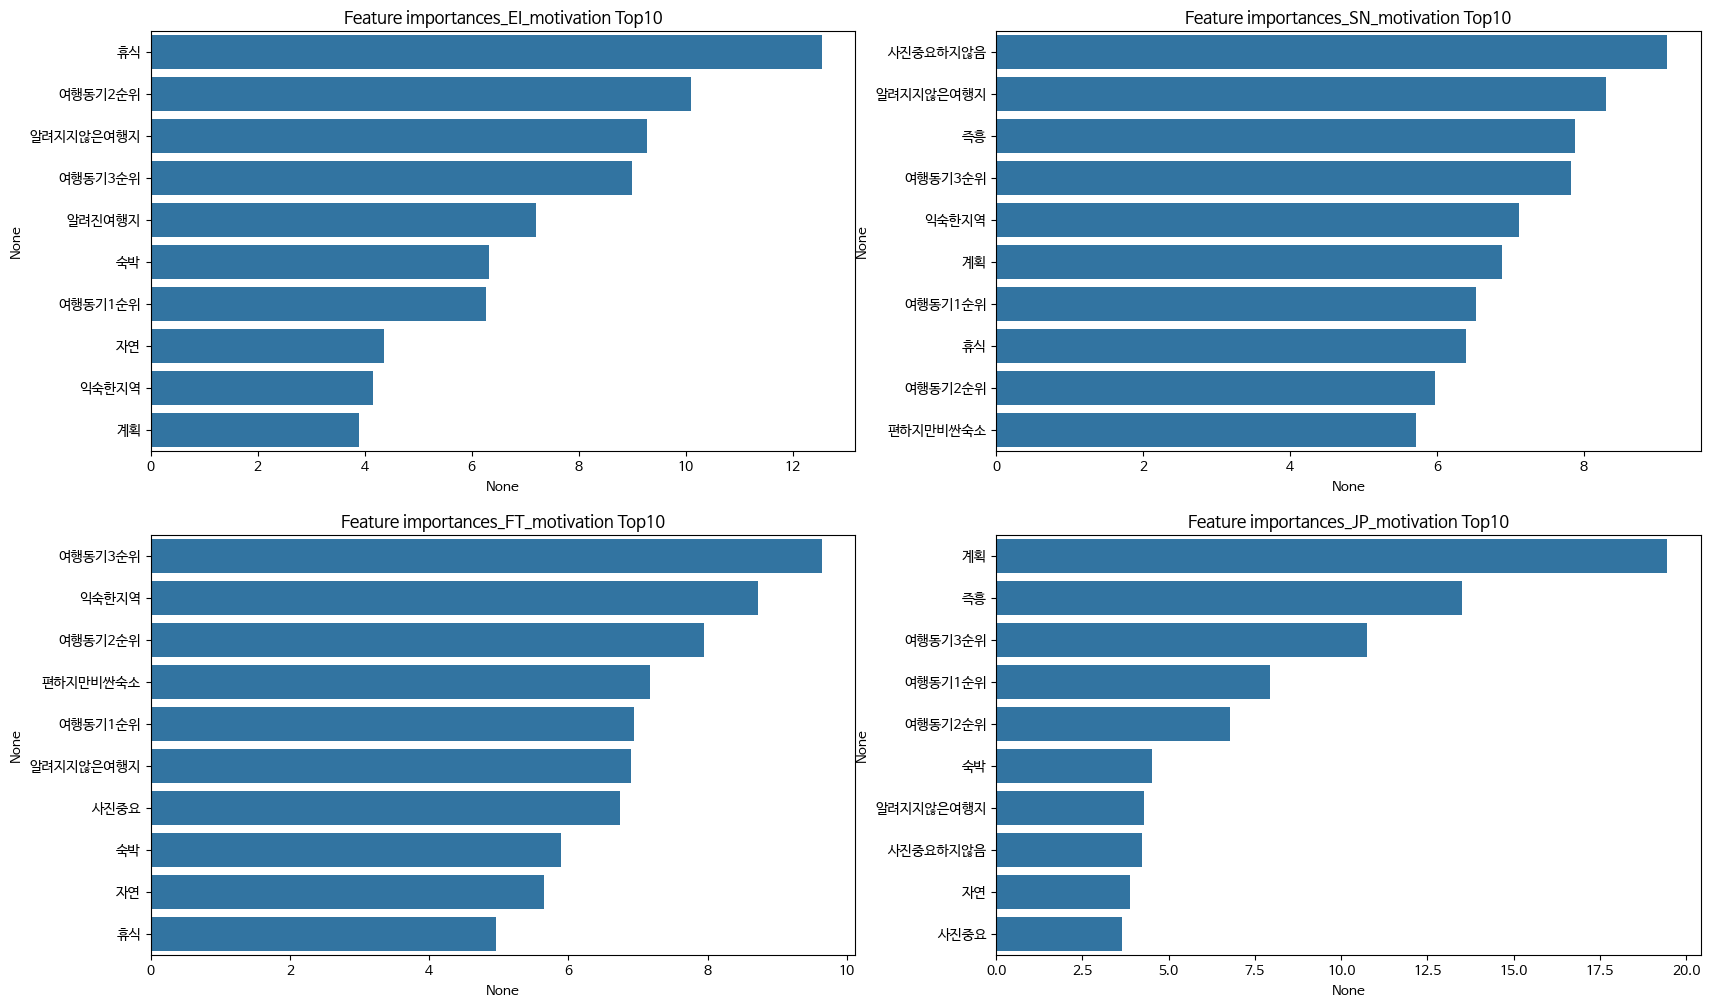

EI정확도 : 0.6896551724137931
SN정확도 : 0.5862068965517241
FT정확도 : 0.5172413793103449
JP정확도 : 0.8275862068965517


In [123]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_motivation Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_motivation Top10')
sns.barplot(x=ftr_top10_EI_motivation, y=ftr_top10_EI_motivation.index)

# 두 번째 그래프: Feature importances_SN_motivation Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_motivation Top10')
sns.barplot(x=ftr_top10_SN_motivation, y=ftr_top10_SN_motivation.index)

# 세 번째 그래프: Feature importances_FT_motivation Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_motivation Top10')
sns.barplot(x=ftr_top10_FT_motivation, y=ftr_top10_FT_motivation.index)

# 네 번째 그래프: Feature importances_JP_motivation Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_motivation Top10')
sns.barplot(x=ftr_top10_JP_motivation, y=ftr_top10_JP_motivation.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_motivation}')
print(f'SN정확도 : {accuracy_SN_motivation}')
print(f'FT정확도 : {accuracy_FT_motivation}')
print(f'JP정확도 : {accuracy_JP_motivation}')

## MBIT 요소별로 예측(성별 O, 동기 O)

### 정확도 및 feature importances

In [124]:
# E/I
cb_clf_EI_all = CatBoostClassifier(random_state=0)
cb_clf_EI_all.fit(X_train_EI_all, y_train_EI_all)
pred_EI_all = cb_clf_EI_all.predict(X_test_EI_all)
accuracy_EI_all = accuracy_score(y_test_EI_all, pred_EI_all)

ftr_importance_values_EI_all = cb_clf_EI_all.feature_importances_
ftr_importances_EI_all = pd.Series(ftr_importance_values_EI_all, index=X_train_EI_all.columns)
ftr_top10_EI_all = ftr_importances_EI_all.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6917345	total: 1.75ms	remaining: 1.75s
1:	learn: 0.6901393	total: 2.36ms	remaining: 1.18s
2:	learn: 0.6889364	total: 2.96ms	remaining: 985ms
3:	learn: 0.6877109	total: 3.52ms	remaining: 877ms
4:	learn: 0.6854967	total: 4.11ms	remaining: 817ms
5:	learn: 0.6842790	total: 4.68ms	remaining: 776ms
6:	learn: 0.6832462	total: 5.6ms	remaining: 794ms
7:	learn: 0.6817943	total: 6.43ms	remaining: 798ms
8:	learn: 0.6798588	total: 6.95ms	remaining: 765ms
9:	learn: 0.6781991	total: 7.66ms	remaining: 758ms
10:	learn: 0.6765620	total: 8.38ms	remaining: 754ms
11:	learn: 0.6752842	total: 9.06ms	remaining: 746ms
12:	learn: 0.6737226	total: 9.53ms	remaining: 724ms
13:	learn: 0.6727626	total: 10ms	remaining: 704ms
14:	learn: 0.6717913	total: 10.9ms	remaining: 715ms
15:	learn: 0.6706490	total: 11.5ms	remaining: 705ms
16:	learn: 0.6695615	total: 12.1ms	remaining: 698ms
17:	learn: 0.6683392	total: 12.6ms	remaining: 688ms
18:	learn: 0.6669168	total: 13.2ms	remaining: 6

In [125]:
# S/N
cb_clf_SN_all = CatBoostClassifier(random_state=0)
cb_clf_SN_all.fit(X_train_SN_all, y_train_SN_all)
pred_SN_all = cb_clf_SN_all.predict(X_test_SN_all)
accuracy_SN_all = accuracy_score(y_test_SN_all, pred_SN_all)

ftr_importance_values_SN_all = cb_clf_SN_all.feature_importances_
ftr_importances_SN_all = pd.Series(ftr_importance_values_SN_all, index=X_train_SN_all.columns)
ftr_top10_SN_all = ftr_importances_SN_all.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6910932	total: 572us	remaining: 572ms
1:	learn: 0.6897435	total: 981us	remaining: 490ms
2:	learn: 0.6880346	total: 1.55ms	remaining: 515ms
3:	learn: 0.6864971	total: 2.08ms	remaining: 519ms
4:	learn: 0.6849813	total: 2.65ms	remaining: 527ms
5:	learn: 0.6834169	total: 3.19ms	remaining: 528ms
6:	learn: 0.6821281	total: 3.72ms	remaining: 527ms
7:	learn: 0.6808760	total: 4.27ms	remaining: 530ms
8:	learn: 0.6797238	total: 4.82ms	remaining: 531ms
9:	learn: 0.6783013	total: 5.41ms	remaining: 535ms
10:	learn: 0.6769471	total: 5.99ms	remaining: 539ms
11:	learn: 0.6753456	total: 6.53ms	remaining: 537ms
12:	learn: 0.6735218	total: 7.07ms	remaining: 537ms
13:	learn: 0.6726390	total: 7.63ms	remaining: 537ms
14:	learn: 0.6709955	total: 8.17ms	remaining: 536ms
15:	learn: 0.6696305	total: 8.72ms	remaining: 536ms
16:	learn: 0.6679694	total: 9.36ms	remaining: 541ms
17:	learn: 0.6670027	total: 9.96ms	remaining: 544ms
18:	learn: 0.6650549	total: 10.5ms	remaining: 

In [126]:
# F/T
cb_clf_FT_all = CatBoostClassifier(random_state=0)
cb_clf_FT_all.fit(X_train_FT_all, y_train_FT_all)
pred_FT_all = cb_clf_FT_all.predict(X_test_FT_all)
accuracy_FT_all = accuracy_score(y_test_FT_all, pred_FT_all)

ftr_importance_values_FT_all = cb_clf_FT_all.feature_importances_
ftr_importances_FT_all = pd.Series(ftr_importance_values_FT_all, index=X_train_FT_all.columns)
ftr_top10_FT_all = ftr_importances_FT_all.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6913752	total: 711us	remaining: 711ms
1:	learn: 0.6898381	total: 1.16ms	remaining: 577ms
2:	learn: 0.6883633	total: 1.88ms	remaining: 624ms
3:	learn: 0.6870999	total: 2.61ms	remaining: 651ms
4:	learn: 0.6857084	total: 3.36ms	remaining: 668ms
5:	learn: 0.6839040	total: 4.18ms	remaining: 692ms
6:	learn: 0.6823971	total: 6.98ms	remaining: 990ms
7:	learn: 0.6808949	total: 7.58ms	remaining: 940ms
8:	learn: 0.6790900	total: 8.09ms	remaining: 891ms
9:	learn: 0.6775579	total: 8.66ms	remaining: 857ms
10:	learn: 0.6757650	total: 11.1ms	remaining: 994ms
11:	learn: 0.6744941	total: 11.6ms	remaining: 953ms
12:	learn: 0.6733499	total: 12.1ms	remaining: 919ms
13:	learn: 0.6723618	total: 12.6ms	remaining: 886ms
14:	learn: 0.6707074	total: 13.1ms	remaining: 861ms
15:	learn: 0.6690152	total: 13.6ms	remaining: 837ms
16:	learn: 0.6672803	total: 19.2ms	remaining: 1.11s
17:	learn: 0.6656861	total: 20.2ms	remaining: 1.1s
18:	learn: 0.6641030	total: 20.8ms	remaining: 

In [127]:
# J/P
cb_clf_JP_all = CatBoostClassifier(random_state=0)
cb_clf_JP_all.fit(X_train_JP_all, y_train_JP_all)
pred_JP_all = cb_clf_JP_all.predict(X_test_JP_all)
accuracy_JP_all = accuracy_score(y_test_JP_all, pred_JP_all)

ftr_importance_values_JP_all = cb_clf_JP_all.feature_importances_
ftr_importances_JP_all = pd.Series(ftr_importance_values_JP_all, index=X_train_JP_all.columns)
ftr_top10_JP_all = ftr_importances_JP_all.sort_values(ascending=False)[:10]

Learning rate set to 0.004045
0:	learn: 0.6907189	total: 1.35ms	remaining: 1.35s
1:	learn: 0.6884104	total: 1.81ms	remaining: 906ms
2:	learn: 0.6865278	total: 2.33ms	remaining: 776ms
3:	learn: 0.6842465	total: 2.82ms	remaining: 702ms
4:	learn: 0.6828884	total: 3.92ms	remaining: 779ms
5:	learn: 0.6810028	total: 4.48ms	remaining: 742ms
6:	learn: 0.6787085	total: 5.04ms	remaining: 715ms
7:	learn: 0.6764596	total: 5.61ms	remaining: 695ms
8:	learn: 0.6747413	total: 6.15ms	remaining: 677ms
9:	learn: 0.6725811	total: 6.72ms	remaining: 665ms
10:	learn: 0.6708930	total: 7.31ms	remaining: 657ms
11:	learn: 0.6690207	total: 7.87ms	remaining: 648ms
12:	learn: 0.6672062	total: 8.41ms	remaining: 639ms
13:	learn: 0.6646756	total: 9ms	remaining: 634ms
14:	learn: 0.6622752	total: 9.67ms	remaining: 635ms
15:	learn: 0.6600588	total: 10.2ms	remaining: 625ms
16:	learn: 0.6580229	total: 10.7ms	remaining: 617ms
17:	learn: 0.6554364	total: 11.2ms	remaining: 609ms
18:	learn: 0.6535548	total: 11.7ms	remaining: 6

### 정확도 및 feature importance 출력

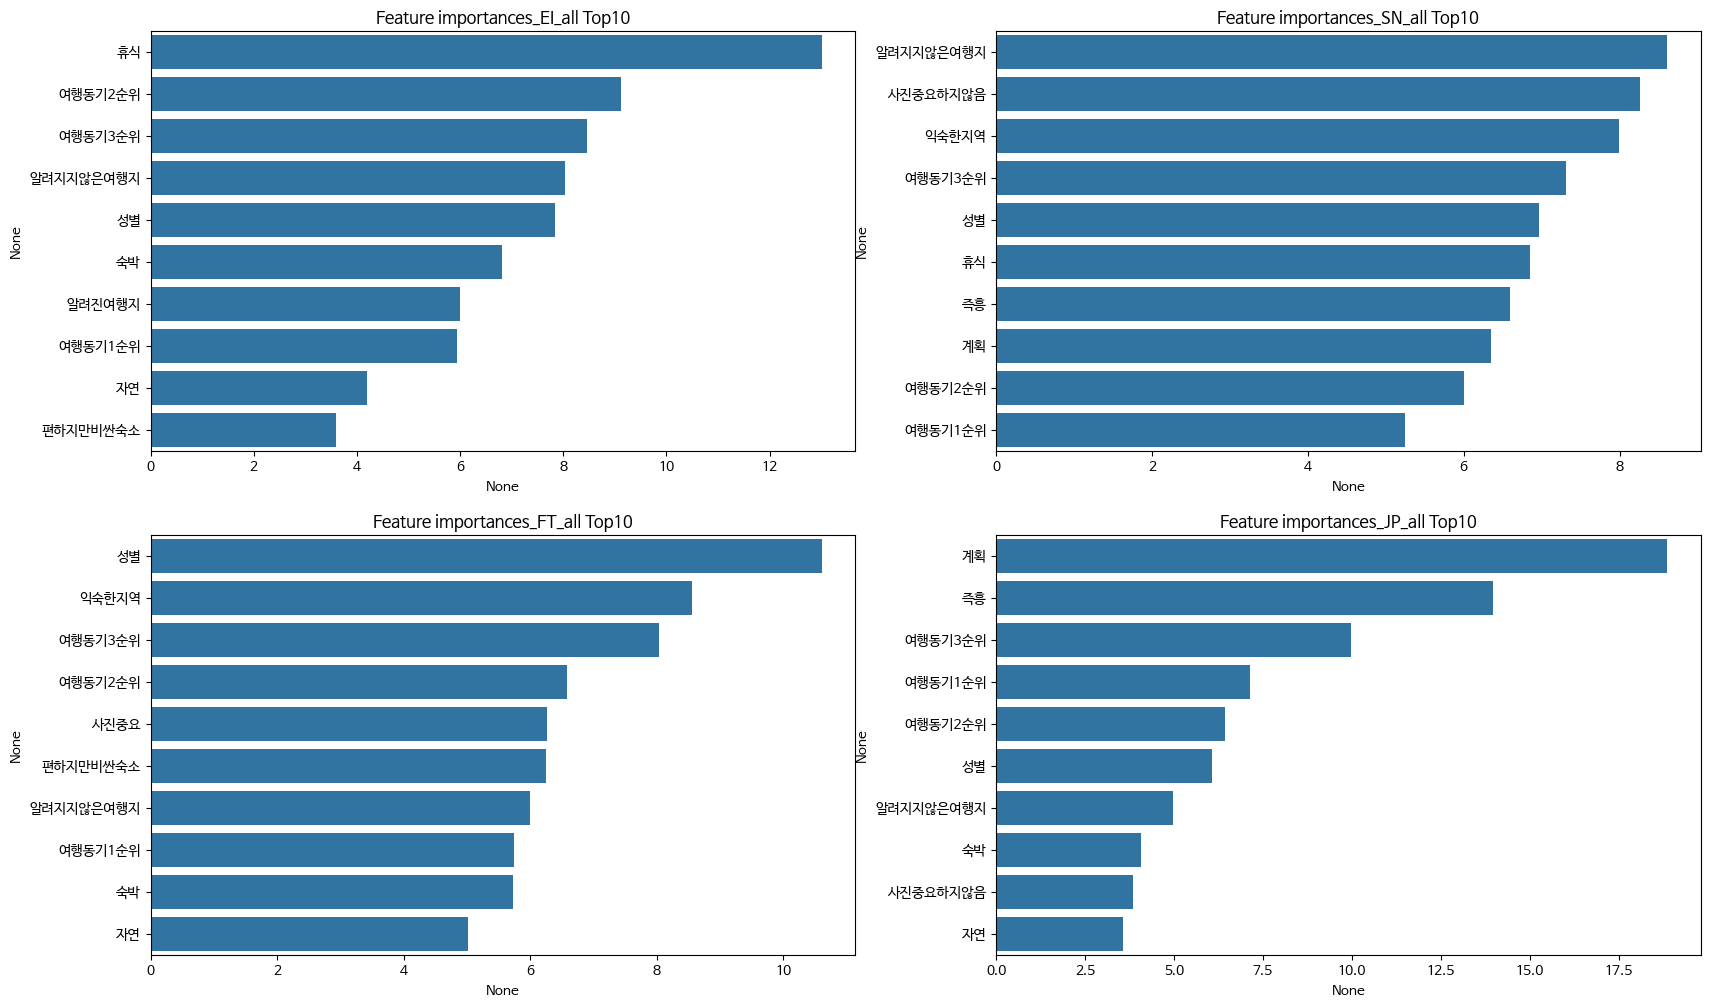

EI정확도 : 0.5862068965517241
SN정확도 : 0.5862068965517241
FT정확도 : 0.4482758620689655
JP정확도 : 0.8620689655172413


In [128]:
# 그래프 전체의 크기 설정
plt.figure(figsize=(20, 12))

# 첫 번째 그래프: Feature importances_EI_all Top10
plt.subplot(2, 2, 1)  # 2x2 그리드에서 첫 번째 위치
plt.title('Feature importances_EI_all Top10')
sns.barplot(x=ftr_top10_EI_all, y=ftr_top10_EI_all.index)

# 두 번째 그래프: Feature importances_SN_all Top10
plt.subplot(2, 2, 2)  # 2x2 그리드에서 두 번째 위치
plt.title('Feature importances_SN_all Top10')
sns.barplot(x=ftr_top10_SN_all, y=ftr_top10_SN_all.index)

# 세 번째 그래프: Feature importances_FT_all Top10
plt.subplot(2, 2, 3)  # 2x2 그리드에서 세 번째 위치
plt.title('Feature importances_FT_all Top10')
sns.barplot(x=ftr_top10_FT_all, y=ftr_top10_FT_all.index)

# 네 번째 그래프: Feature importances_JP_all Top10
plt.subplot(2, 2, 4)  # 2x2 그리드에서 네 번째 위치
plt.title('Feature importances_JP_all Top10')
sns.barplot(x=ftr_top10_JP_all, y=ftr_top10_JP_all.index)

plt.show()

# 정확도 출력
print(f'EI정확도 : {accuracy_EI_all}')
print(f'SN정확도 : {accuracy_SN_all}')
print(f'FT정확도 : {accuracy_FT_all}')
print(f'JP정확도 : {accuracy_JP_all}')

## final append

In [129]:
final.loc['CB_성별X동기X'] = [accuracy_EI, accuracy_SN, accuracy_FT, accuracy_JP]
final.loc['CB_성별O동기X'] = [accuracy_EI_gender, accuracy_SN_gender, accuracy_FT_gender, accuracy_JP_gender]
final.loc['CB_성별X동기O'] = [accuracy_EI_motivation, accuracy_SN_motivation, accuracy_FT_motivation, accuracy_JP_motivation]
final.loc['CB_성별O동기O'] = [accuracy_EI_all, accuracy_SN_all, accuracy_FT_all, accuracy_JP_all]

# 최종 정확도 확인

In [130]:
final

,EI,SN,FT,JP
DT_성별X동기X,0.586207,0.517241,0.413793,0.655172
DT_성별O동기X,0.517241,0.448276,0.517241,0.551724
DT_성별X동기O,0.482759,0.517241,0.344828,0.689655
DT_성별O동기O,0.620690,0.586207,0.551724,0.689655
RLF_성별X동기X,0.655172,0.517241,0.620690,0.793103
RLF_성별O동기X,0.551724,0.586207,0.448276,0.793103
RLF_성별X동기O,0.724138,0.517241,0.517241,0.793103
RLF_성별O동기O,0.689655,0.620690,0.586207,0.793103
GBM_성별X동기X,0.689655,0.517241,0.586207,0.724138
GBM_성별O동기X,0.620690,0.517241,0.482759,0.724138
